# HOTEL BOOKINGS PROJECT - REPORT

<a id = 'top'><a/>
## TABLE OF CONTENTS

# [0. Import needed packages for the data analysis](#packages)


# [1. Collecting data](#collecting_data)

   ## [1.1 Import dataset](#import_dataset)
   
   
# [2. Data wrangling](#data_wrangling)
   
   ## [2.1 Finding duplicates](#finding_duplicates)
   
   ## [2.2 Finding missing values](#finding_missingvalues)
   
   
# [3. Exploratory analysis](#exploratory_analysis)
    
   ## [3.1 Customer analysis](#customer_analysis)
   
   ### [3.1.1 Where do the guests come from?](#guests_origin)
   
   ### [3.1.2 Special requests](#special_request)
    
   #### [3.1.2.1 Special requests by hotel and room types](#special_request_room)
   #### [3.1.2.2 Special requests by nights of stay](#special_request_night)
   #### [3.1.2.3 Special requests and cancellations](#special_request_cancellation)
   
   ### [3.1.3 What do customers prefer?](#customer_preference)
        
   #### [3.1.3.1 Number of nights per room type and per hotel type](#nights_room_hotel)
   #### [3.1.3.2 Lenght of stays per hotel type](#length_stay_hotel)
   
   #### [3.1.3.3 Distribution of nights by market segment and hotel type](#nights_market_hotel)
   #### [3.1.3.4 Bookings by market segment](#bookings_market)
   
   #### [3.1.3.5 Meal preferences](#meal)
   
    
   ## [3.2 Price analysis](#yearly_price)
   
   ### [3.2.1 Mean monthly price for each year](#monthly_price_year)
   ### [3.2.2 Variation of price per room type](#priceperroom)
   ### [3.2.3 Mean monthly price for each year with group by function](#priceperroom2)
   ### [3.2.4 Price per night and per person based on booking and room](#price_night)   
       
   ## [3.3 Bookings analysis](#busiest_month)
    
   ### [3.3.1 Number of guests per month](#guests_month)
   ### [3.3.2 Bookings per month by hotel types and total](#bookings_month_hotel)
        
   ## [3.4 Number of cancellations](#nr_cancellation)
    
   ### [3.4.1 Number of cancellations compared to reservations per hotel type](#nr_cancellation_reservation_hotel)
   ### [3.4.2 Number of cancellations compared to reservations per hotel type and per room type](#nr_cancellation_reservation_hotel_room)
    
   ### [3.4.3 Number of cancellations per month](#nr_cancellation_month)
    

<a id = 'packages'><a/>
# 0. Import needed packages for the data analysis
[Top](#top)

The libraries which were used during the analysis are imported and listed below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('ggplot')

In [2]:
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px

In [3]:
# correct render to show plotly graphs in Jupyter Notebook
import plotly.io as pio
pio.renderers.default = 'iframe' # or 'colab' or 'iframe' or 'iframe_connected' or 'sphinx_gallery'

<a id = 'collecting_data'><a/>
# 1. Collecting data
[Top](#top)

<a id = 'import_dataset'><a/>
## 1.1 Import dataset
[Top](#top)

The .read_csv() function is used to import and retrieve the hotel_bookings.csv file saved in the same folder. This will be the raw dataset that will be first explored, cleaned and wrangled to be finally analysed.

In [4]:
df_hotel_booking_raw = pd.read_csv('hotel_bookings.csv')

In [5]:
for col in df_hotel_booking_raw.columns:
    print(col)

hotel
is_canceled
lead_time
arrival_date_year
arrival_date_month
arrival_date_week_number
arrival_date_day_of_month
stays_in_weekend_nights
stays_in_week_nights
adults
children
babies
meal
country
market_segment
distribution_channel
is_repeated_guest
previous_cancellations
previous_bookings_not_canceled
reserved_room_type
assigned_room_type
booking_changes
deposit_type
agent
company
days_in_waiting_list
customer_type
adr
required_car_parking_spaces
total_of_special_requests
reservation_status
reservation_status_date


In [6]:
len(df_hotel_booking_raw)
# len(df_hotel_booking_raw['hotel']) # same as above

119390

<a id= 'data_wrangling'><a/>
# 2. Data wrangling
[Top](#top)

<a id= 'finding_duplicates'><a/>
## 2.1 Finding duplicates
[Top](#top)

In [7]:
df_hotel_booking_raw.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

In [8]:
df_duplicates = df_hotel_booking_raw[df_hotel_booking_raw.duplicated()] # df with selected duplicated rows
len(df_duplicates.axes[0])

31994

In this case, there could be duplicated rows but still be important and necessary data because for example two or more adutls booked for the same period, the same room type and the same meals. 

In this case therefore, the removing duplicates will be skipped.

<a id= 'finding_missingvalues'><a/>
## 2.2 Finding missing values
[Top](#top)

Check if the dataframe there are any null values as:

In [9]:
df_hotel_booking_raw.isnull().values.any()

True

Since, the result is boolean "True", a deeper check should be performed, to uderstand where the null values are.

In [10]:
df_hotel_booking_raw.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

The null values are in the columns: country, agent, company.
The null values for "agent" might mean that the booking was performed privately, as well as for "company" null values.

In this case, since "agent" and "company" are defined by codes, it is better to just impute the null values with "0"s.

In [11]:
df_hotel_booking_raw.fillna(0, inplace = True)

In [12]:
df_hotel_booking_raw.isnull().values.any()

False

Check if in "adults", "children" and "babies" there are values == "0", meaning that these bookings were not correct.

In [13]:
df_hotel_booking_raw['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10],
      dtype=int64)

In [14]:
df_hotel_booking_raw['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [15]:
df_hotel_booking_raw['babies'].unique()

array([ 0,  1,  2, 10,  9], dtype=int64)

In [16]:
filter_customer_zero = (df_hotel_booking_raw['adults']==0) & (df_hotel_booking_raw['children']==0) & (df_hotel_booking_raw['babies']==0)

In [17]:
df_hotel_booking = df_hotel_booking_raw[~filter_customer_zero]
df_hotel_booking

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    0.0     0.0   
1                          0       2  ...    No Deposit    0.0     0.0   
2                          1       1  ...    No Deposit    0.0     0.0   
3                          1       1  ...    No Deposit  304.0     0.0   
4                          2       2  ...    No Deposit  240.0     0.0   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     0.0   
119386                     5       3  ...    No Deposit    9.0     0.0   
119387                     5       2  ...    No Deposit    9.0     0.0   
119388                     5       2  ...    No Deposit   89.0     0.0   
119389                     7       2  ...    No Deposit    9.0     0.0   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

The new dataframe is the ready dataframe to be used to the analysis.
Check the general summary of the numeric (first df) and inclduing categorical (second df) values.

The cleaned dataframe df_hotel_booking can be saved as csv, to be used for the creation of a dashboard.

A quick exploratory analysis is done on the cleaned dataframe.

In [18]:
df_hotel_booking.to_csv("hotel_bookings_cleaned.csv", index=False)

In [19]:
df_hotel_booking.describe()

is_canceled      lead_time  arrival_date_year  \
count  119210.000000  119210.000000      119210.000000   
mean        0.370766     104.109227        2016.156472   
std         0.483012     106.875450           0.707485   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     161.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119210.000000              119210.000000   
mean                  27.163376                  15.798717   
std                   13.601107                   8.781070   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119210.000000         119210.000000  119210.000000   
mean                  0.927053              2.499195       1.859206   
std                   0.995117              1.897106       0.575186   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119210.000000  119210.000000      119210.000000   
mean        0.104043       0.007961           0.031499   
std         0.398836       0.097509           0.174663   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119210.000000                   119210.000000   
mean                 0.087191                        0.137094   
std                  0.844918                        1.498137   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent        company  days_in_waiting_list  \
count    119210.000000  119210.000000  119210.000000         119210.000000   
mean          0.218799      74.889078      10.735400              2.321215   
std           0.638504     107.168884      53.830143             17.598002   
min           0.000000       0.000000       0.000000              0.000000   
25%           0.000000       7.000000       0.000000              0.000000   
50%           0.000000       9.000000       0.000000              0.000000   
75%           0.000000     152.000000       0.000000              0.000000   
max          18.000000     535.000000     543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119210.000000                119210.000000              119210.000000  
mean      101.969092                     0.062553                   0.571504  
std        50.434007                     0.245360                   0.792876  
min        -6.380000                     0.000000                   0.000000  
25%        69.500000                     0.000000                   0.000000  
5

In [20]:
df_hotel_booking.describe(include='all')

hotel    is_canceled      lead_time  arrival_date_year  \
count       119210  119210.000000  119210.000000      119210.000000   
unique           2            NaN            NaN                NaN   
top     City Hotel            NaN            NaN                NaN   
freq         79163            NaN            NaN                NaN   
mean           NaN       0.370766     104.109227        2016.156472   
std            NaN       0.483012     106.875450           0.707485   
min            NaN       0.000000       0.000000        2015.000000   
25%            NaN       0.000000      18.000000        2016.000000   
50%            NaN       0.000000      69.000000        2016.000000   
75%            NaN       1.000000     161.000000        2017.000000   
max            NaN       1.000000     737.000000        2017.000000   

       arrival_date_month  arrival_date_week_number  \
count              119210             119210.000000   
unique                 12                       NaN   
top                August                       NaN   
freq                13861                       NaN   
mean                  NaN                 27.163376   
std                   NaN                 13.601107   
min                   NaN                  1.000000   
25%                   NaN                 16.000000   
50%                   NaN                 28.000000   
75%                   NaN                 38.000000   
max                   NaN                 53.000000   

        arrival_date_day_of_month  stays_in_weekend_nights  \
count               119210.000000            119210.000000   
unique                        NaN                      NaN   
top                           NaN                      NaN   
freq                          NaN                      NaN   
mean                    15.798717                 0.927053   
std                      8.781070                 0.995117   
min                      1.000000                 0.000000   
25%                      8.000000                 0.000000   
50%                     16.000000                 1.000000   
75%                     23.000000                 2.000000   
max                     31.000000                19.000000   

        stays_in_week_nights         adults  ...  deposit_type          agent  \
count          119210.000000  119210.000000  ...        119210  119210.000000   
unique                   NaN            NaN  ...             3            NaN   
top                      NaN            NaN  ...    No Deposit            NaN   
freq                     NaN            NaN  ...        104461            NaN   
mean                2.499195       1.859206  ...           NaN      74.889078   
std                 1.897106       0.575186  ...           NaN     107.168884   
min                 0.000000       0.000000  ...           NaN       0.000000   
25%                 1.000000       2.000000  ...           NaN       7.000000   
50%                 2.000000       2.000000  ...           NaN       9.000000   
75%                 3.000000       2.000000  ...           NaN     152.000000   
max                50.000000      55.000000  ...           NaN     535.000000   

              company days_in_waiting_list customer_type            adr  \
count   119210.000000        119210.000000        119210  119210.000000   
unique            NaN                  NaN             4            NaN   
top               NaN                  NaN     Transient            NaN   
freq              NaN                  NaN         89476            NaN   
mean        10.735400             2.321215           NaN     101.969092   
std         53.830143            17.598002           NaN      50.434007   
min          0.000000             0.000000           NaN      -6.380000   
25%          0.000000             0.000000           NaN      69.500000   
50%          0.000000             0.000000           NaN      94.950000   
75%          0.000000          

In [21]:
df_hotel_booking['hotel'].value_counts().to_frame()

hotel
City Hotel    79163
Resort Hotel  40047

In [22]:
df_hotel_booking['country'].value_counts().to_frame()

country
PRT    48483
GBR    12120
FRA    10401
ESP     8560
DEU     7285
..       ...
DJI        1
BWA        1
HND        1
VGB        1
NAM        1

[178 rows x 1 columns]

In [23]:
df_hotel_booking['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 0, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH

In [24]:
df_hotel_booking['reservation_status'].value_counts().to_frame()

reservation_status
Check-Out               75011
Canceled                42993
No-Show                  1206

In [25]:
df_hotel_booking['arrival_date_month'].value_counts().to_frame()

arrival_date_month
August                  13861
July                    12644
May                     11780
October                 11147
April                   11078
June                    10929
September               10500
March                    9768
February                 8052
November                 6771
December                 6759
January                  5921

In [26]:
df_hotel_booking['agent'].value_counts().to_frame()

agent
9.0    31922
0.0    16280
240.0  13922
1.0     7187
14.0    3633
...      ...
285.0      1
289.0      1
406.0      1
265.0      1
497.0      1

[334 rows x 1 columns]

In [27]:
df_hotel_booking['company'].value_counts().to_frame()

company
0.0     112442
40.0       924
223.0      784
67.0       267
45.0       249
...        ...
142.0        1
32.0         1
11.0         1
487.0        1
376.0        1

[349 rows x 1 columns]

<a id= 'exploratory_analysis'><a/>
# 3. Exploratory analysis
[Top](#top)

After an exploratoy analysis of the dataset, the descriptive analysis will answer the follwoing questions.

1. **Customer analyis**

From where do guests come from?

Which are guests special requests? Per room and hotel types?

Is there a relationship between special requests and cancellation?

How long would guests stay per hotel type? How many guest booked based on the market segment?

Which are guests preferences? How many nights do guests stay per room and hotel type?

How many nights do guests stay per market segment and hotel type? Whihc are the guests' meal preferences?



2. **Price analysis**

How does price vary across the year?

Which are the fluctuations of pricesacross the year?

How does price vary per room type and hotel type?


3. **Bookings analysis**

Which is the busiest month in the hotel?

How many guests booked per month? How many bookings per month and per hotel types?

Which are the prices per perons based on room type and bookings?


4. **Cancellations analysis**

How many cancellations were made?

How many cancellations compared to total reservations were made based on hotel type?

How many cancellations compared to total reservations were made based on hotel and room type?

How many cancellations were made per month?

<a id= 'customer_analysis'><a/>
# 3.1 Customer analysis
[Top](#top)

<a id= 'guests_origin'><a/>
## 3.1.1 Where do the guests come from?
[Top](#top)

In this section, the goal is to analyse the number of guests per origin country, considering both the cancelled bookings and only the checked bookings, using a bar chart and a geographic map.

In [28]:
# df_hotel_booking['country'].value_counts().to_frame()
country_nr_all = df_hotel_booking['country'].value_counts().reset_index() # df with nr of guests per country including also cancelled
country_nr_all

index  country
0     PRT    48483
1     GBR    12120
2     FRA    10401
3     ESP     8560
4     DEU     7285
..    ...      ...
173   DJI        1
174   BWA        1
175   HND        1
176   VGB        1
177   NAM        1

[178 rows x 2 columns]

In [29]:
country_nr_nocancel = df_hotel_booking[df_hotel_booking['is_canceled']==0]['country'].value_counts().to_frame()
country_nr_nocancel.columns = ['Nr of guests']
country_nr_nocancel

Nr of guests
PRT         20977
GBR          9668
FRA          8468
ESP          6383
DEU          6067
..            ...
BHR             1
DJI             1
MLI             1
NPL             1
FRO             1

[166 rows x 1 columns]

In [30]:
country_nr_nocancel.plot(kind="bar",
                        figsize = (20,6),
                        color="saddlebrown")
plt.title("Number of guests per origin country (cancellations excluded)")
plt.xlabel("Countries")
plt.close()

In [31]:
df_hotel_booking_nc_index = df_hotel_booking[df_hotel_booking['is_canceled']==0]['country'].value_counts().reset_index()
df_hotel_booking_nc_index.columns = ['Country','Guests']
df_hotel_booking_nc_index

Country  Guests
0       PRT   20977
1       GBR    9668
2       FRA    8468
3       ESP    6383
4       DEU    6067
..      ...     ...
161     BHR       1
162     DJI       1
163     MLI       1
164     NPL       1
165     FRO       1

[166 rows x 2 columns]

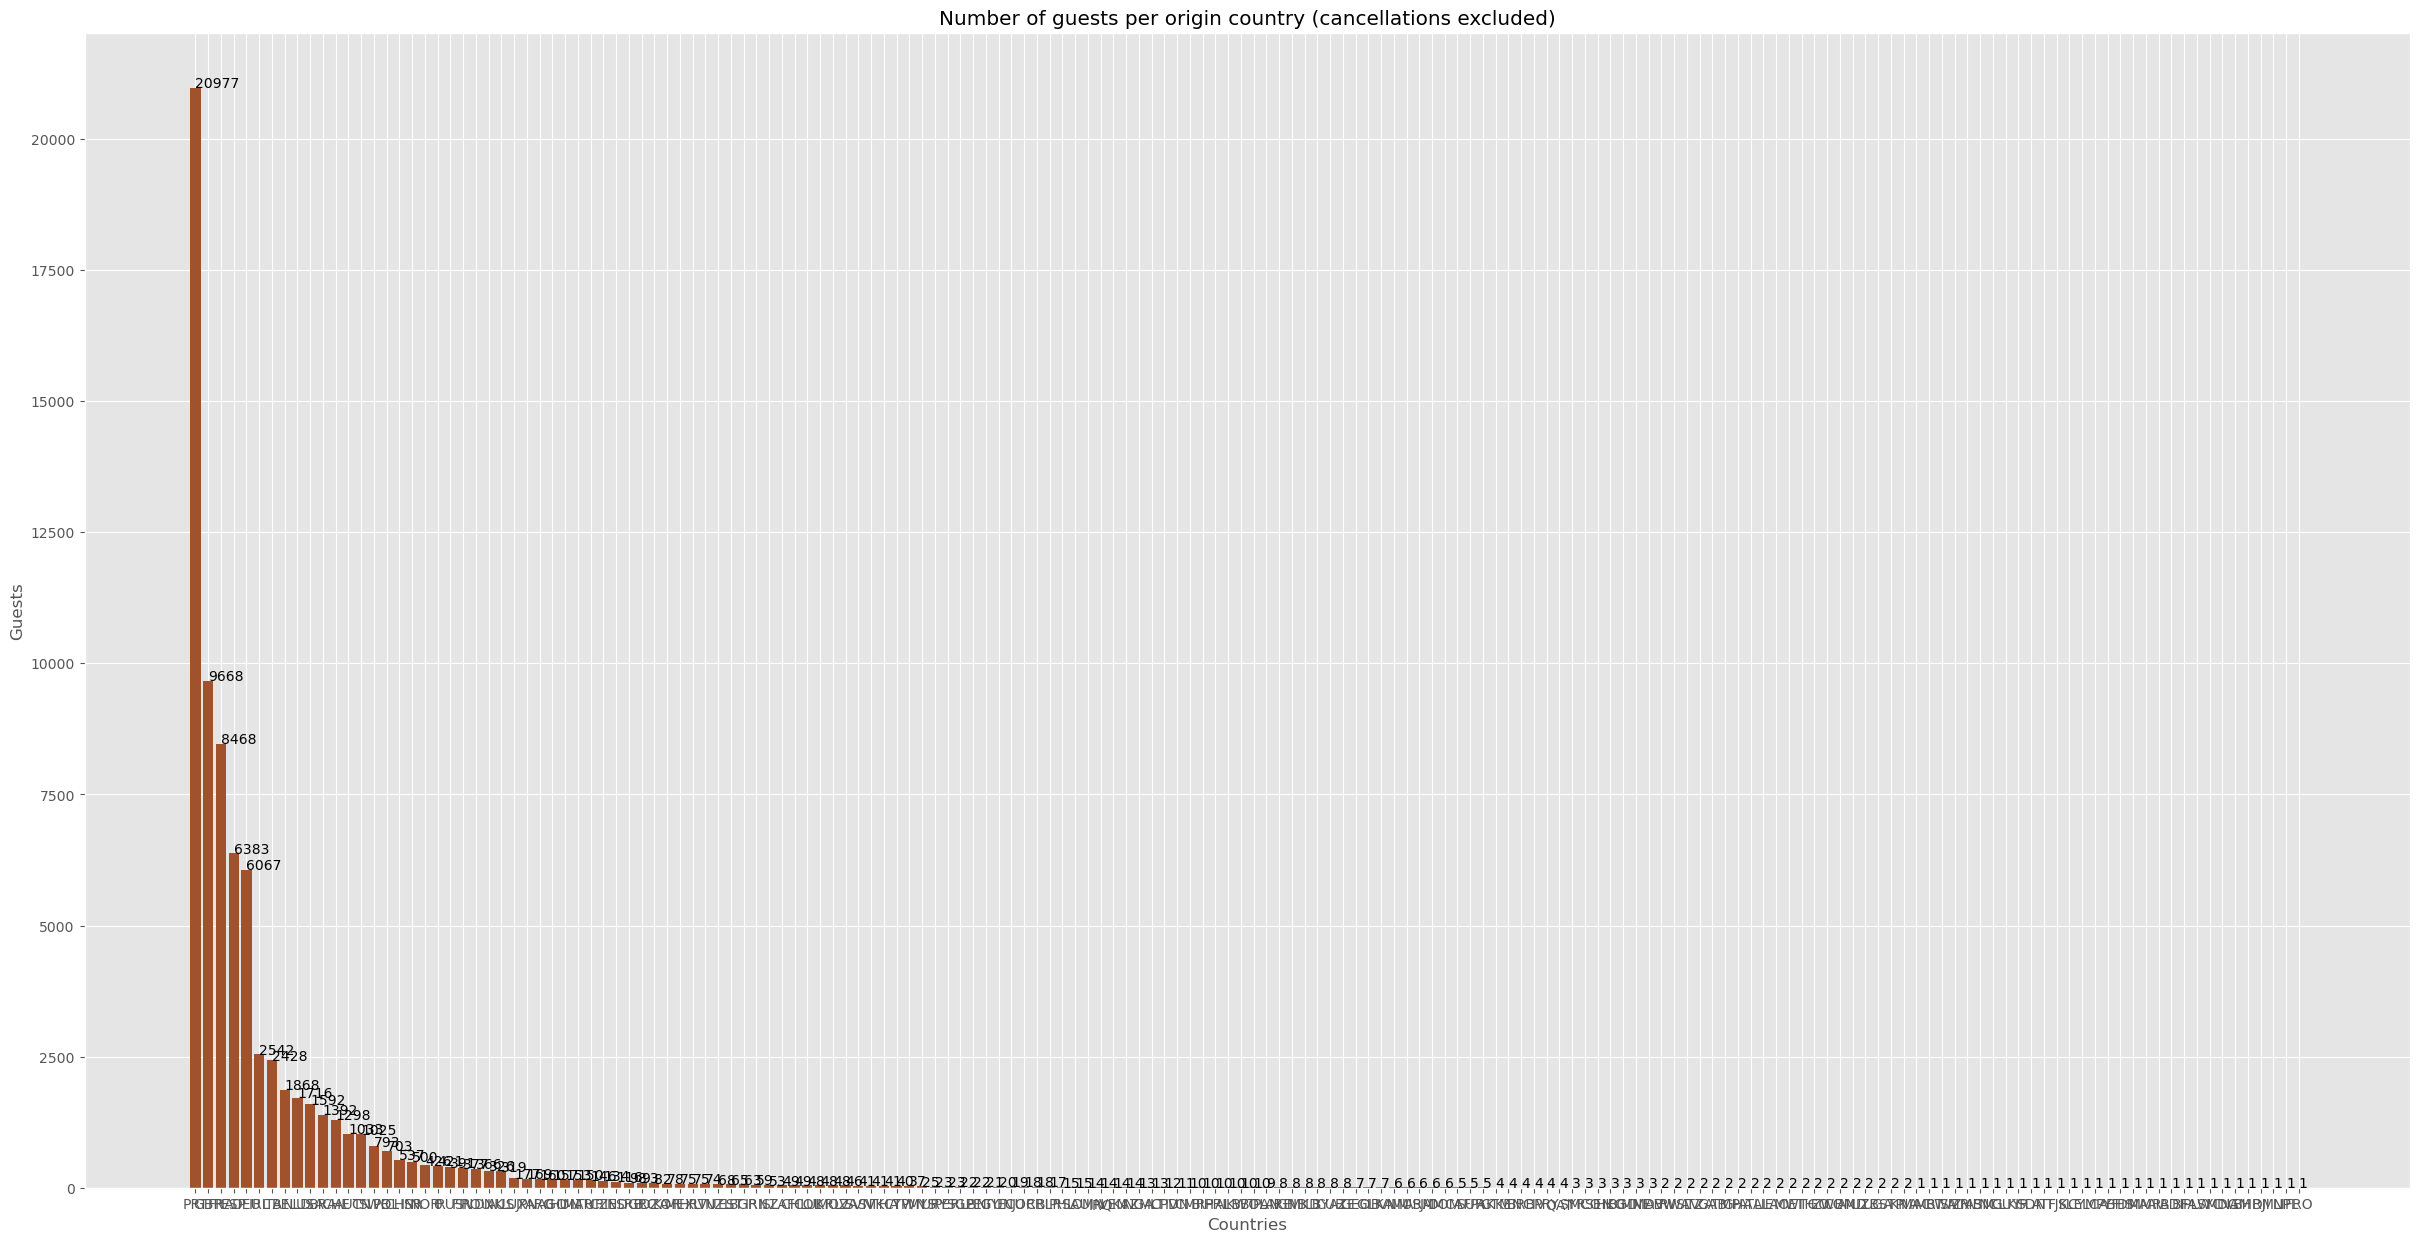

In [32]:
import matplotlib.pyplot as plt

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
#if __name__ == '__main__':
# creating data on which bar chart will be plot
country = list(df_hotel_booking_nc_index['Country'].astype(str))
guest = list(df_hotel_booking_nc_index['Guests'].astype(int))

# making the bar chart on the data
plt.bar(country, guest, color="sienna")

plt.title("Number of guests per origin country (cancellations excluded)")
plt.xlabel("Countries")
plt.ylabel("Guests")

# calling the function to add value labels
addlabels(x=country, y=guest)

plt.gcf().set_size_inches(30, 15)

# visualizing the plot
plt.show()
plt.close()

Top 50 origin country.

In [33]:
country_nr_nocancel_top50 = country_nr_nocancel.head(50)
country_nr_nocancel_top50

Nr of guests
PRT         20977
GBR          9668
FRA          8468
ESP          6383
DEU          6067
IRL          2542
ITA          2428
BEL          1868
NLD          1716
USA          1592
BRA          1392
CHE          1298
AUT          1033
CN           1025
SWE           793
POL           703
CHN           537
ISR           500
NOR           426
0             421
RUS           391
FIN           377
ROU           366
DNK           326
AUS           319
LUX           177
JPN           169
ARG           160
AGO           157
HUN           153
MAR           150
TUR           146
CZE           134
IND           116
SRB            98
GRC            93
DZA            82
KOR            78
MEX            75
HRV            75
LTU            74
NZL            68
EST            65
BGR            63
IRN            59
ISL            53
ZAF            49
CHL            49
COL            48
UKR            48

In [34]:
country_nr_nocancel_top50.plot(kind="bar",
                              figsize=(20,6),
                              color="sienna")
plt.title("Top 50 number of guests per origin country (cancellations excluded)")
plt.xlabel("Countries")
plt.ylabel("Guests")
plt.close()

In [35]:
country_nr_nocancel_top50 = df_hotel_booking_nc_index.head(50)
country_nr_nocancel_top50

Country  Guests
0      PRT   20977
1      GBR    9668
2      FRA    8468
3      ESP    6383
4      DEU    6067
5      IRL    2542
6      ITA    2428
7      BEL    1868
8      NLD    1716
9      USA    1592
10     BRA    1392
11     CHE    1298
12     AUT    1033
13      CN    1025
14     SWE     793
15     POL     703
16     CHN     537
17     ISR     500
18     NOR     426
19       0     421
20     RUS     391
21     FIN     377
22     ROU     366
23     DNK     326
24     AUS     319
25     LUX     177
26     JPN     169
27     ARG     160
28     AGO     157
29     HUN     153
30     MAR     150
31     TUR     146
32     CZE     134
33     IND     116
34     SRB      98
35     GRC      93
36     DZA      82
37     KOR      78
38     MEX      75
39     HRV      75
40     LTU      74
41     NZL      68
42     EST      65
43     BGR      63
44     IRN      59
45     ISL      53
46     ZAF      49
47     CHL      49
48     COL      48
49     UKR      48

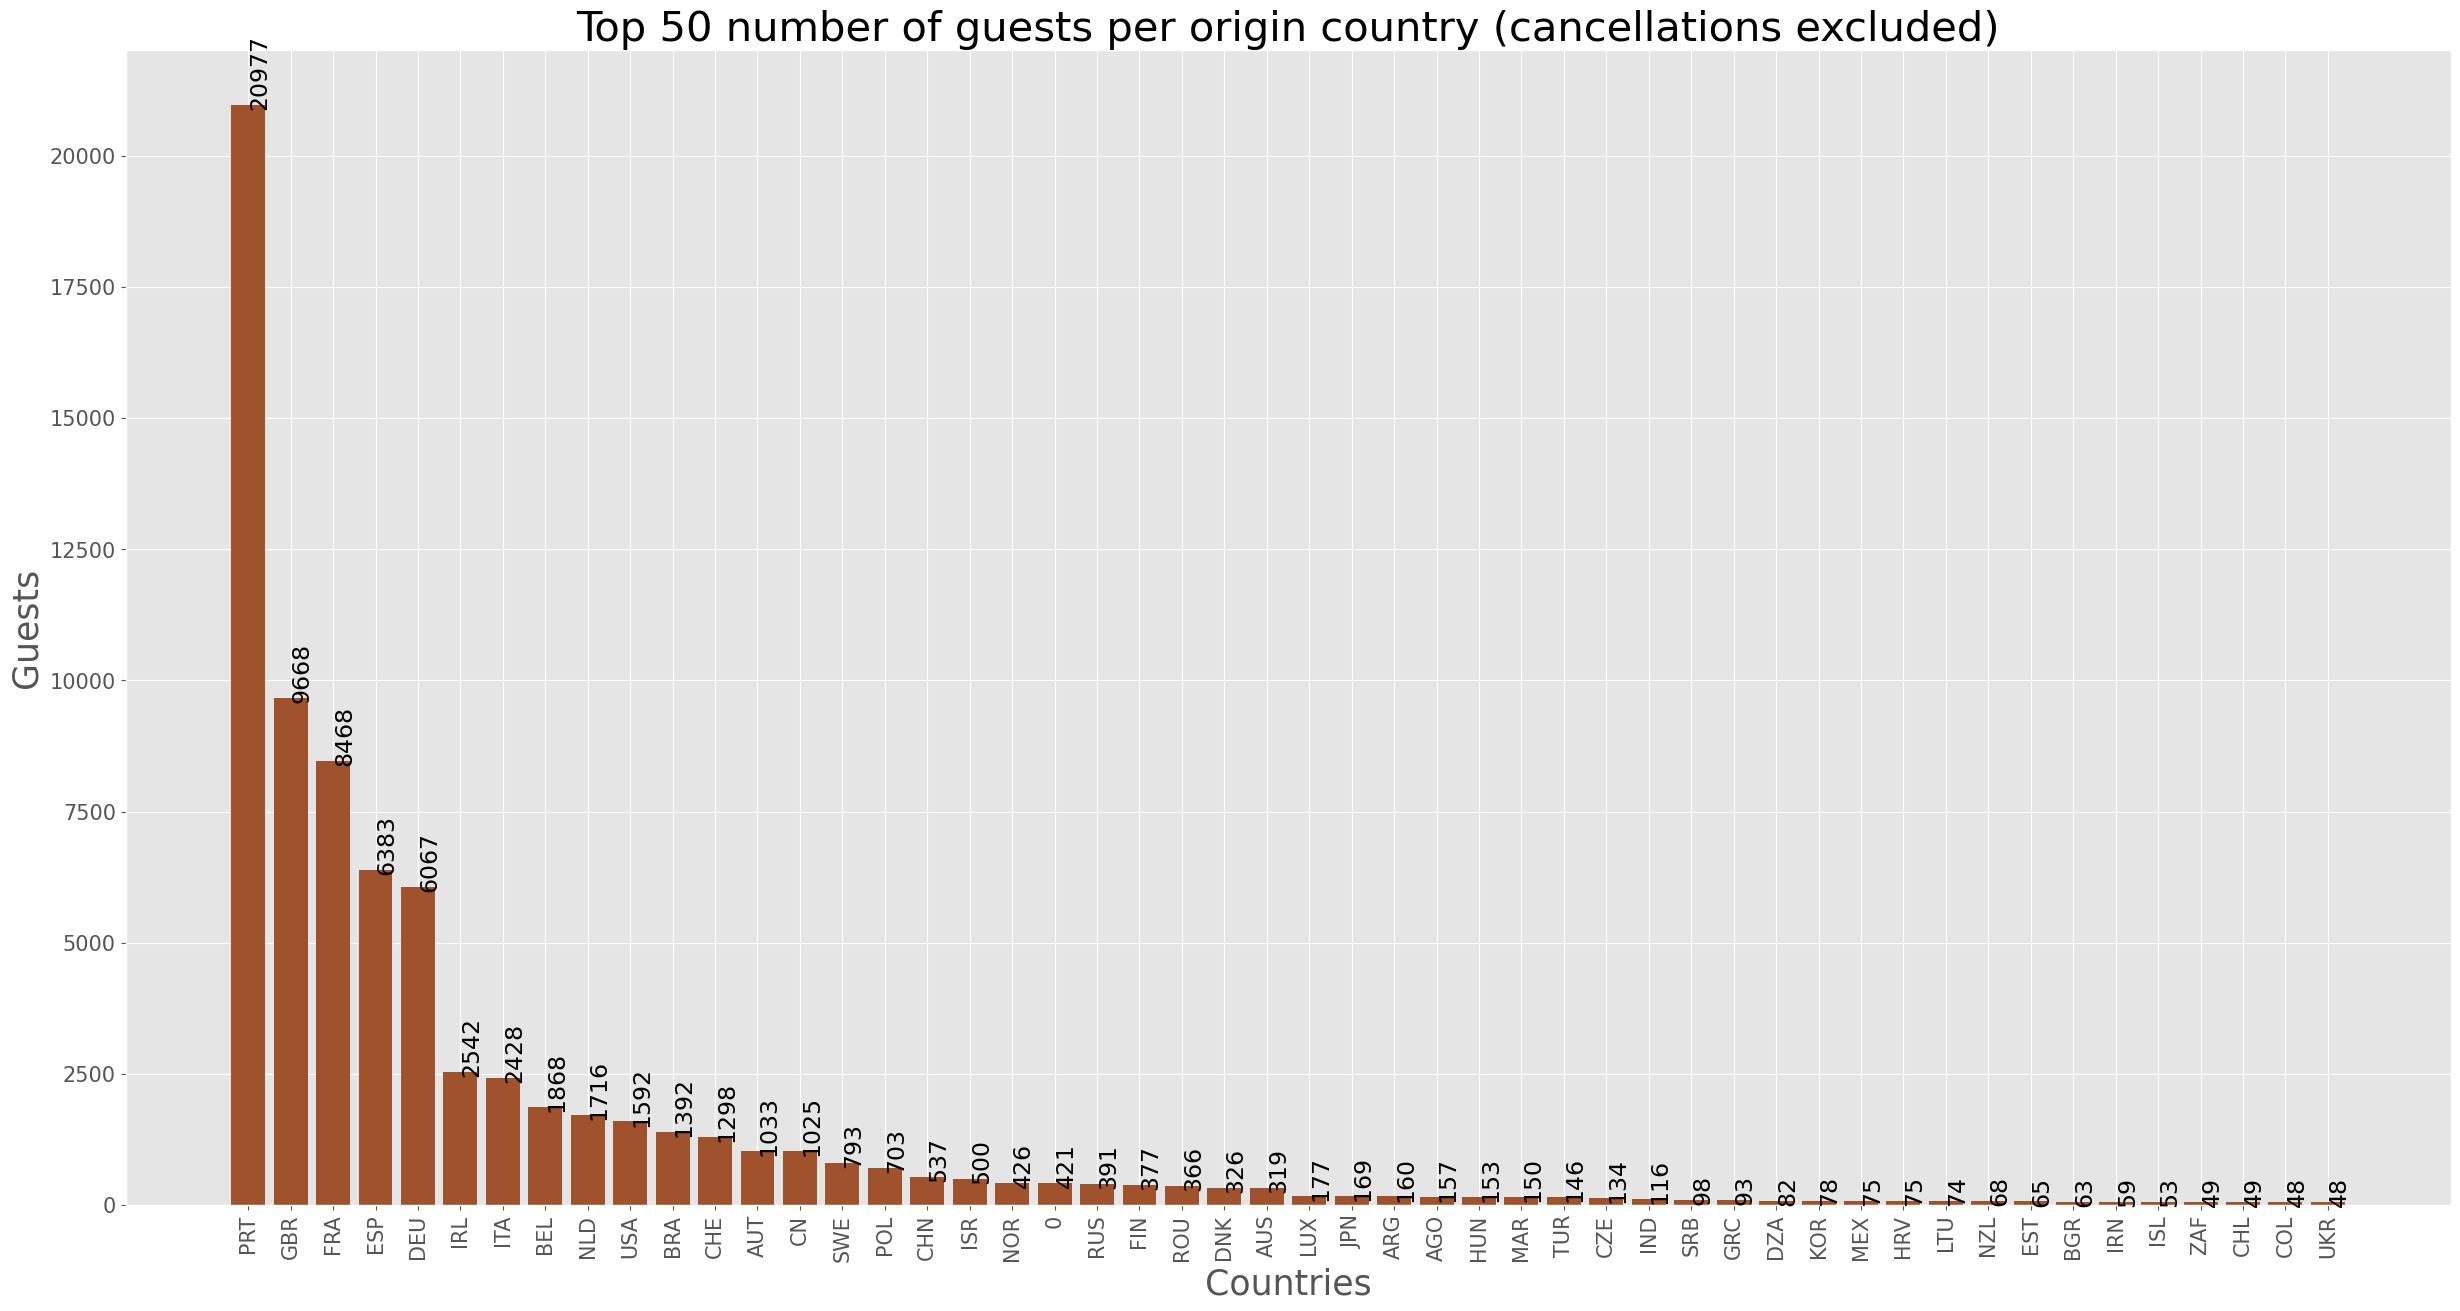

In [36]:
from matplotlib.pyplot import figure

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], size = 17, rotation=90)
        
if __name__ == '__main__':
    # creating data on which bar chart will be plot
    country = list(country_nr_nocancel_top50['Country'].astype(str))
    guest = list(country_nr_nocancel_top50['Guests'].astype(int))

    # making the bar chart on the data
    plt.bar(country, guest, color="sienna")

    plt.title("Top 50 number of guests per origin country (cancellations excluded)", size = 30)
    plt.xlabel("Countries", size=25)
    plt.ylabel("Guests", size=25)
    plt.xticks(fontsize=15, rotation=90)
    plt.yticks(fontsize=15)
    
    # calling the function to add value labels
    addlabels(x=country, y=guest)

    plt.gcf().set_size_inches(30, 15)
    #figure(figsize=(50,6), dpi=80)
    
    plt.savefig("top50_countries_nc.jpg")
    
    # visualizing the plot
    plt.show()
    plt.close()

Analyse the origin country, considering both the cancelled bookings and only the checked bookings, with Choropleth maps, using coloured map depending on the nr of guests / country.

In [37]:
px.choropleth(df_hotel_booking_nc_index,
              locations = df_hotel_booking_nc_index['Country'],
              color = df_hotel_booking_nc_index['Guests'],
              hover_name = df_hotel_booking_nc_index['Country'],
              title = "Origin countries of hotel guests"
             )

Majority of guests come form Europe zone.

### FOR DASHBOARD

In [39]:
df_hotel_booking_nc = df_hotel_booking[df_hotel_booking['is_canceled']==0]

In [40]:
df_map = df_hotel_booking_nc['country'].value_counts().reset_index()
df_map.columns = ['Country', 'Guests']

In [68]:
map_origin = px.choropleth(df_map,
                           locations = df_map['Country'],
                           color = df_map['Guests'],
                           hover_name = df_map['Country'],
                           title = "Origin countries of hotel guests")
map_origin.update_layout({'plot_bgcolor': '#01386a',
                          'paper_bgcolor': '#01386a'},
                            font_color="#b7c9e2")

map_origin.show()

<a id = 'special_request'><a/>
## 3.1 Special requests
[Top](#top)

The goal of this section is to:
- Analyse the number of special requests by hotel and room types.
- Analyse the number of special requests per nights of stay
- Analyse the number of special requests per number of cancellations

In [141]:
df_hotel_booking.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

<a id = 'special_request_room'><a/>
### 3.1.2 Special requests by hotel and room types
[Top](#top)

In [142]:
df_hotel_room_req = df_hotel_booking.groupby('total_of_special_requests')['hotel','reserved_room_type'].value_counts().to_frame()
df_hotel_room_req

C:\Users\elisa\AppData\Local\Temp\ipykernel_18104\2727689718.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



0
total_of_special_requests hotel        reserved_room_type       
0                         City Hotel   A                   40279
                          Resort Hotel A                   14208
                          City Hotel   D                    5189
                          Resort Hotel D                    3635
                                       E                    2159
...                                                          ...
5                         Resort Hotel A                       4
                                       G                       3
                                       E                       2
                          City Hotel   F                       1
                          Resort Hotel C                       1

[77 rows x 1 columns]

In [143]:
df_hotel_room_req.columns = ['Nr of (non)requests']
#df_hotel_room_nc_meal.index.name = 'meal_type'
df_hotel_room_req.reset_index()

total_of_special_requests         hotel reserved_room_type  \
0                           0    City Hotel                  A   
1                           0  Resort Hotel                  A   
2                           0    City Hotel                  D   
3                           0  Resort Hotel                  D   
4                           0  Resort Hotel                  E   
..                        ...           ...                ...   
72                          5  Resort Hotel                  A   
73                          5  Resort Hotel                  G   
74                          5  Resort Hotel                  E   
75                          5    City Hotel                  F   
76                          5  Resort Hotel                  C   

    Nr of (non)requests  
0                 40279  
1                 14208  
2                  5189  
3                  3635  
4                  2159  
..                  ...  
72                    4  
73                    3  
74                    2  
75                    1  
76                    1  

[77 rows x 4 columns]

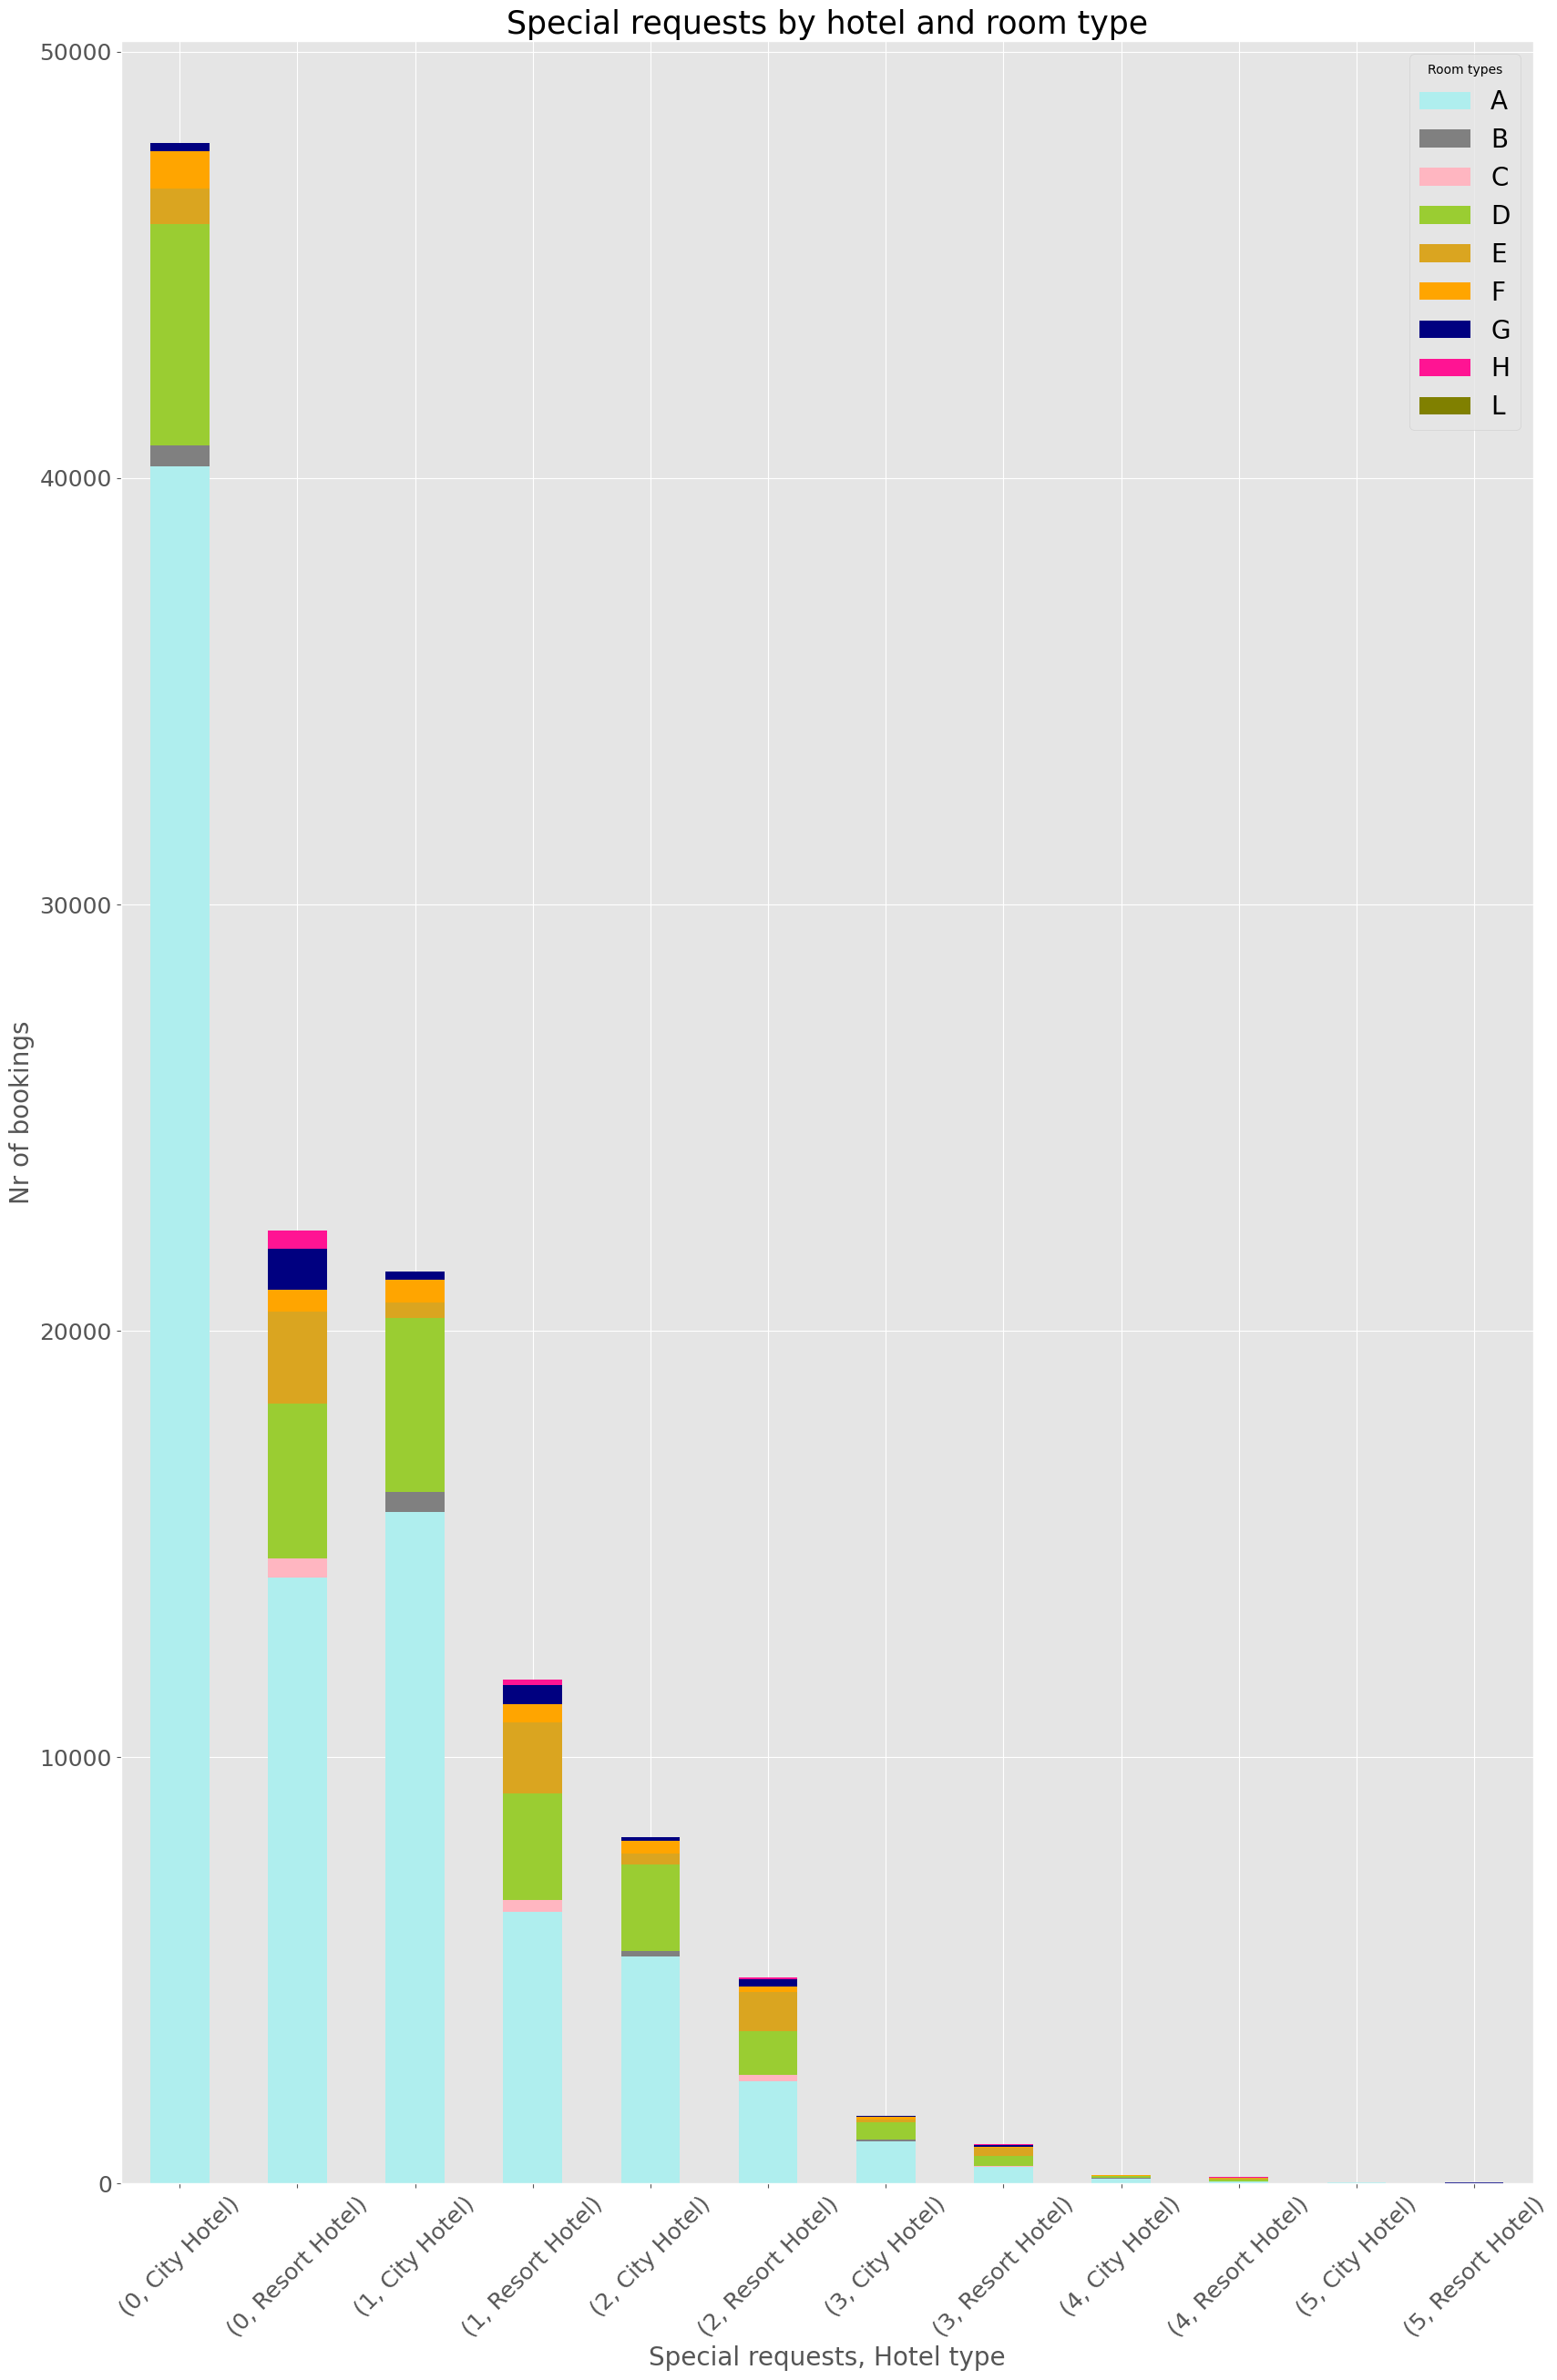

In [144]:
fig, ax = plt.subplots()
fig.set_size_inches(20,28)
plt.subplots_adjust(top=0.95)

colors = ["paleturquoise", "grey", "lightpink", "yellowgreen", "goldenrod", "orange", "navy", "deeppink", "olive"]

df_hotel_room_req.sort_index().unstack().plot(kind = 'bar',
                                              stacked = True,
                                              ax = ax,
                                              color = colors)
ax.set_title("Special requests by hotel and room type", size = 25)
ax.set_xlabel("Special requests, Hotel type", size=20)
ax.set_ylabel("Nr of bookings", size=20)
ax.tick_params(axis='x', labelsize=18, rotation = 45)
ax.tick_params(axis='y', labelsize=18)
mpl.rcParams['legend.fontsize'] = 20
ax.legend(title = "Room types", labels =['A', 'B', 'C','D','E','F','G','H','L'])

fig.savefig("requests_by_hotel_room.jpg")
#plt.close()

### FOR DASHBOARD

In [145]:
df_room_req = df_hotel_booking.groupby('total_of_special_requests')['reserved_room_type'].value_counts().to_frame()
df_room_req.columns = ['Nr of bookings']
df_room_req = df_room_req.reset_index()
df_room_req.columns = ['Special requests', 'Room type', 'Nr of bookings']
df_room_req

Special requests Room type  Nr of bookings
0                  0         A           54487
1                  0         D            8824
2                  0         E            2980
3                  0         F            1400
4                  0         G            1144
5                  0         B             484
6                  0         C             450
7                  0         H             426
8                  0         L               6
9                  1         A           22119
10                 1         D            6584
11                 1         E            2038
12                 1         F             965
13                 1         G             619
14                 1         B             453
15                 1         C             284
16                 1         H             121
17                 2         A            7717
18                 2         D            3063
19                 2         E            1155
20                 2         F             435
21                 2         G             254
22                 2         C             154
23                 2         B             129
24                 2         H              45
25                 3         A            1364
26                 3         D             611
27                 3         E             289
28                 3         F              81
29                 3         G              60
30                 3         B              42
31                 3         C              40
32                 3         H               7
33                 4         A             163
34                 4         D              87
35                 4         E              55
36                 4         F              12
37                 4         G              12
38                 4         B               7
39                 4         C               2
40                 4         H               2
41                 5         A              23
42                 5         D              10
43                 5         G               3
44                 5         E               2
45                 5         C               1
46                 5         F               1

In [148]:
bar_room_req = px.bar(df_room_req,
                      x = 'Special requests',
                      y = 'Nr of bookings',
                      color = 'Room type',
                      height = 400,
                      title = "Nr of bookings per nr of special requests per room type")
bar_room_req.update_layout({'plot_bgcolor': '#01386a',
                                    'paper_bgcolor': '#01386a'},
                                    font_color="snow",
                                    title_font_size = 25)
bar_room_req.show()

The majority of reservations didn't ask for any special requests.

There were many bookings with 1 special requests, mainly in the City hotel and in the room type A, basically the same number as for no-requests in Resort hotel.

There were very few 4 or 5 requests in both Reosrt and City hotels.

<a id = 'special_request_night'><a/>
### 3.1.3. Special requests by nights of stay
[Top](#top)

In [149]:
df_nights_req = df_hotel_booking.groupby('total_of_special_requests')['stays_in_weekend_nights','stays_in_week_nights'].value_counts().to_frame()
df_nights_req

C:\Users\elisa\AppData\Local\Temp\ipykernel_18104\19676904.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



0
total_of_special_requests stays_in_weekend_nights stays_in_week_nights       
0                         0                       2                     12185
                                                  1                     10291
                                                  3                      6991
                          1                       2                      5415
                          2                       5                      4627
...                                                                       ...
5                         1                       5                         1
                                                  3                         1
                          0                       5                         1
                                                  4                         1
                          4                       10                        1

[282 rows x 1 columns]

In [150]:
df_nights_req.columns = ['Nr of (non)requests']
#df_hotel_room_nc_meal.index.name = 'meal_type'
df_nights_req.reset_index()

total_of_special_requests  stays_in_weekend_nights  stays_in_week_nights  \
0                            0                        0                     2   
1                            0                        0                     1   
2                            0                        0                     3   
3                            0                        1                     2   
4                            0                        2                     5   
..                         ...                      ...                   ...   
277                          5                        1                     5   
278                          5                        1                     3   
279                          5                        0                     5   
280                          5                        0                     4   
281                          5                        4                    10   

     Nr of (non)requests  
0                  12185  
1                  10291  
2                   6991  
3                   5415  
4                   4627  
..                   ...  
277                    1  
278                    1  
279                    1  
280                    1  
281                    1  

[282 rows x 4 columns]

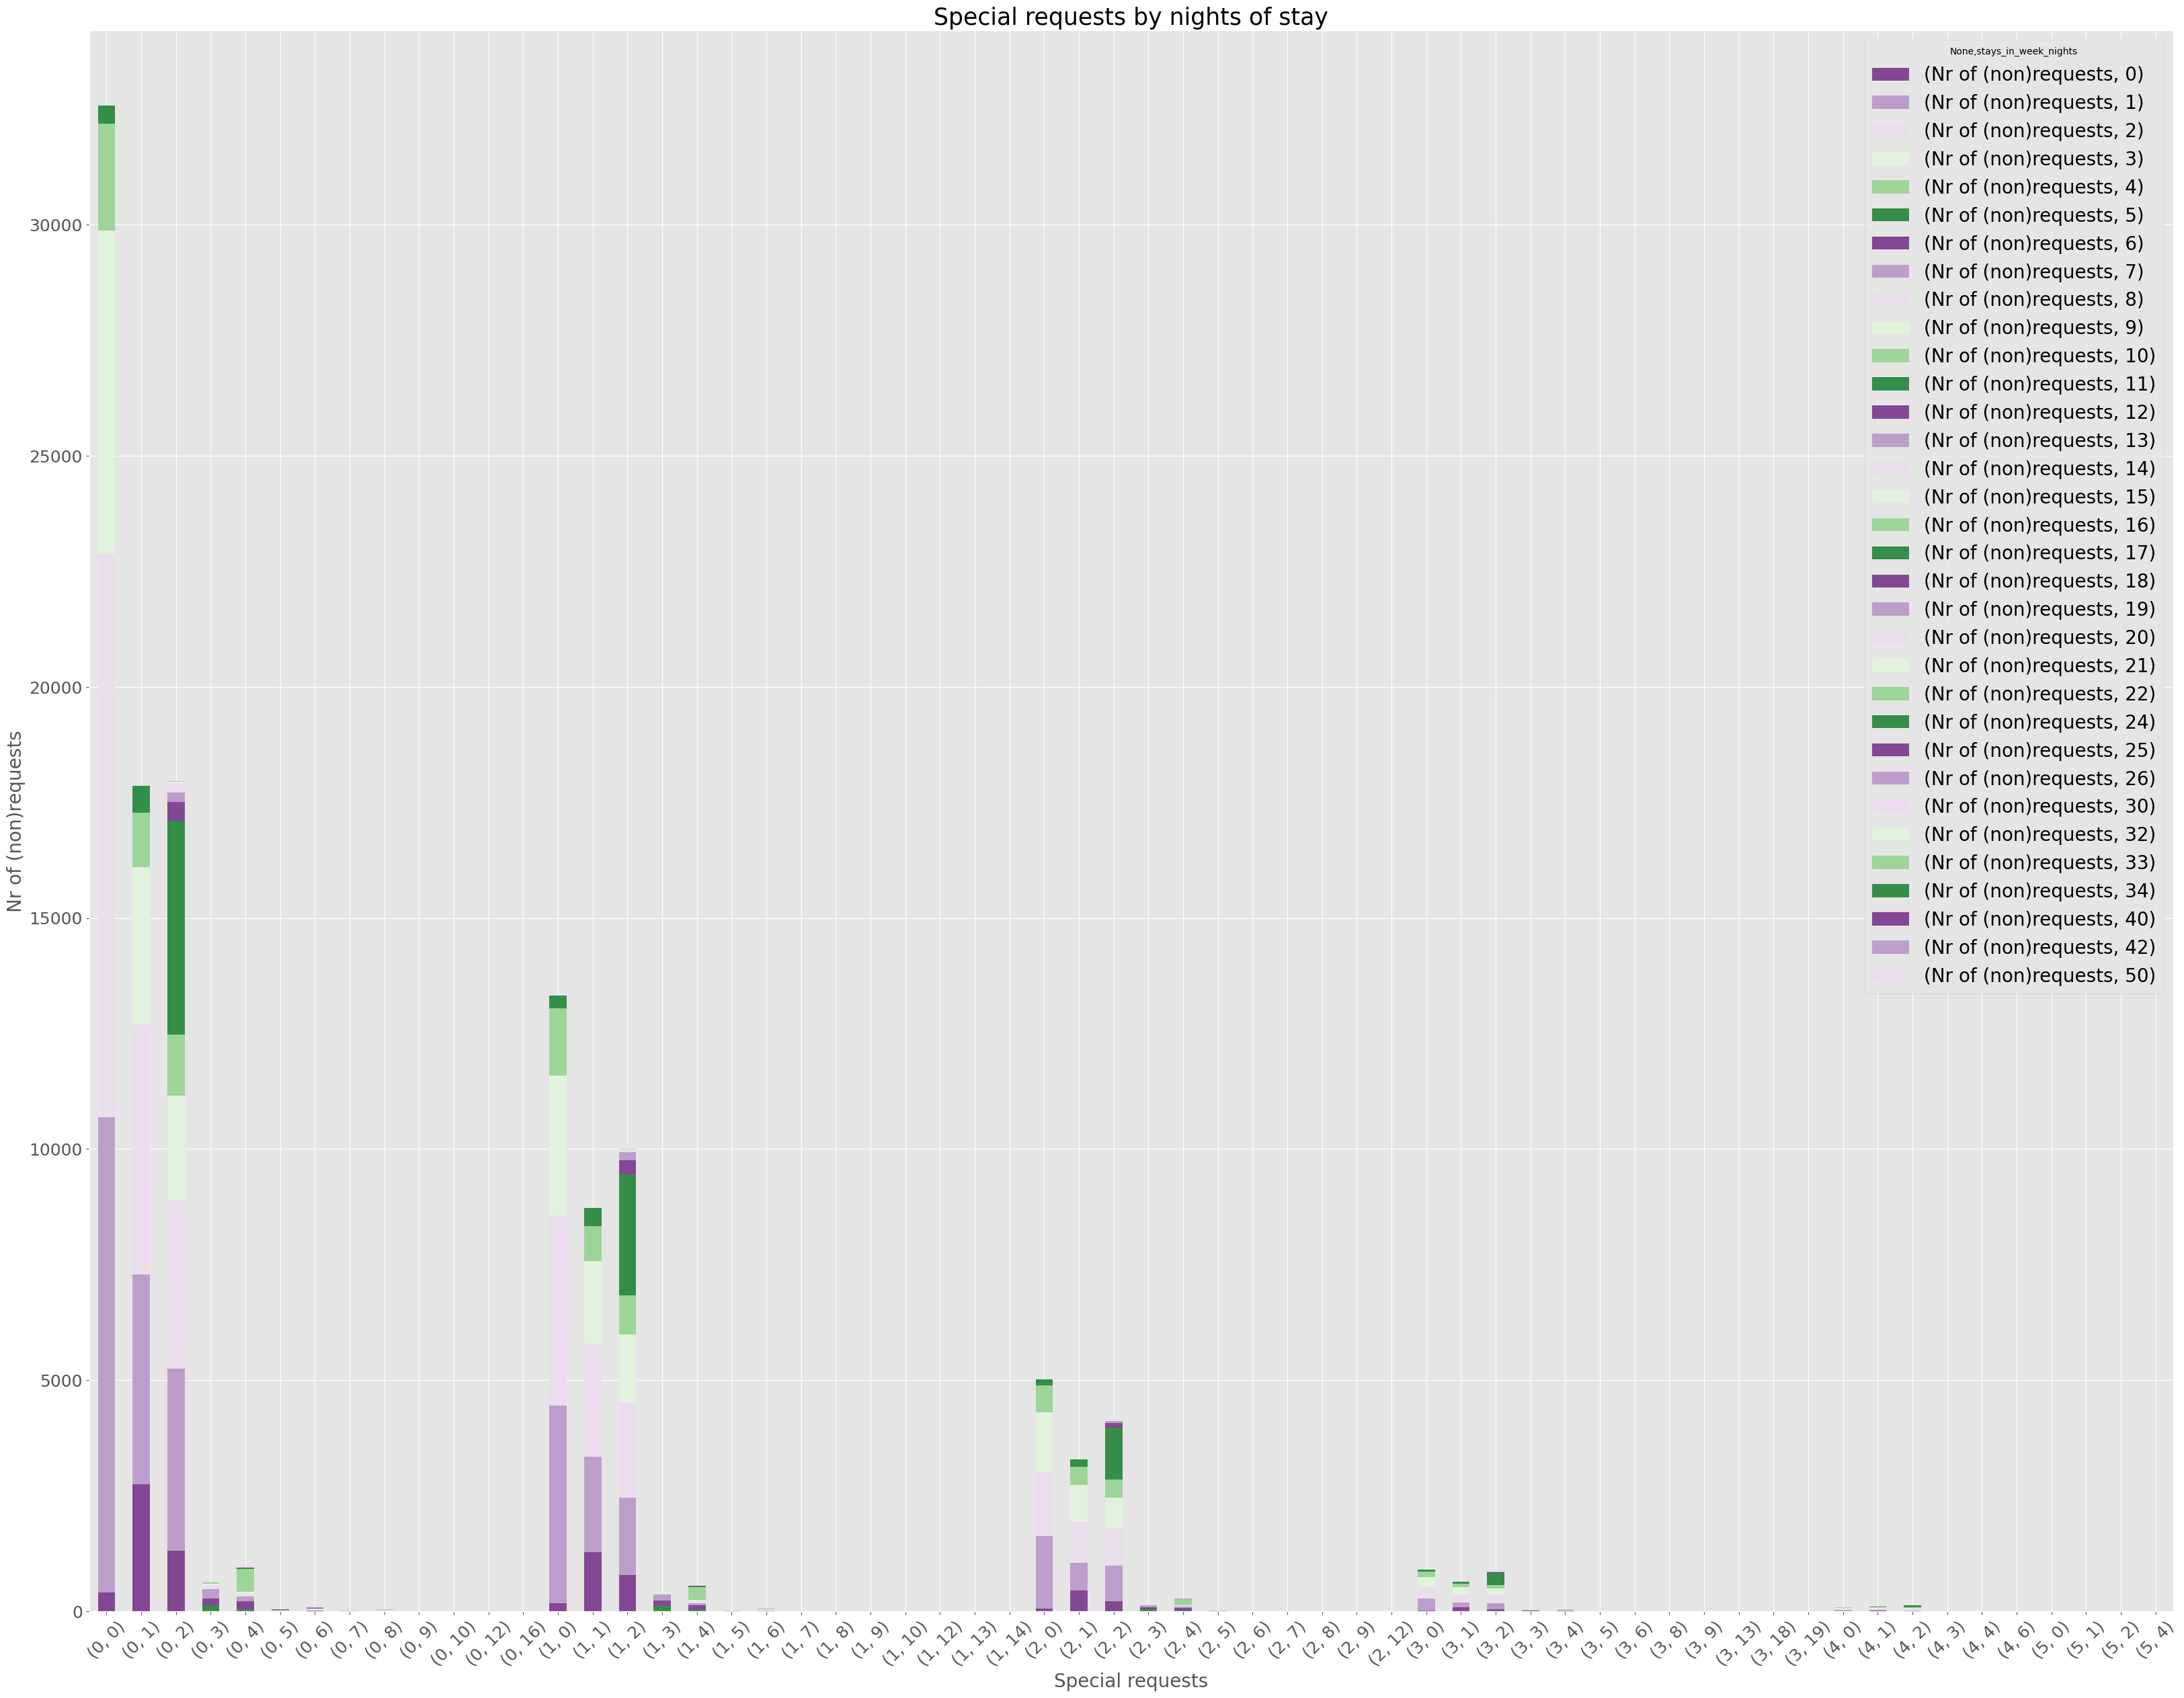

In [151]:
fig, ax = plt.subplots()
fig.set_size_inches(40,28)
plt.subplots_adjust(top=0.95)

#colors = ["paleturquoise", "grey", "lightpink", "yellowgreen", "goldenrod", "orange", "navy", "deeppink", "olive"]

df_nights_req.sort_index().unstack().plot(kind = 'bar',
                                          stacked = True,
                                          ax = ax
                                          #color = colors
                                          )
ax.set_title("Special requests by nights of stay", size = 25)
ax.set_xlabel("Special requests", size=20)
ax.set_ylabel("Nr of (non)requests", size=20)
ax.tick_params(axis='x', labelsize=18, rotation = 45)
ax.tick_params(axis='y', labelsize=18)
mpl.rcParams['legend.fontsize'] = 20
#ax.legend(title = "Room types", labels =['A', 'B', 'C','D','E','F','G','H','L'])

fig.savefig("requests_by_nights.jpg")
#plt.close()

The majority of reservations didn't ask for any special requests.

The shortest stays asked for special requests, rather than the longer stays.

<a id = 'special_request_cancellation'><a/>
### 3.1.4 Special requests and cancellations
[Top](#top)

In [152]:
# .agg() = aggregate over the requests (to count how many requests were asked or not, depending if the booking was cancelled or not)
# .rename() = rename the column
# .unstack() = to pivot the table
df_cancel_req = df_hotel_booking.groupby(['total_of_special_requests','is_canceled']).agg({'total_of_special_requests':'count'}).rename({'total_of_special_requests':'Total_count'}).unstack()
df_cancel_req

total_of_special_requests       
is_canceled                                       0      1
total_of_special_requests                                 
0                                             36667  33534
1                                             25867   7316
2                                             10086   2866
3                                              2049    445
4                                               304     36
5                                                38      2

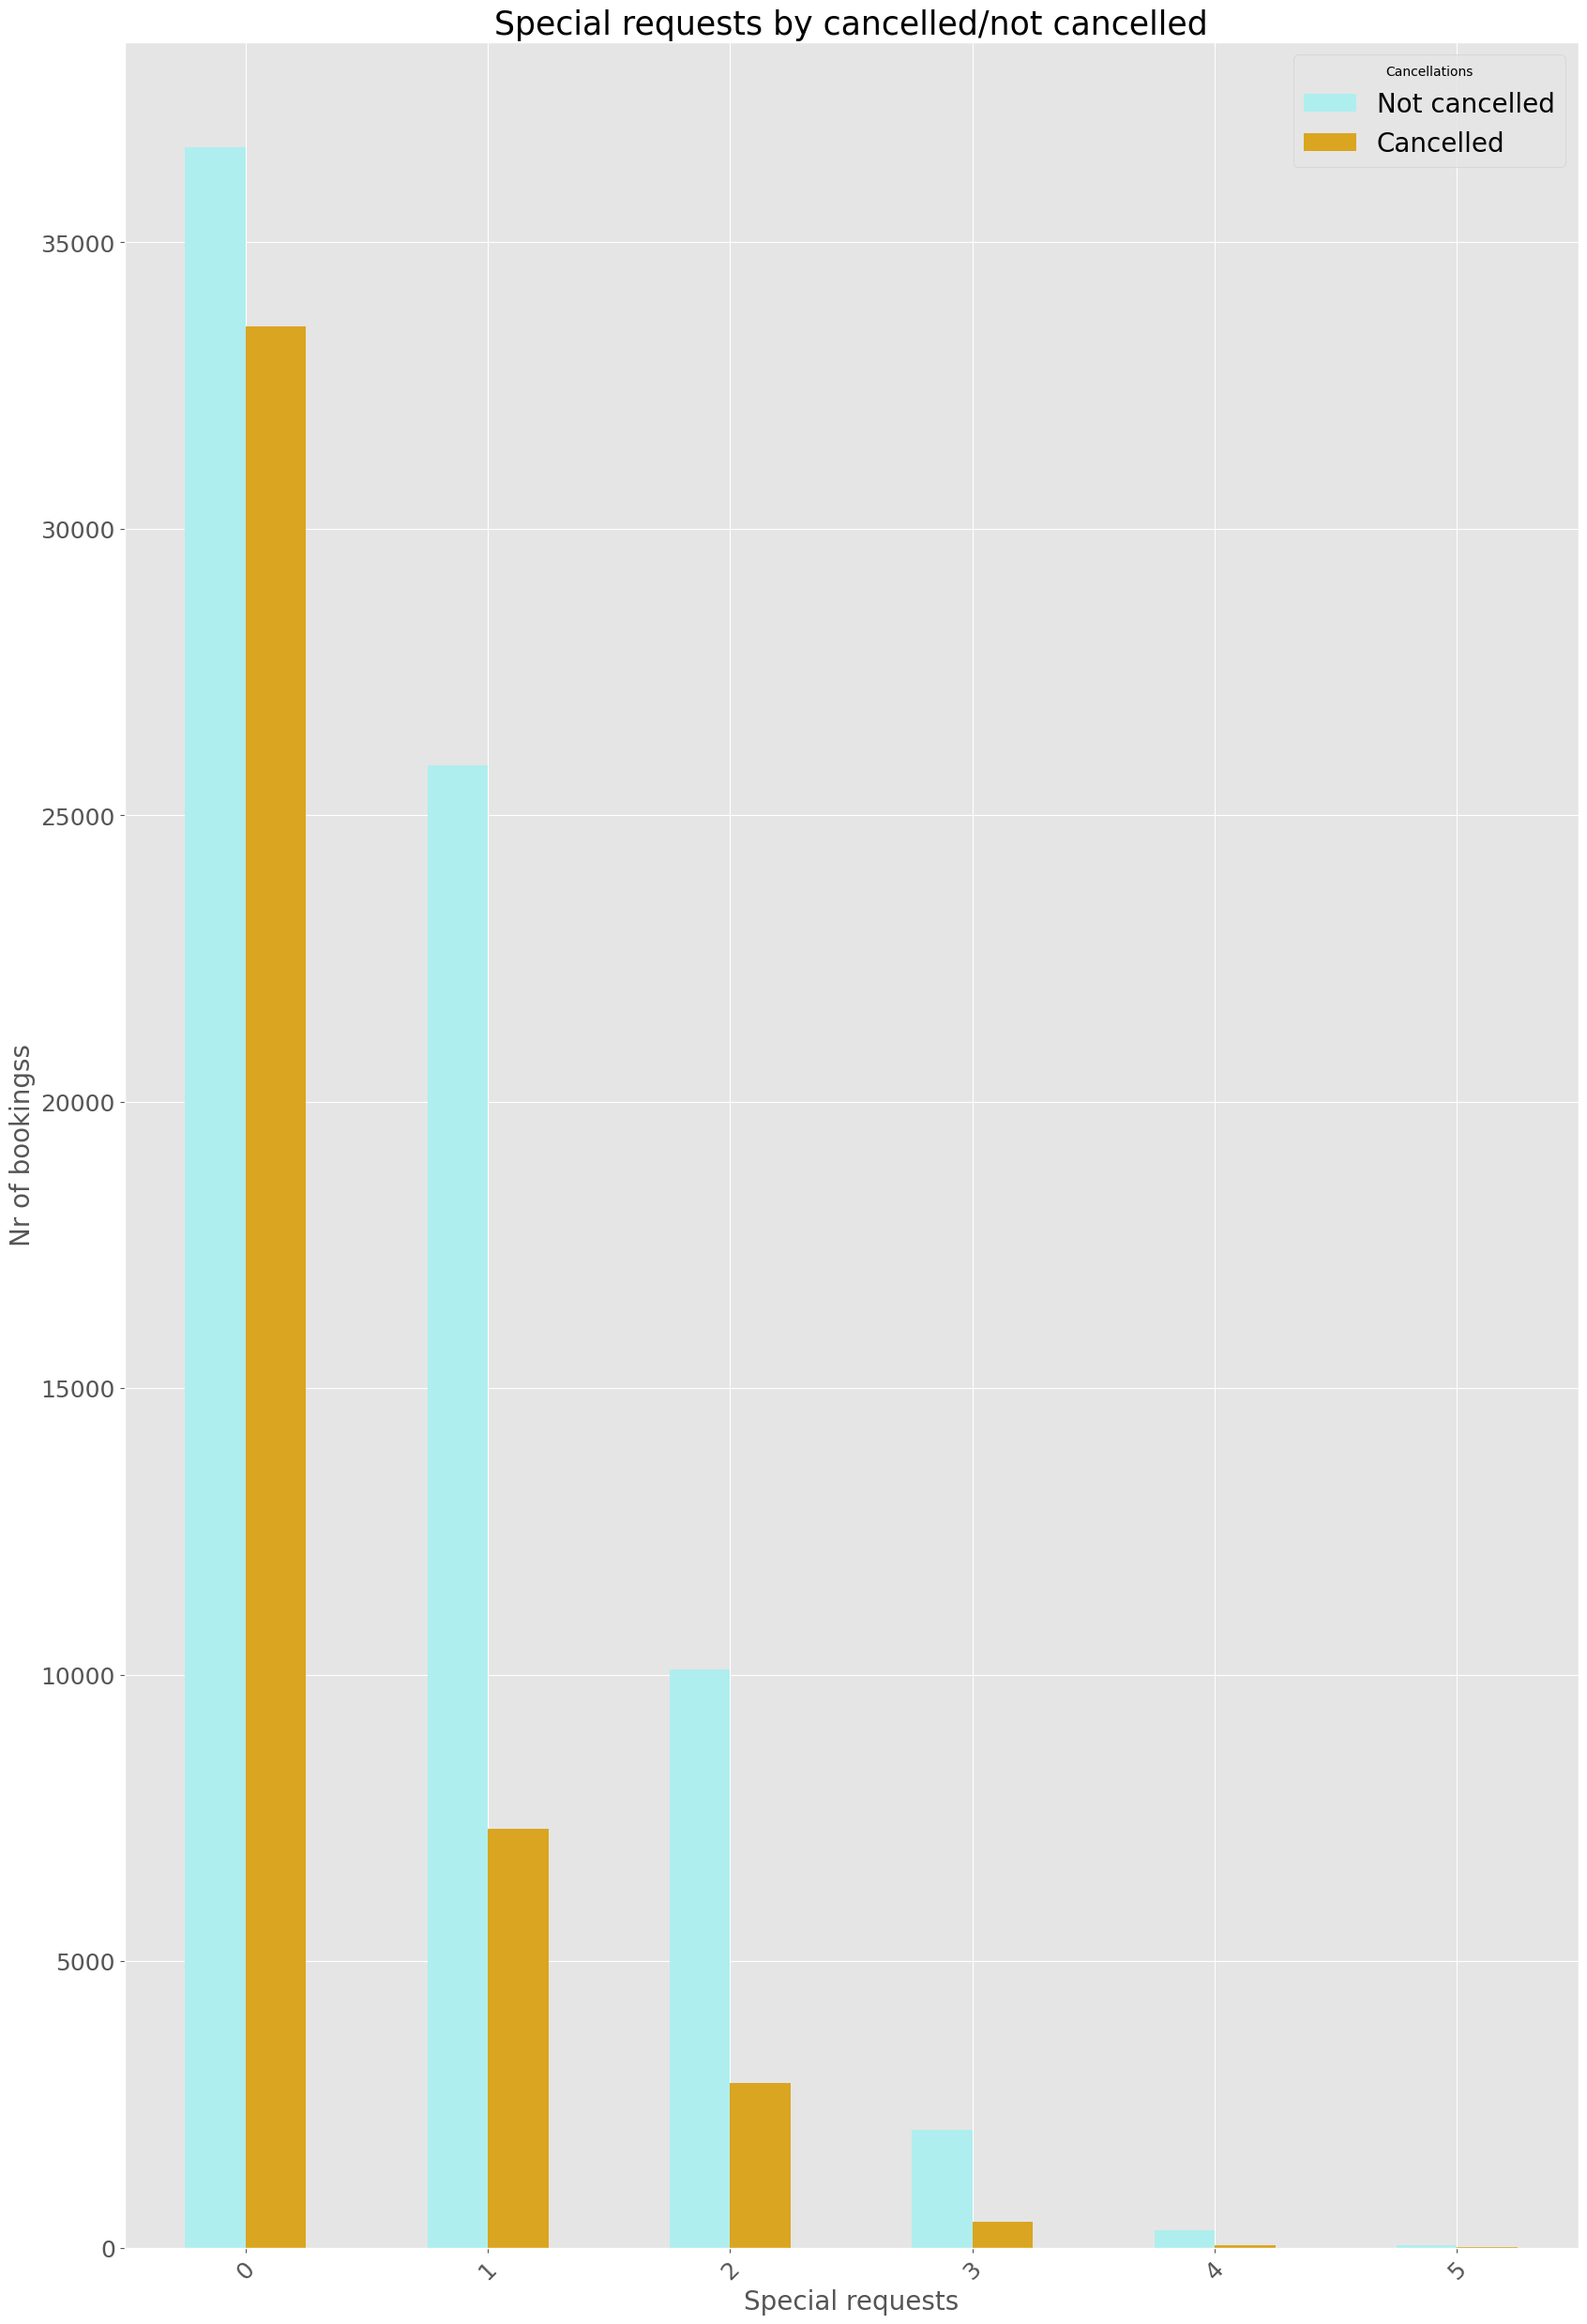

In [153]:
fig, ax = plt.subplots()
fig.set_size_inches(20,28)
plt.subplots_adjust(top=0.95)

colors = ["paleturquoise", "goldenrod"]

df_cancel_req.sort_index().plot(kind = 'bar',
                                ax = ax,
                                color = colors
                                )
ax.set_title("Special requests by cancelled/not cancelled", size = 25)
ax.set_xlabel("Special requests", size=20)
ax.set_ylabel("Nr of bookingss", size=20)
ax.tick_params(axis='x', labelsize=18, rotation = 45)
ax.tick_params(axis='y', labelsize=18)
mpl.rcParams['legend.fontsize'] = 20
ax.legend(title = "Cancellations", labels =['Not cancelled', 'Cancelled'])

fig.savefig("requests_by_cancel.jpg")
#plt.close()

### FOR DASHBOARD

In [154]:
df_cancel_req = df_hotel_booking.groupby('total_of_special_requests')['is_canceled'].value_counts().to_frame()
df_cancel_req.columns = ['Nr of bookings']
df_cancel_req = df_cancel_req.reset_index()
df_cancel_req.columns = ['Special requests', 'Cancelled (1)/Not cancelled (0)', 'Nr of bookings']
df_cancel_req['Cancelled (1)/Not cancelled (0)'] = df_cancel_req['Cancelled (1)/Not cancelled (0)'].astype(str)
df_cancel_req

Special requests Cancelled (1)/Not cancelled (0)  Nr of bookings
0                  0                               0           36667
1                  0                               1           33534
2                  1                               0           25867
3                  1                               1            7316
4                  2                               0           10086
5                  2                               1            2866
6                  3                               0            2049
7                  3                               1             445
8                  4                               0             304
9                  4                               1              36
10                 5                               0              38
11                 5                               1               2

In [238]:
bar_cancel_req = px.bar(df_cancel_req,
                        x = 'Special requests',
                        y = 'Nr of bookings',
                        barmode='group',
                        color = 'Cancelled (1)/Not cancelled (0)',
                        color_discrete_map={ # replaces default color mapping by value
                        "0": "#3c73a8", "1": "#a2cffe"
                        },
                        height = 400,
                        title = "Nr of bookings per nr of special requests per cancelled (1)/not cancelled (0)")
bar_cancel_req.update_layout({'plot_bgcolor': '#01386a',
                                    'paper_bgcolor': '#01386a'},
                                    font_color="snow",
                                    title_font_size = 25)
bar_cancel_req.show()

The majority of reservations, including both cancelled and not cancelled, didn't have any specialy requsts.
Whene there were >= 1 special requests, the not-cancelled bookings were always more than the cancelled ones.

<a id = 'customer_preference'></a>
### 3.1.3 What do customers prefer?
[Top](#top)

The goal of this section is to analyse the preferences of the customers of the hotel by:
- analysing the number of nights per room type per hotel type
- the length of stay per hotel type
- analysing the distribution of nights by market segment and hotel type

And also to analyse the preferences of the guests during their stay by:
- analysing the meals preferences

<a id = 'nights_room_hotel'></a>
#### 3.1.3.1 Number of nights per room type and per hotel type
[Top](#top)

Calculate number of nights per room type and per hotel type, using groupby.
The used dataframe is the filter df, considering only the checked-in bookings, to avoid false results in preferences.

In [111]:
df_hotel_booking_nc.head(3)

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    0.0     0.0                    0     Transient   0.0   
1    0.0     0.0                    0     Transient   0.0   
2    0.0     0.0                    0     Transient  75.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   

  reservation_status_date  
0                7/1/2015  
1                7/1/2015  
2                7/2/2015  

[3 rows x 32 columns]

In [112]:
df_hotel_booking_nc.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

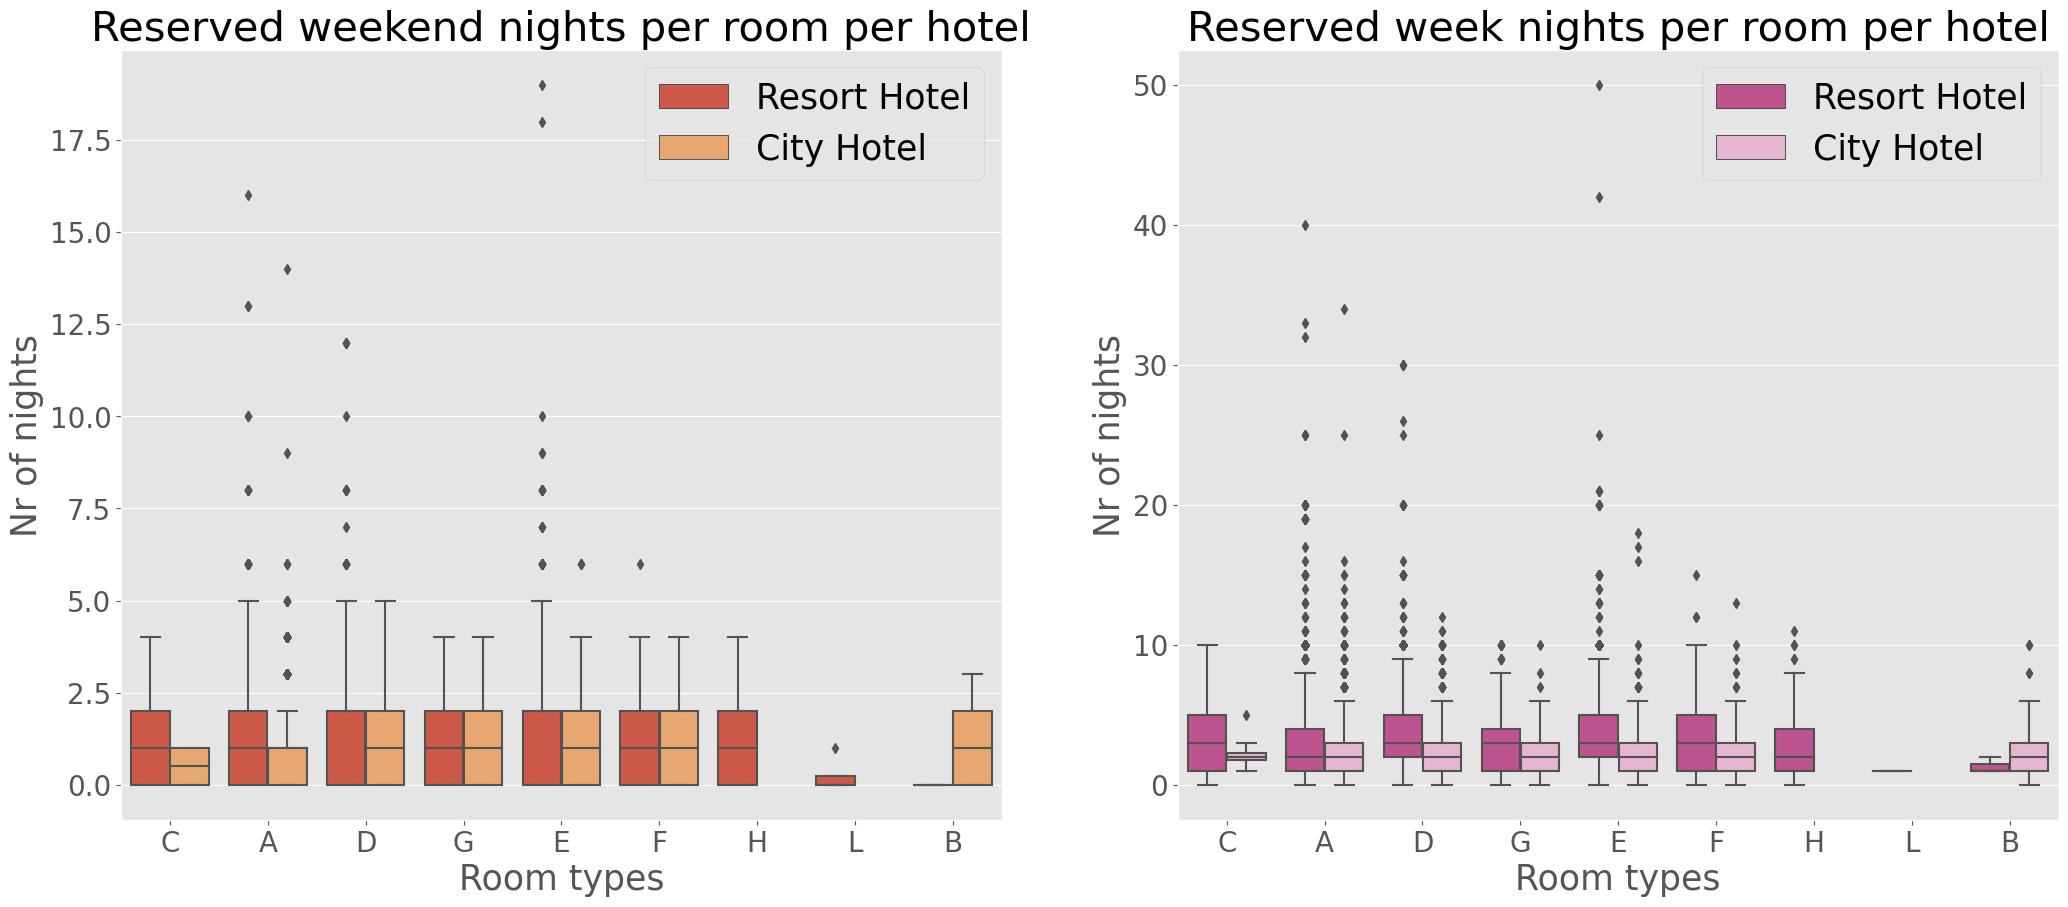

In [113]:
fig, (ax1, ax2) = plt.subplots(1,2)

fig.set_size_inches(25,10)

sns.set_palette("RdYlGn")
sns.boxplot(x="reserved_room_type",
            y="stays_in_weekend_nights",
            data=df_hotel_booking_nc,
            hue="hotel",
            ax = ax1)
ax1.set_title("Reserved weekend nights per room per hotel", size = 30)
ax1.set_xlabel("Room types", size = 25)
ax1.set_ylabel("Nr of nights", size = 25)
#ax1.set_xticks(df_hotel_booking_nc["reserved_room_type"], fontsize = 17) not working
#ax1.set_yticks(df_hotel_booking_nc["stays_in_weekend_nights"], fontsize = 17)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.legend(fontsize=25)

sns.set_palette("PiYG")
sns.boxplot(x="reserved_room_type",
            y="stays_in_week_nights",
            data=df_hotel_booking_nc,
            hue="hotel",
            ax = ax2)
ax2.set_title("Reserved week nights per room per hotel", size = 30)
ax2.set_xlabel("Room types", size = 25)
ax2.set_ylabel("Nr of nights", size = 25)
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
ax2.legend(fontsize=25)

fig.savefig("nights_per_rooms_hotel.jpg")
#plt.close()

WEEKEND NIGHTS PER ROOM

The dustribution of number of nights spent during weekend (left plot) seem to be rather similar among the different rrom types and also among the hotel types.
Generally, the 75% of bookings show less than 3 stayed nights.
However, room types A_Resort&Hotel, D-Resort and E-Resort show also some longer periods of stay, represented by the outliers up to 18 days, in particular in the hotel type as Resort (only room A shows longer stays also in City hotels up to 7 nights).

<a id= 'length_stay_hotel'><a/>
#### 3.1.3.2 Length of stays per hotel type
[Top](#top)

In [194]:
df_hotel_booking['Total_nights'] = df_hotel_booking['stays_in_weekend_nights'] + df_hotel_booking['stays_in_week_nights']
df_hotel_booking

C:\Users\elisa\AppData\Local\Temp\ipykernel_18104\566821142.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  company  days_in_waiting_list  \
0                          0       2  ...      0.0                     0   
1                          0       2  ...      0.0                     0   
2                          1       1  ...      0.0                     0   
3                          1       1  ...      0.0                     0   
4                          2       2  ...      0.0                     0   
...                      ...     ...  ...      ...                   ...   
119385                     5       2  ...      0.0                     0   
119386                     5       3  ...      0.0                     0   
119387                     5       2  ...      0.0                     0   
119388                     5       2  ...      0.0                     0   
119389                     7       2  ...      0.0                     0   

       customer_type     adr required_car_parking_spaces  \
0          Transient    0.00                           0   
1          Transient    0.00                           0   
2          Transient   75.00                           0   
3          Transient   75.00                           0   
4          Transient   98.00                           0   
...              ...     ...                         ...   
119385     Transient   96.14                           0   
119386     Transient  225.43                           0   
119387     Transient  157.71                           0   
119388     Transient  104.40                           0   
119389     Transient  151.20                           0   

       total_of_special_requests  reservation_status  reservation_status_date  \
0                              0           Check-Out                 7/1/2015   
1       

In [195]:
stays = df_hotel_booking[df_hotel_booking['is_canceled']==0]
stays = stays.groupby(['Total_nights', 'hotel']).agg('count').reset_index()
stays = stays.iloc[:,0:3]
stays.columns = ['Total nights', 'Hotel type', 'Nr of stays']
stays

Total nights    Hotel type  Nr of stays
0              0    City Hotel          251
1              0  Resort Hotel          371
2              1    City Hotel         9155
3              1  Resort Hotel         6579
4              2    City Hotel        10983
..           ...           ...          ...
57            46  Resort Hotel            1
58            48    City Hotel            1
59            56  Resort Hotel            1
60            60  Resort Hotel            1
61            69  Resort Hotel            1

[62 rows x 3 columns]

In [196]:
stays2 = df_hotel_booking[df_hotel_booking['is_canceled']==0]
stays2 = stays2[stays2['hotel']=='Resort Hotel']
stays2 = stays2.groupby('Total_nights').agg('count').reset_index()
stays2 = stays2.iloc[:,0:2]
stays2.columns = ['Total nights', 'Nr of stays']
stays2

Total nights  Nr of stays
0              0          371
1              1         6579
2              2         4488
3              3         3828
4              4         3321
5              5         1899
6              6         1205
7              7         4434
8              8          509
9              9          408
10            10          699
11            11          240
12            12           89
13            13           75
14            14          630
15            15           23
16            16           12
17            17           11
18            18            5
19            19            4
20            21           35
21            22            7
22            23            1
23            25           14
24            28           22
25            29            2
26            30            2
27            35            5
28            38            1
29            42            3
30            45            1
31            46            1
32            56            1
33            60            1
34            69            1

In [197]:
stays3 = df_hotel_booking[df_hotel_booking['is_canceled']==0]
stays3 = stays3[stays3['hotel']=='City Hotel']
stays3 = stays3.groupby('Total_nights').agg('count').reset_index()
stays3 = stays3.iloc[:,0:2]
stays3.columns = ['Total nights', 'Nr of stays']
stays3

Total nights  Nr of stays
0              0          251
1              1         9155
2              2        10983
3              3        11889
4              4         7694
5              5         3210
6              6         1111
7              7         1245
8              8          205
9              9          119
10            10           80
11            11           33
12            12           33
13            13           15
14            14           26
15            15           14
16            16            6
17            17            4
18            18            1
19            19            2
20            20            1
21            21            1
22            22            2
23            23            1
24            24            1
25            34            1
26            48            1

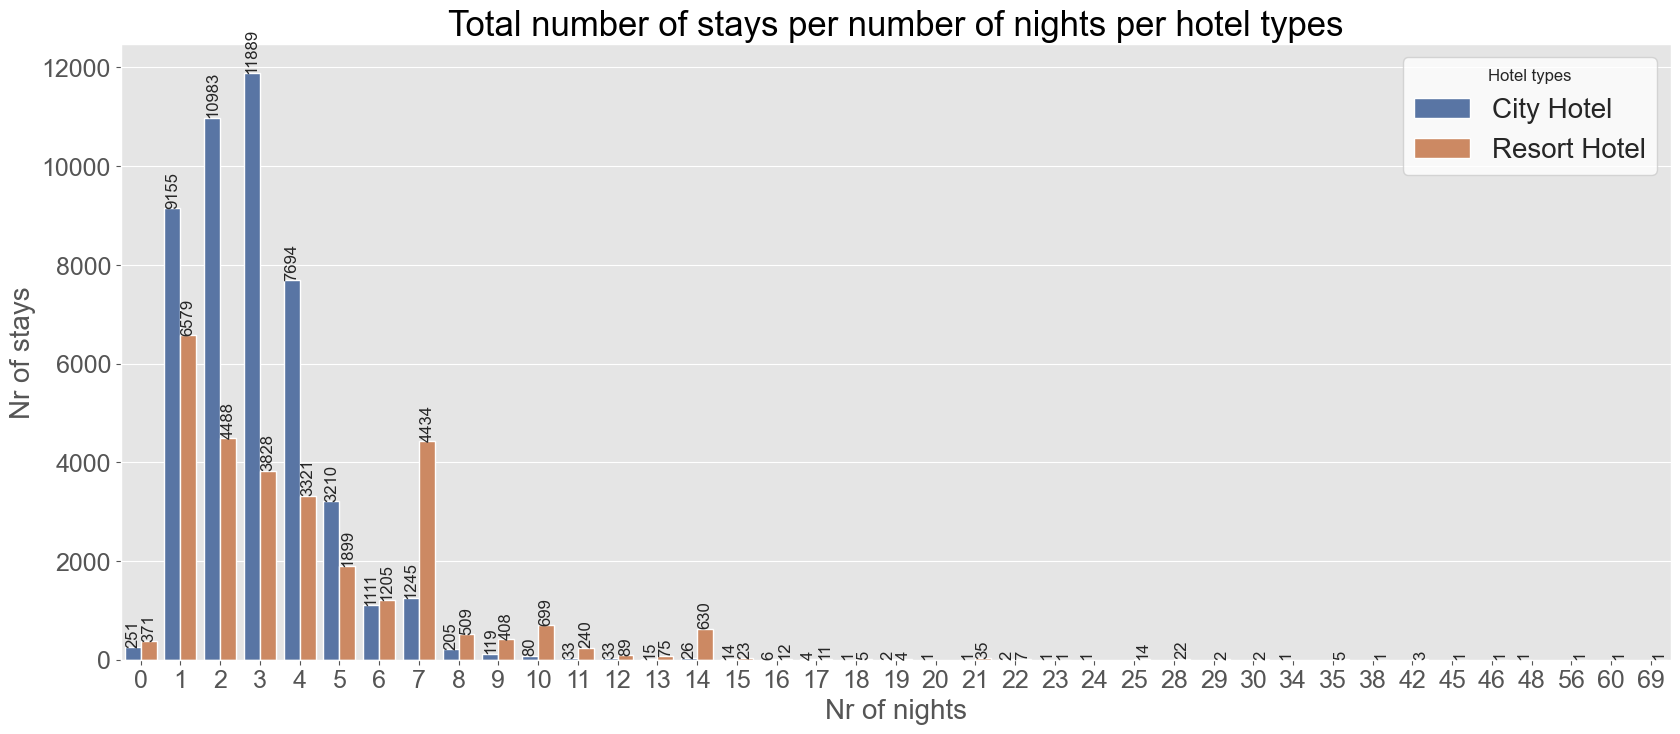

In [198]:
fig, ax1 = plt.subplots()
fig.set_size_inches(20,8)
sns.set_theme(style="white")
ax1 = sns.barplot(x='Total nights',
                  y='Nr of stays',
                  hue='Hotel type',
                  hue_order = ['City Hotel', 'Resort Hotel'],
                  data = stays,
                  ax = ax1)
for i in ax1.containers:
    ax1.bar_label(i,rotation=90,)
ax1.set_title("Total number of stays per number of nights per hotel types", size = 25)
ax1.set_xlabel("Nr of nights", size = 20)
ax1.set_ylabel("Nr of stays", size = 20)
ax1.tick_params(axis="x", labelsize = 18)
ax1.tick_params(axis="y", labelsize = 18)
#sns.move_legend(ax1, "upper right") # other posisbility to move the legend
ax1.legend(loc = "upper right", title = "Hotel types", prop={'size': 20})
fig.savefig("Stays_nights_hotel.jpg")
#plt.close()

In [199]:
fig = px.bar(stays,
             x = 'Total nights',
             y = 'Nr of stays',
             color = 'Hotel type',
             text = 'Nr of stays',
             barmode = 'group',
             height = 400,
             title = "Nr of bookings per nr of night of stay per hotel type")

fig.show()

The highest number of stays is found at City hotel and for 3 nights of stay, followed by 2, 1, 4, 5, 7, 6 nights of stays still in City hotel.

The number of stays at Resort hotels is way lower than the stays at a City hotel. However, similarly for the City hotel, the highest number of stays are for the number of nights between 1 and 7. In particular, the highest is for 1 night of stay, followed by 2, 7, 3, 4, 5, 6.

Concerning longer period fo stays (8, 9, 10, 14 nights), the number of stys is higher at Resort hotels, meaning that City hotel are priviledge for short stays more than Resort hotels, where customer stay longer.

### FOR DAHSBOARD

In [200]:
df_hotel_booking_nc['Total_nights'] = df_hotel_booking_nc['stays_in_weekend_nights'] + df_hotel_booking_nc['stays_in_week_nights']
df_stays = df_hotel_booking_nc.groupby('Total_nights').agg('count').reset_index()
df_stays = df_stays.iloc[:,0:2]
df_stays.columns = ['Total nights', 'Nr of stays']
df_stays

C:\Users\elisa\AppData\Local\Temp\ipykernel_18104\3768123871.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Total nights  Nr of stays
0              0          622
1              1        15734
2              2        15471
3              3        15717
4              4        11015
5              5         5109
6              6         2316
7              7         5679
8              8          714
9              9          527
10            10          779
11            11          273
12            12          122
13            13           90
14            14          656
15            15           37
16            16           18
17            17           15
18            18            6
19            19            6
20            20            1
21            21           36
22            22            9
23            23            2
24            24            1
25            25           14
26            28           22
27            29            2
28            30            2
29            34            1
30            35            5
31            38            1
32            42            3
33            45            1
34            46            1
35            48            1
36            56            1
37            60            1
38            69            1

In [202]:
bar_stays = px.bar(df_stays,
                   x = 'Total nights',
                   y = 'Nr of stays',
                   text = 'Nr of stays',
                   barmode = 'group',
                   height = 400,
                   title = "Nr of bookings per nr of night of stay per hotel type")
bar_stays.update_layout({'plot_bgcolor': '#01386a',
                                  'paper_bgcolor': '#01386a'},
                                  font_color="snow",
                                  title_font_size = 25,
                                  xaxis=dict(showgrid=False),
                                  yaxis=dict(showgrid=False))
bar_stays.update_traces(marker_color='#a2cffe')
bar_stays

<a id = 'nights_market_hotel'><a/>
#### 3.1.3.3 Distribution of nights by market segment and hotel type
[Top](#top)

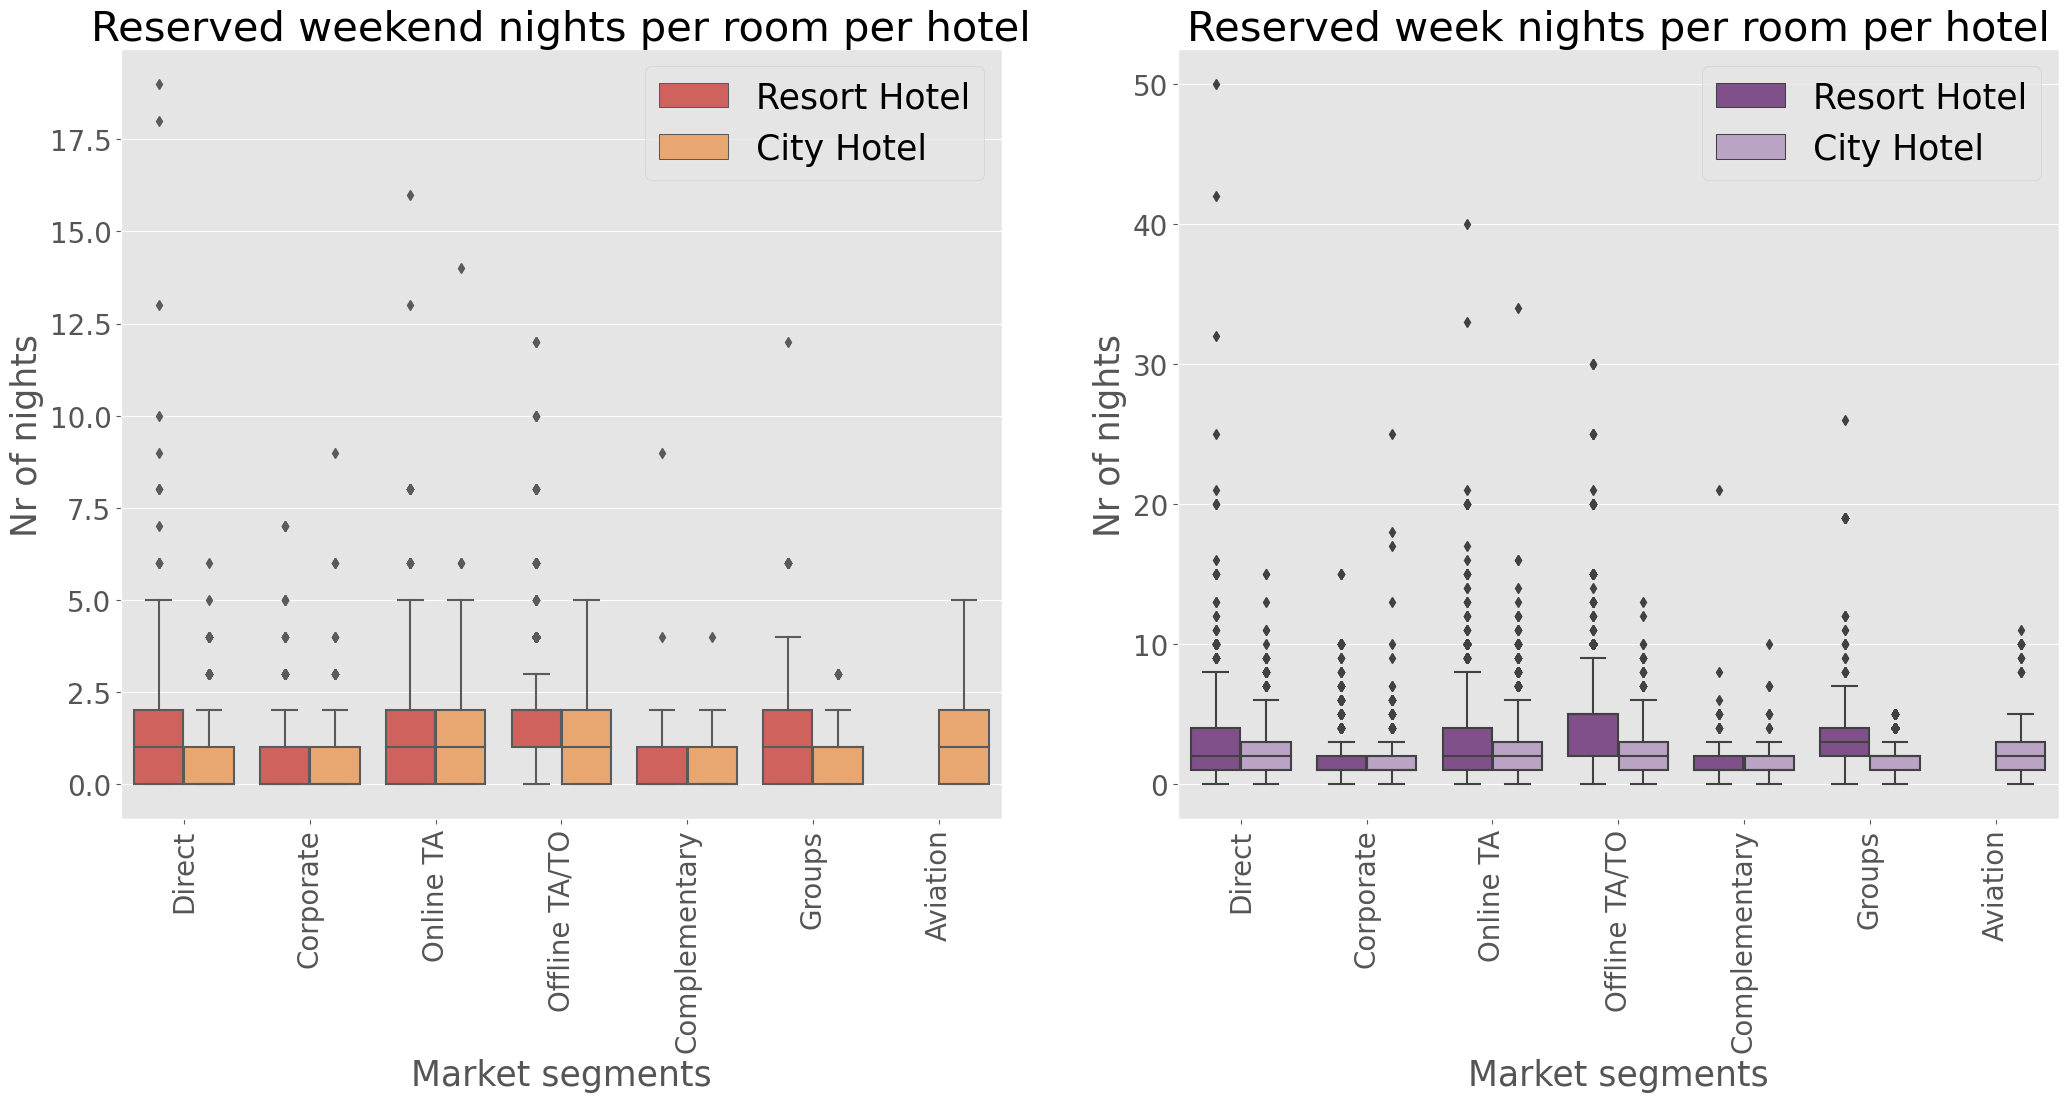

In [114]:
fig, (ax1, ax2) = plt.subplots(1,2)

fig.set_size_inches(25,10)

sns.set_palette("Spectral")
sns.boxplot(x="market_segment",
            y="stays_in_weekend_nights",
            data=df_hotel_booking_nc,
            hue="hotel",
            ax = ax1)
ax1.set_title("Reserved weekend nights per room per hotel", size = 30)
ax1.set_xlabel("Market segments", size = 25)
ax1.set_ylabel("Nr of nights", size = 25)
#ax1.set_xticks(df_hotel_booking_nc["reserved_room_type"], fontsize = 17) not working
#ax1.set_yticks(df_hotel_booking_nc["stays_in_weekend_nights"], fontsize = 17)
ax1.tick_params(axis='x', labelsize=20, rotation = 90)
ax1.tick_params(axis='y', labelsize=20)
ax1.legend(fontsize=25)

sns.set_palette("PRGn")
sns.boxplot(x="market_segment",
            y="stays_in_week_nights",
            data=df_hotel_booking_nc,
            hue="hotel",
            ax = ax2)
ax2.set_title("Reserved week nights per room per hotel", size = 30)
ax2.set_xlabel("Market segments", size = 25)
ax2.set_ylabel("Nr of nights", size = 25)
ax2.tick_params(axis='x', labelsize=20, rotation = 90)
ax2.tick_params(axis='y', labelsize=20)
ax2.legend(fontsize=25)

fig.savefig("nights_per_market_hotel.jpg")
#plt.close()

<a id= 'bookings_market'><a/>
#### 3.1.3.5 Bookings by market segment
[Top](#top)

In [203]:
market_segment_hotel = df_hotel_booking[df_hotel_booking['is_canceled']==0]
market_segment_hotel = df_hotel_booking.groupby(['market_segment', 'hotel']).agg('count').reset_index()
market_segment_hotel = market_segment_hotel.iloc[:,0:3]
market_segment_hotel.columns = ['Market segment', 'Hotel type', 'Nr of bookings']
market_segment_hotel

Market segment    Hotel type  Nr of bookings
0        Aviation    City Hotel             235
1   Complementary    City Hotel             527
2   Complementary  Resort Hotel             201
3       Corporate    City Hotel            2977
4       Corporate  Resort Hotel            2305
5          Direct    City Hotel            6072
6          Direct  Resort Hotel            6510
7          Groups    City Hotel           13959
8          Groups  Resort Hotel            5832
9   Offline TA/TO    City Hotel           16712
10  Offline TA/TO  Resort Hotel            7470
11      Online TA    City Hotel           38679
12      Online TA  Resort Hotel           17729
13      Undefined    City Hotel               2

In [204]:
%matplotlib inline 
#sns.reset_orig()
fig, ax1 = plt.subplots()
fig.set_size_inches(20,8)
sns.set_theme(style="whitegrid")

sns.barplot(x = 'Market segment',
            y = 'Nr of bookings',
            hue = 'Hotel type',
            data = market_segment_hotel,
            ax = ax1)
for i in ax1.containers:
    ax1.bar_label(i,)

ax1.set_title("Number of bookings per market segment and per hotel type", size = 25)
ax1.set_xlabel("Market segment", size= 20)
ax1.set_ylabel("Nr of bookings", size=20)
ax1.tick_params(labelsize=18)
ax1.legend(loc="upper left", prop={'size':18})

fig.savefig("Bookings_marketseg_hotel.jpg")
plt.close()

Calculate the counts of the booking for each market segments, without separting per hoterl type.

In [205]:
market_segment = df_hotel_booking[df_hotel_booking['is_canceled']==0]
market_segment = market_segment['market_segment'].value_counts().to_frame().reset_index()
market_segment.columns = ['Market segment', 'Bookings']
market_segment

Market segment  Bookings
0      Online TA     35673
1  Offline TA/TO     15880
2         Direct     10648
3         Groups      7697
4      Corporate      4291
5  Complementary       639
6       Aviation       183

ValueError: 'explode' must be of length 'x'

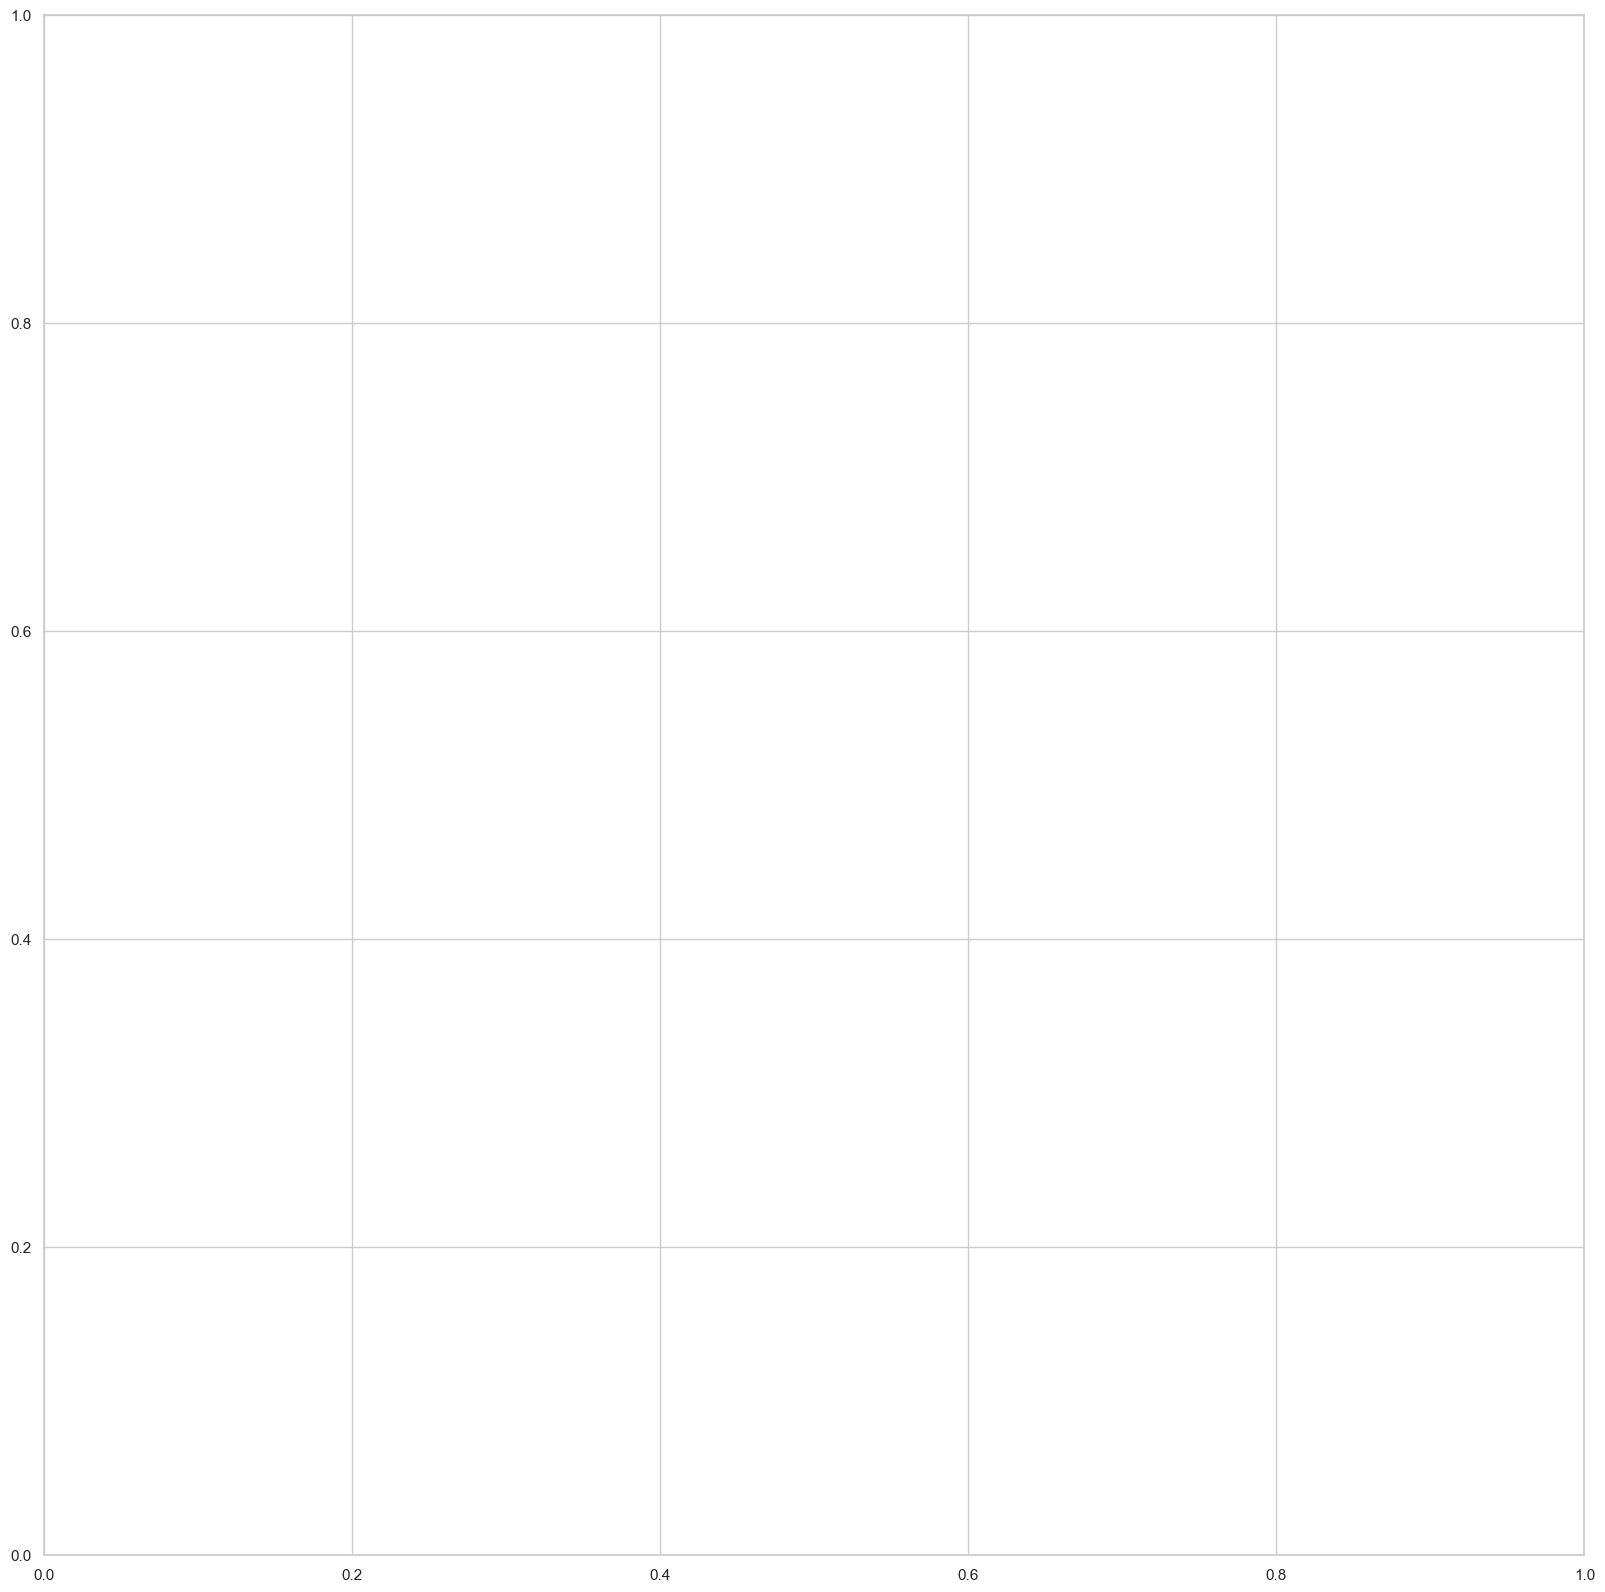

In [206]:
fig, ax1 = plt.subplots()
fig.set_size_inches(20,20)

explode1 = (0, 0, 0, 0, 0, 0.1, 0.1, 0.1)
#labeldistance1 = (1.1, 1.1, 1.1, 1.1, 1.1, 1.5, 1.5, 1.5)
ax1.pie(market_segment['Bookings'],
        labels = market_segment['Market segment'],
        autopct='%1.0f%%',
        labeldistance=1.1,
        pctdistance=0.9,
        textprops={'fontsize':20},
        explode=explode1)
ax1.set_title("Percentage of bookings per market segment", size = 25)
ax1.legend(prop={'size':20})

fig.savefig("Bookings_perc_market_seg.jpg")

### FOR DASHBOARD

In [207]:
df_market = df_hotel_booking_nc['market_segment'].value_counts().to_frame().reset_index()
df_market.columns = ['Market segment', 'Nr of bookings']
df_market

Market segment  Nr of bookings
0      Online TA           35673
1  Offline TA/TO           15880
2         Direct           10648
3         Groups            7697
4      Corporate            4291
5  Complementary             639
6       Aviation             183

In [208]:
pie_market = px.pie(df_market,
                    values = 'Nr of bookings',
                    names = 'Market segment',
                    title = 'Share of bookings per market segment')
pie_market.update_layout({'plot_bgcolor': '#01386a',
                                  'paper_bgcolor': '#01386a'},
                                  font_color="snow",
                                  title_font_size = 25)
pie_market.show()

The most type of bookings is made as an Online booking (47%), followed by Offline Groups, Direct and Corporate.

<a id = 'meal'><a/>
#### 3.1.3.6 Meal preferences
[Top](#top)

In [115]:
df_hotel_booking_nc["meal"].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [116]:
df_meals_guests_nc_index = df_hotel_booking_nc["meal"].value_counts().reset_index()
df_meals_guests_nc_index.columns = ['Meals','Count']
df_meals_guests_nc_index

Meals  Count
0         BB  57730
1         HB   9475
2         SC   6603
3  Undefined    883
4         FB    320

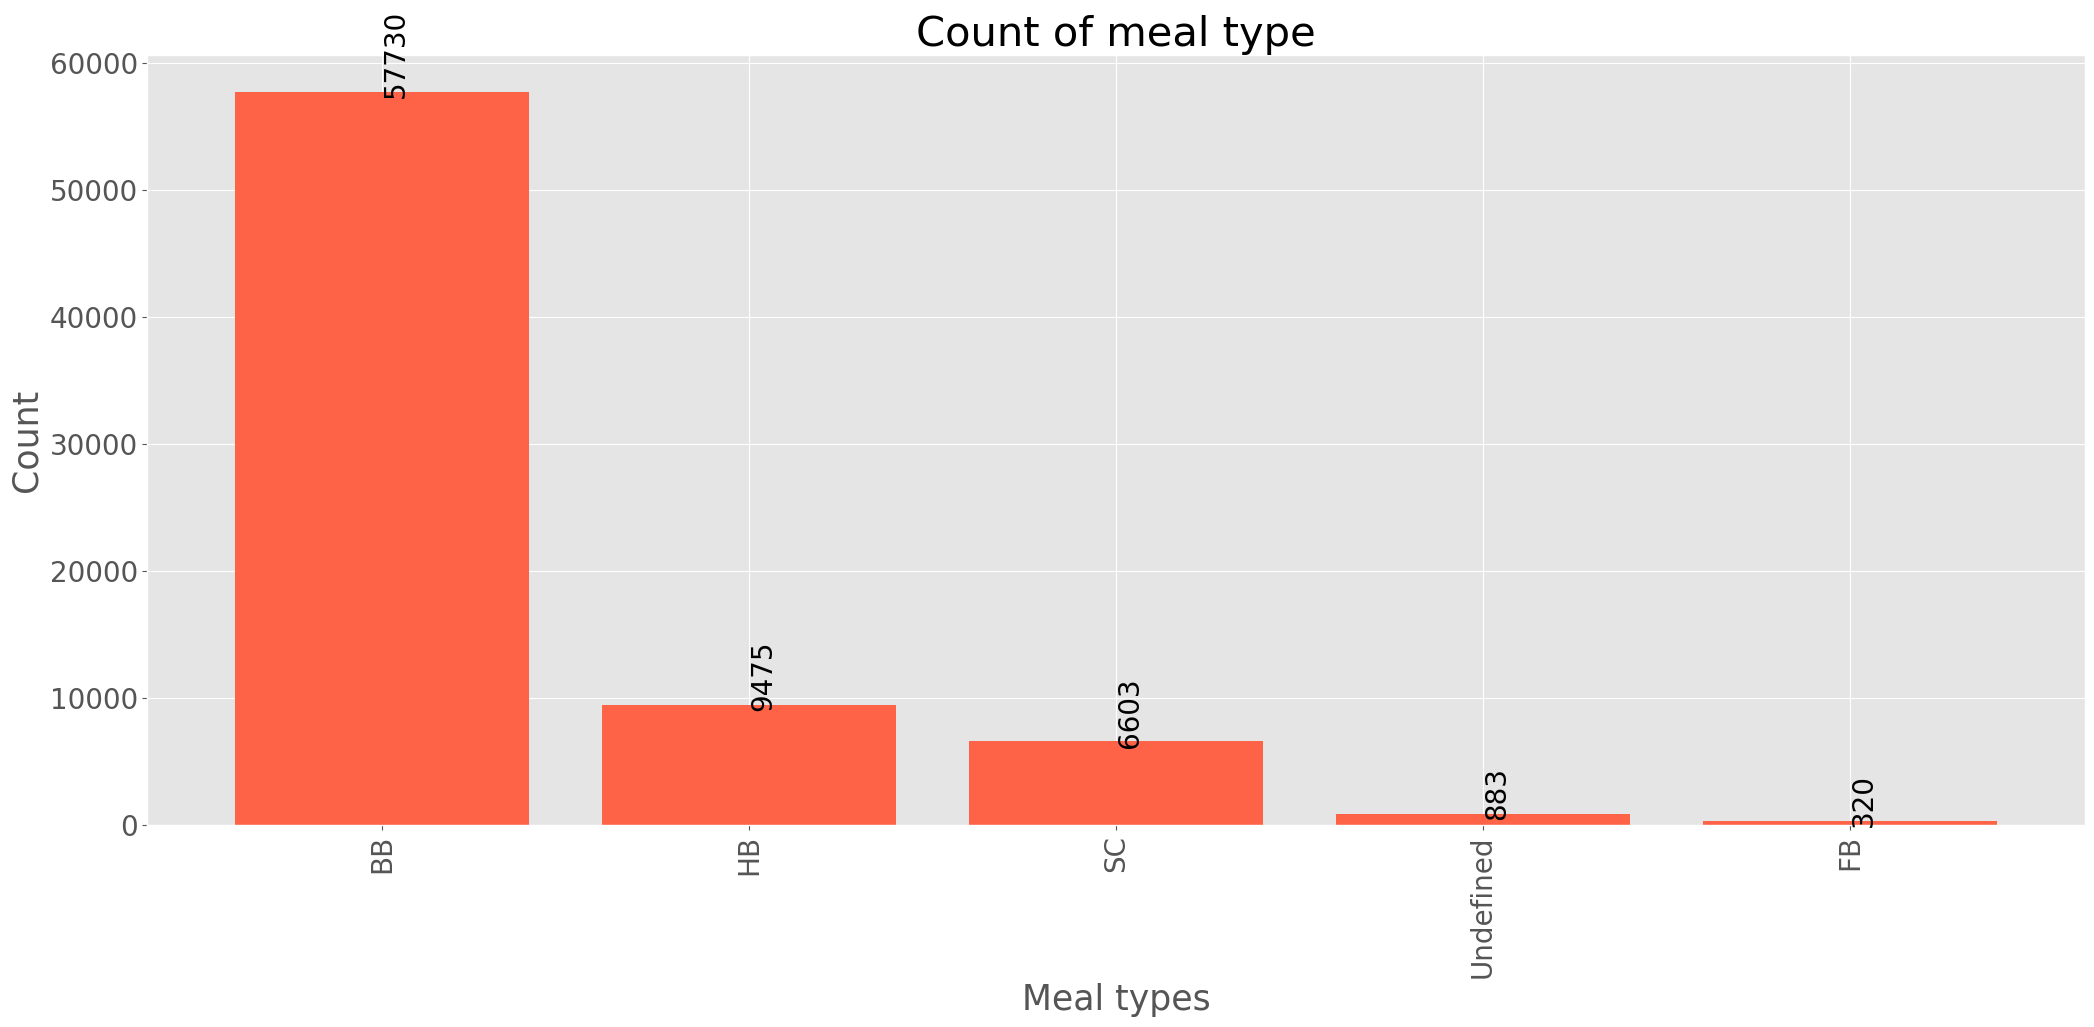

In [117]:
meals = df_meals_guests_nc_index["Meals"]
count = df_meals_guests_nc_index["Count"]

fig, ax1 = plt.subplots(1,1)

fig.set_size_inches(25,10)

def add_labels_subplot(x,y,ax):
    for i in range(len(x)):
        ax.text(i, y[i], y[i], size = 20, rotation=90)

plt.bar(meals, count, color = "tomato")
ax1.set_title("Count of meal type", size = 30)
ax1.set_xlabel("Meal types", size = 25)
ax1.set_ylabel("Count", size = 25)
#ax1.set_xticks(df_hotel_booking_nc["reserved_room_type"], fontsize = 17) not working
#ax1.set_yticks(df_hotel_booking_nc["stays_in_weekend_nights"], fontsize = 17)
ax1.tick_params(axis='x', labelsize=20, rotation = 90)
ax1.tick_params(axis='y', labelsize=20)
add_labels_subplot(meals, count, ax1)

fig.savefig("meal_types.jpg")
#plt.close()

In [118]:
#df with grouped meals for hotel resort
df_hotel_nc_meal = df_hotel_booking_nc.groupby('meal')['hotel'].value_counts().to_frame()
#df_resort_nc_meal.columns = ['Month','MonthlyPriceResort'] df_resort_nc_meal
df_hotel_nc_meal

hotel
meal      hotel              
BB        City Hotel    35570
          Resort Hotel  22160
FB        Resort Hotel    311
          City Hotel        9
HB        Resort Hotel   5499
          City Hotel     3976
SC        City Hotel     6529
          Resort Hotel     74
Undefined Resort Hotel    883

In [119]:
df_hotel_nc_meal.columns = ['Nr of preferences']
df_hotel_nc_meal.index.name = 'meal_type'
df_hotel_nc_meal.reset_index()

meal         hotel  Nr of preferences
0         BB    City Hotel              35570
1         BB  Resort Hotel              22160
2         FB  Resort Hotel                311
3         FB    City Hotel                  9
4         HB  Resort Hotel               5499
5         HB    City Hotel               3976
6         SC    City Hotel               6529
7         SC  Resort Hotel                 74
8  Undefined  Resort Hotel                883

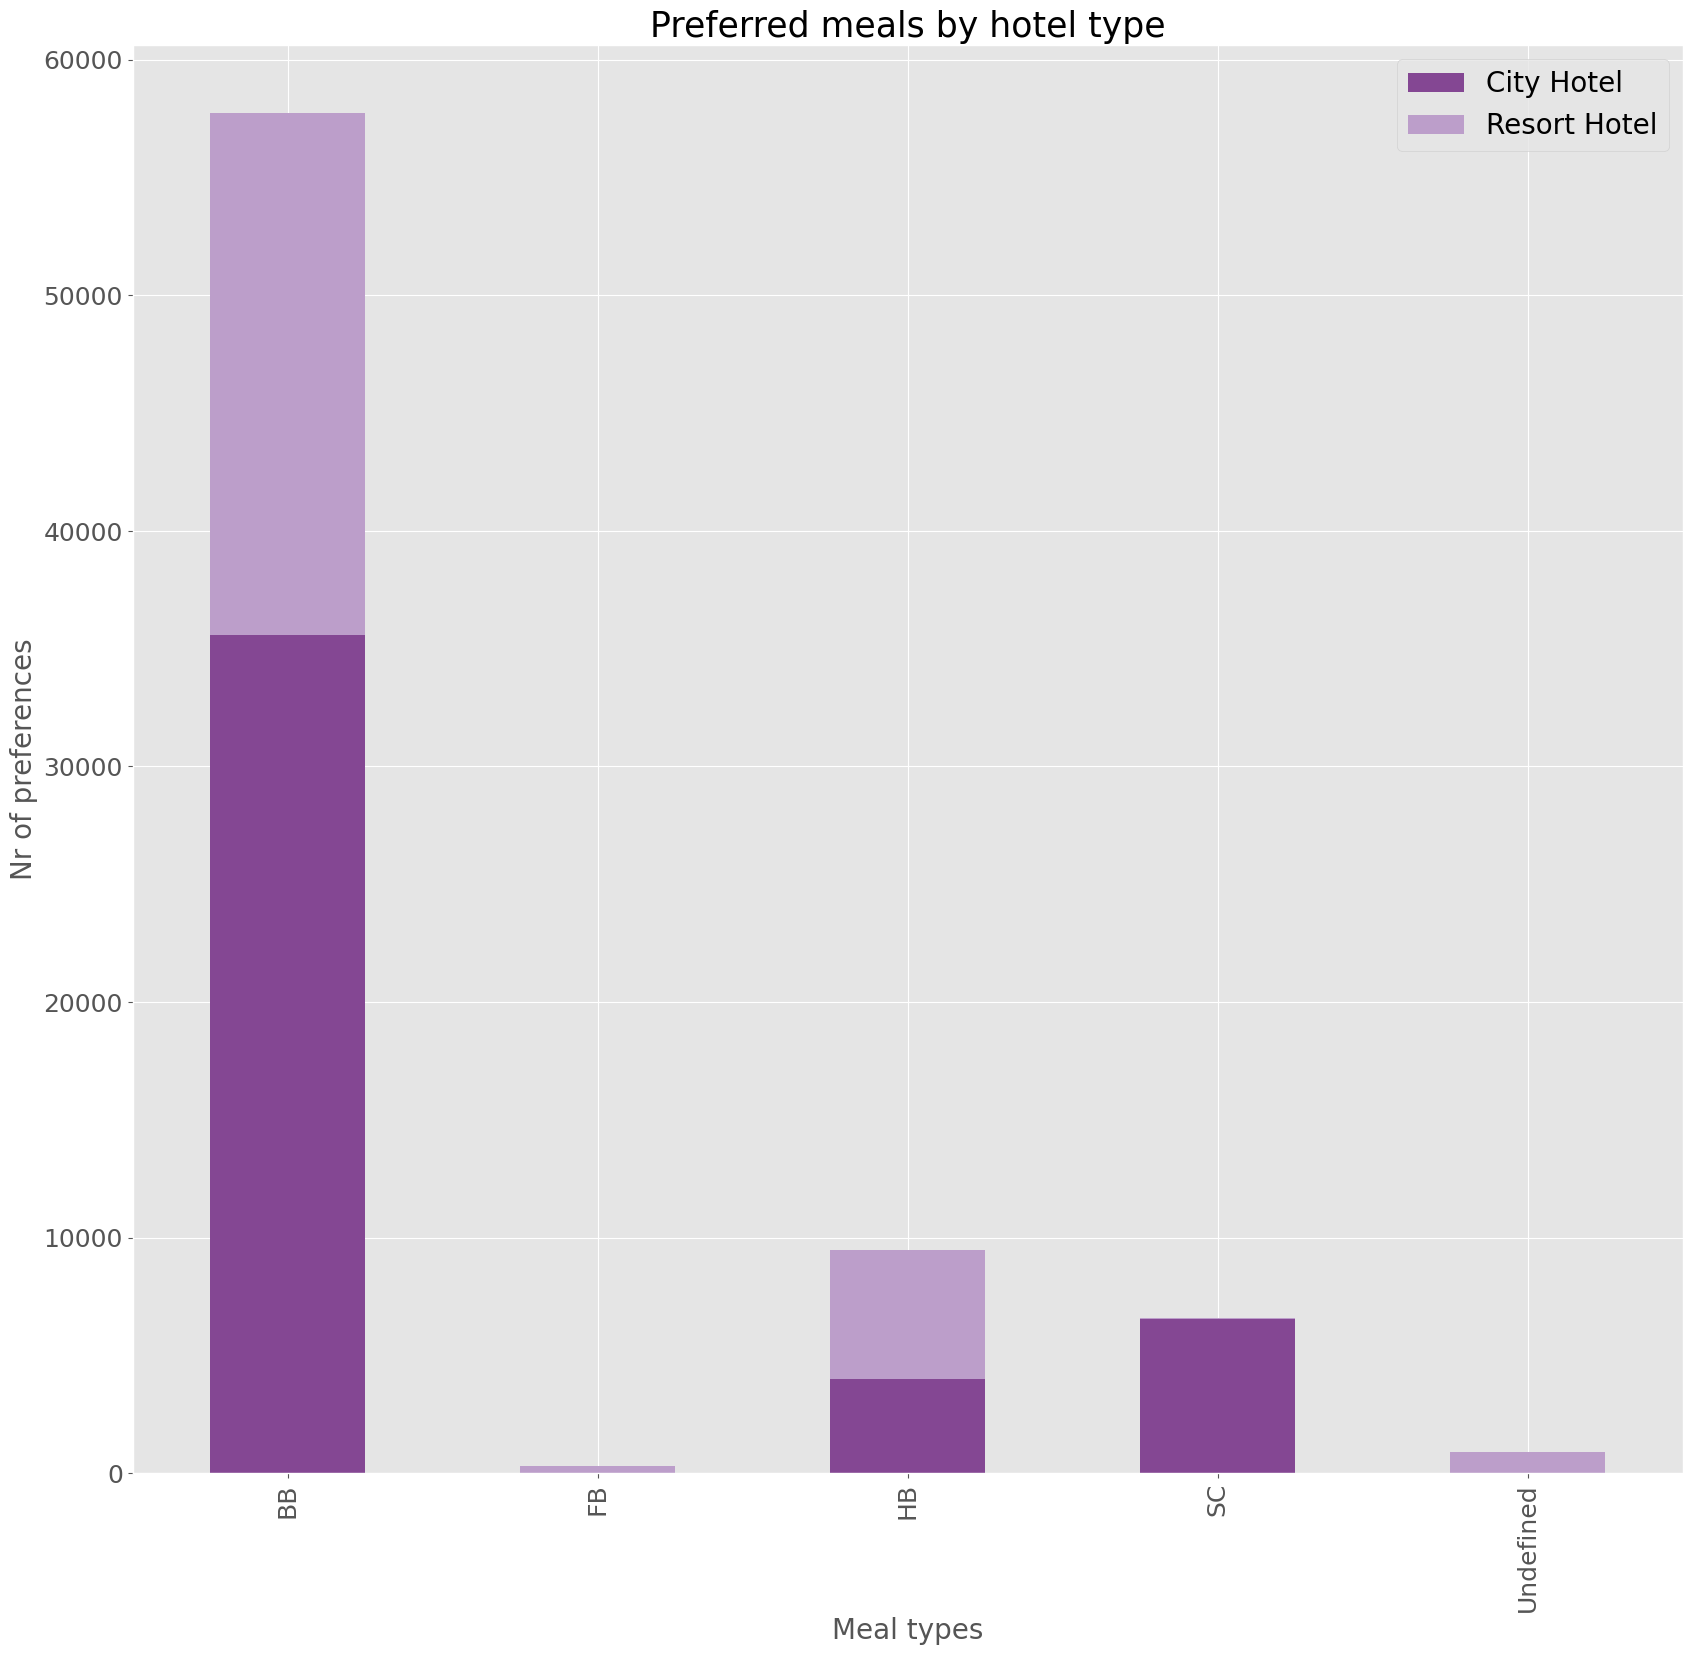

In [120]:
fig, ax = plt.subplots()
fig.set_size_inches(20,17)
plt.subplots_adjust(top=0.95)

df_hotel_nc_meal.sort_index().unstack().plot(kind = 'bar',
                                             stacked = True,
                                             ax = ax)
ax.set_title("Preferred meals by hotel type", size = 25)
ax.set_xlabel("Meal types", size=20)
ax.set_ylabel("Nr of preferences", size=20)
ax.tick_params(axis='x', labelsize=18, rotation = 90)
ax.tick_params(axis='y', labelsize=18)
mpl.rcParams['legend.fontsize'] = 20
ax.legend(labels =['City Hotel', 'Resort Hotel'])

fig.savefig("meals_by_hotel.jpg")
#plt.close()

Preferred meal types for the **Resort** hotel only.

In [122]:
df_resort_nc_meal = df_hotel_booking_nc[df_hotel_booking_nc['hotel']=='Resort Hotel'].groupby('meal')['hotel'].value_counts().to_frame()
df_resort_nc_meal

hotel
meal      hotel              
BB        Resort Hotel  22160
FB        Resort Hotel    311
HB        Resort Hotel   5499
SC        Resort Hotel     74
Undefined Resort Hotel    883

In [123]:
df_resort_nc_meal.columns = ['Nr of preferences']

In [124]:
df_resort_nc_meal.index.name = 'meal_type'
df_resort_nc_meal.reset_index()

meal         hotel  Nr of preferences
0         BB  Resort Hotel              22160
1         FB  Resort Hotel                311
2         HB  Resort Hotel               5499
3         SC  Resort Hotel                 74
4  Undefined  Resort Hotel                883

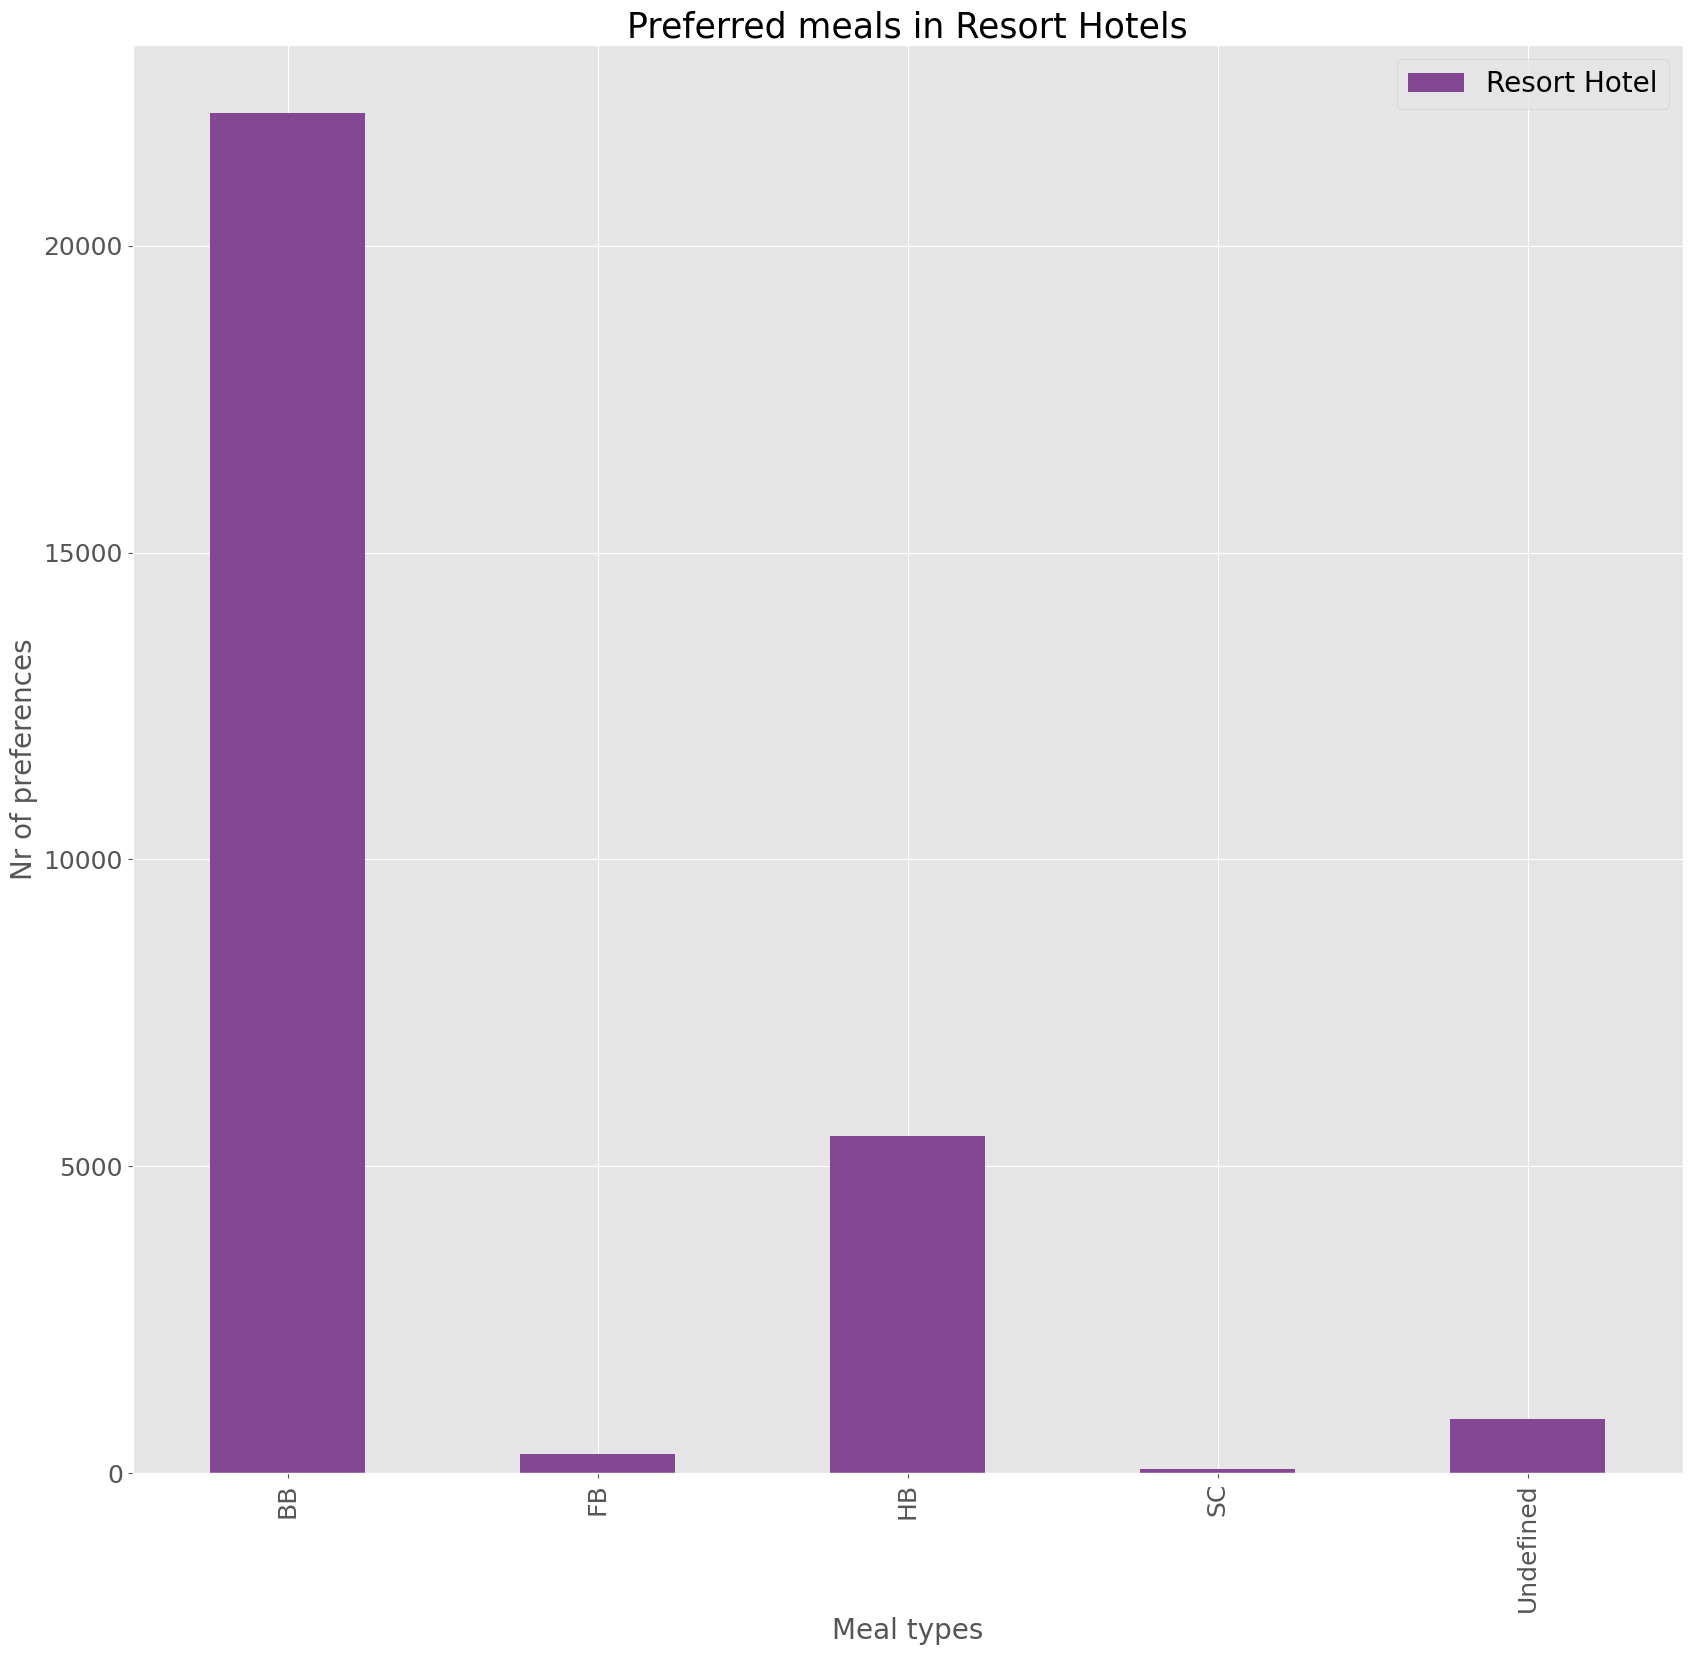

In [125]:
fig, ax = plt.subplots()
fig.set_size_inches(20,17)
plt.subplots_adjust(top=0.95)

df_resort_nc_meal.sort_index().unstack().plot(kind = 'bar',
                                             stacked = True,
                                             ax = ax)
ax.set_title("Preferred meals in Resort Hotels", size = 25)
ax.set_xlabel("Meal types", size=20)
ax.set_ylabel("Nr of preferences", size=20)
ax.tick_params(axis='x', labelsize=18, rotation = 90)
ax.tick_params(axis='y', labelsize=18)
mpl.rcParams['legend.fontsize'] = 20
ax.legend(labels =['Resort Hotel'])
#plt.close()

Preferred meal types for the **City** hotel only.

In [126]:
df_city_nc_meal = df_hotel_booking_nc[df_hotel_booking_nc['hotel']=='City Hotel'].groupby('meal')['hotel'].value_counts().to_frame()
df_city_nc_meal

hotel
meal hotel            
BB   City Hotel  35570
FB   City Hotel      9
HB   City Hotel   3976
SC   City Hotel   6529

In [127]:
df_city_nc_meal.columns = ['Nr of preferences']

In [128]:
df_city_nc_meal.index.name = 'meal_type'
df_city_nc_meal.reset_index()

meal       hotel  Nr of preferences
0   BB  City Hotel              35570
1   FB  City Hotel                  9
2   HB  City Hotel               3976
3   SC  City Hotel               6529

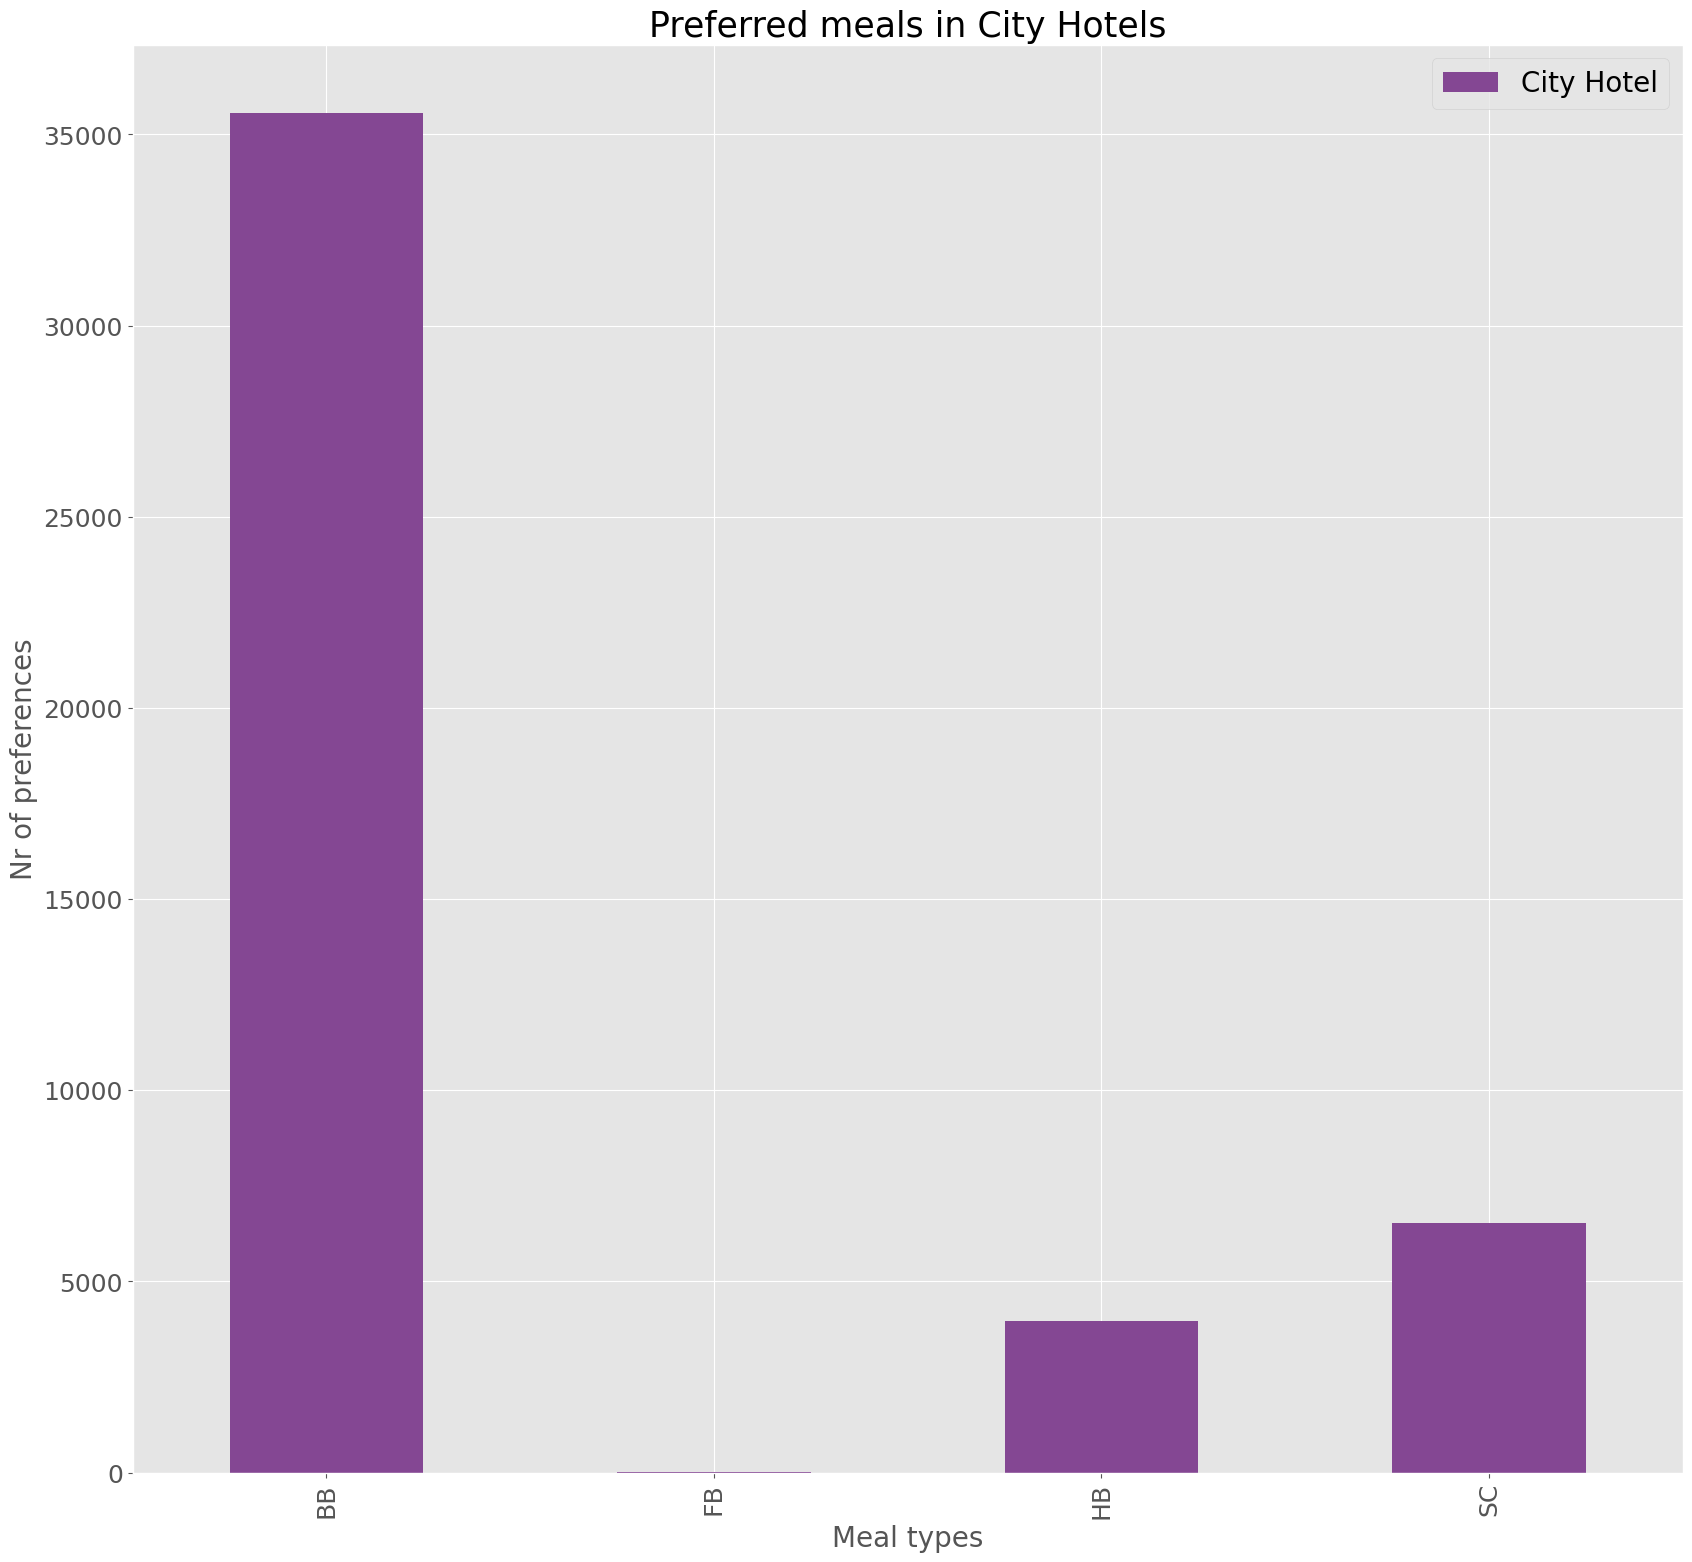

In [129]:
fig, ax = plt.subplots()
fig.set_size_inches(20,17)
plt.subplots_adjust(top=0.95)

df_city_nc_meal.sort_index().unstack().plot(kind = 'bar',
                                             stacked = True,
                                             ax = ax)
ax.set_title("Preferred meals in City Hotels", size = 25)
ax.set_xlabel("Meal types", size=20)
ax.set_ylabel("Nr of preferences", size=20)
ax.tick_params(axis='x', labelsize=18, rotation = 90)
ax.tick_params(axis='y', labelsize=18)
mpl.rcParams['legend.fontsize'] = 20
ax.legend(labels =['City Hotel'])
#plt.close()

In [130]:
#df with grouped meals for hotel and room types
df_hotel_room_nc_meal = df_hotel_booking_nc.groupby('meal')['hotel','reserved_room_type'].value_counts().to_frame()
#df_resort_nc_meal.columns = ['Month','MonthlyPriceResort'] df_resort_nc_meal
df_hotel_room_nc_meal

C:\Users\elisa\AppData\Local\Temp\ipykernel_18104\1989497638.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



0
meal      hotel        reserved_room_type       
BB        City Hotel   A                   25469
          Resort Hotel A                   13176
          City Hotel   D                    7132
          Resort Hotel D                    4088
                       E                    2658
          City Hotel   F                     998
                       E                     921
          Resort Hotel G                     785
                       F                     730
          City Hotel   B                     707
          Resort Hotel C                     428
          City Hotel   G                     338
          Resort Hotel H                     288
          City Hotel   C                       5
          Resort Hotel L                       4
                       B                       3
FB        Resort Hotel A                     193
                       D                      56
                       E                      30
                       C                      17
                       F                      12
          City Hotel   G                       5
          Resort Hotel H                       3
          City Hotel   A                       2
                       D                       2
HB        City Hotel   A                    3362
          Resort Hotel A                    2849
                       D                    1259
                       E                     839
          City Hotel   D                     403
          Resort Hotel G                     172
                       F                     167
                       C                     148
          City Hotel   E                     104
                       F                      67
          Resort Hotel H                      65
          City Hotel   B                      20
                       G                      19
                       C                       1
SC        City Hotel   A                    6408
                       D                      64
          Resort Hotel A                      47
          City Hotel   F                      23
                       B                      18
                       E                      13
          Resort Hotel D                      10
                       E                       8
                       F                       5
                       C                       2
                       G                       2
          City Hotel   C                       2
                       G                       1
Undefined Resort Hotel A                     742
                       D                      64
                       E                      38
                       C                      20
                       F                      12
                       G                       7

In [131]:
df_hotel_room_nc_meal.columns = ['Nr of preferences']
df_hotel_room_nc_meal.index.name = 'meal_type'
df_hotel_room_nc_meal.reset_index()

meal         hotel reserved_room_type  Nr of preferences
0          BB    City Hotel                  A              25469
1          BB  Resort Hotel                  A              13176
2          BB    City Hotel                  D               7132
3          BB  Resort Hotel                  D               4088
4          BB  Resort Hotel                  E               2658
5          BB    City Hotel                  F                998
6          BB    City Hotel                  E                921
7          BB  Resort Hotel                  G                785
8          BB  Resort Hotel                  F                730
9          BB    City Hotel                  B                707
10         BB  Resort Hotel                  C                428
11         BB    City Hotel                  G                338
12         BB  Resort Hotel                  H                288
13         BB    City Hotel                  C                  5
14         BB  Resort Hotel                  L                  4
15         BB  Resort Hotel                  B                  3
16         FB  Resort Hotel                  A                193
17         FB  Resort Hotel                  D                 56
18         FB  Resort Hotel                  E                 30
19         FB  Resort Hotel                  C                 17
20         FB  Resort Hotel                  F                 12
21         FB    City Hotel                  G                  5
22         FB  Resort Hotel                  H                  3
23         FB    City Hotel                  A                  2
24         FB    City Hotel                  D                  2
25         HB    City Hotel                  A               3362
26         HB  Resort Hotel                  A               2849
27         HB  Resort Hotel                  D               1259
28         HB  Resort Hotel                  E                839
29         HB    City Hotel                  D                403
30         HB  Resort Hotel                  G                172
31         HB  Resort Hotel                  F                167
32         HB  Resort Hotel                  C                148
33         HB    City Hotel                  E                104
34         HB    City Hotel                  F                 67
35         HB  Resort Hotel                  H                 65
36         HB    City Hotel                  B                 20
37         HB    City Hotel                  G                 19
38         HB    City Hotel                  C                  1
39         SC    City Hotel                  A               6408
40         SC    City Hotel                  D                 64
41         SC  Resort Hotel                  A                 47
42         SC    City Hotel                  F                 23
43         SC    City Hotel                  B                 18
44         SC    City Hotel                  E                 13
45         SC  Resort Hotel                  D                 10
46         SC  Resort Hotel                  E                  8
47         SC  Resort Hotel                  F                  5
48         SC  Resort Hotel                  C                  2
49         SC  Resort Hotel                  G                  2
50         SC    City Hotel                  C                  2
51         SC    City Hotel                  G                  1
52  Undefined  Resort Hotel                  A                742
53  Undefined  Resort Hotel                  D                 64
54  Undefined  Resort Hotel                  E                 38
55  Undefined  Resort Hotel                  C                 20
56  Undefined  Resort Hotel                  F                 12
57  Undefined  Resort Hotel                  G                  7

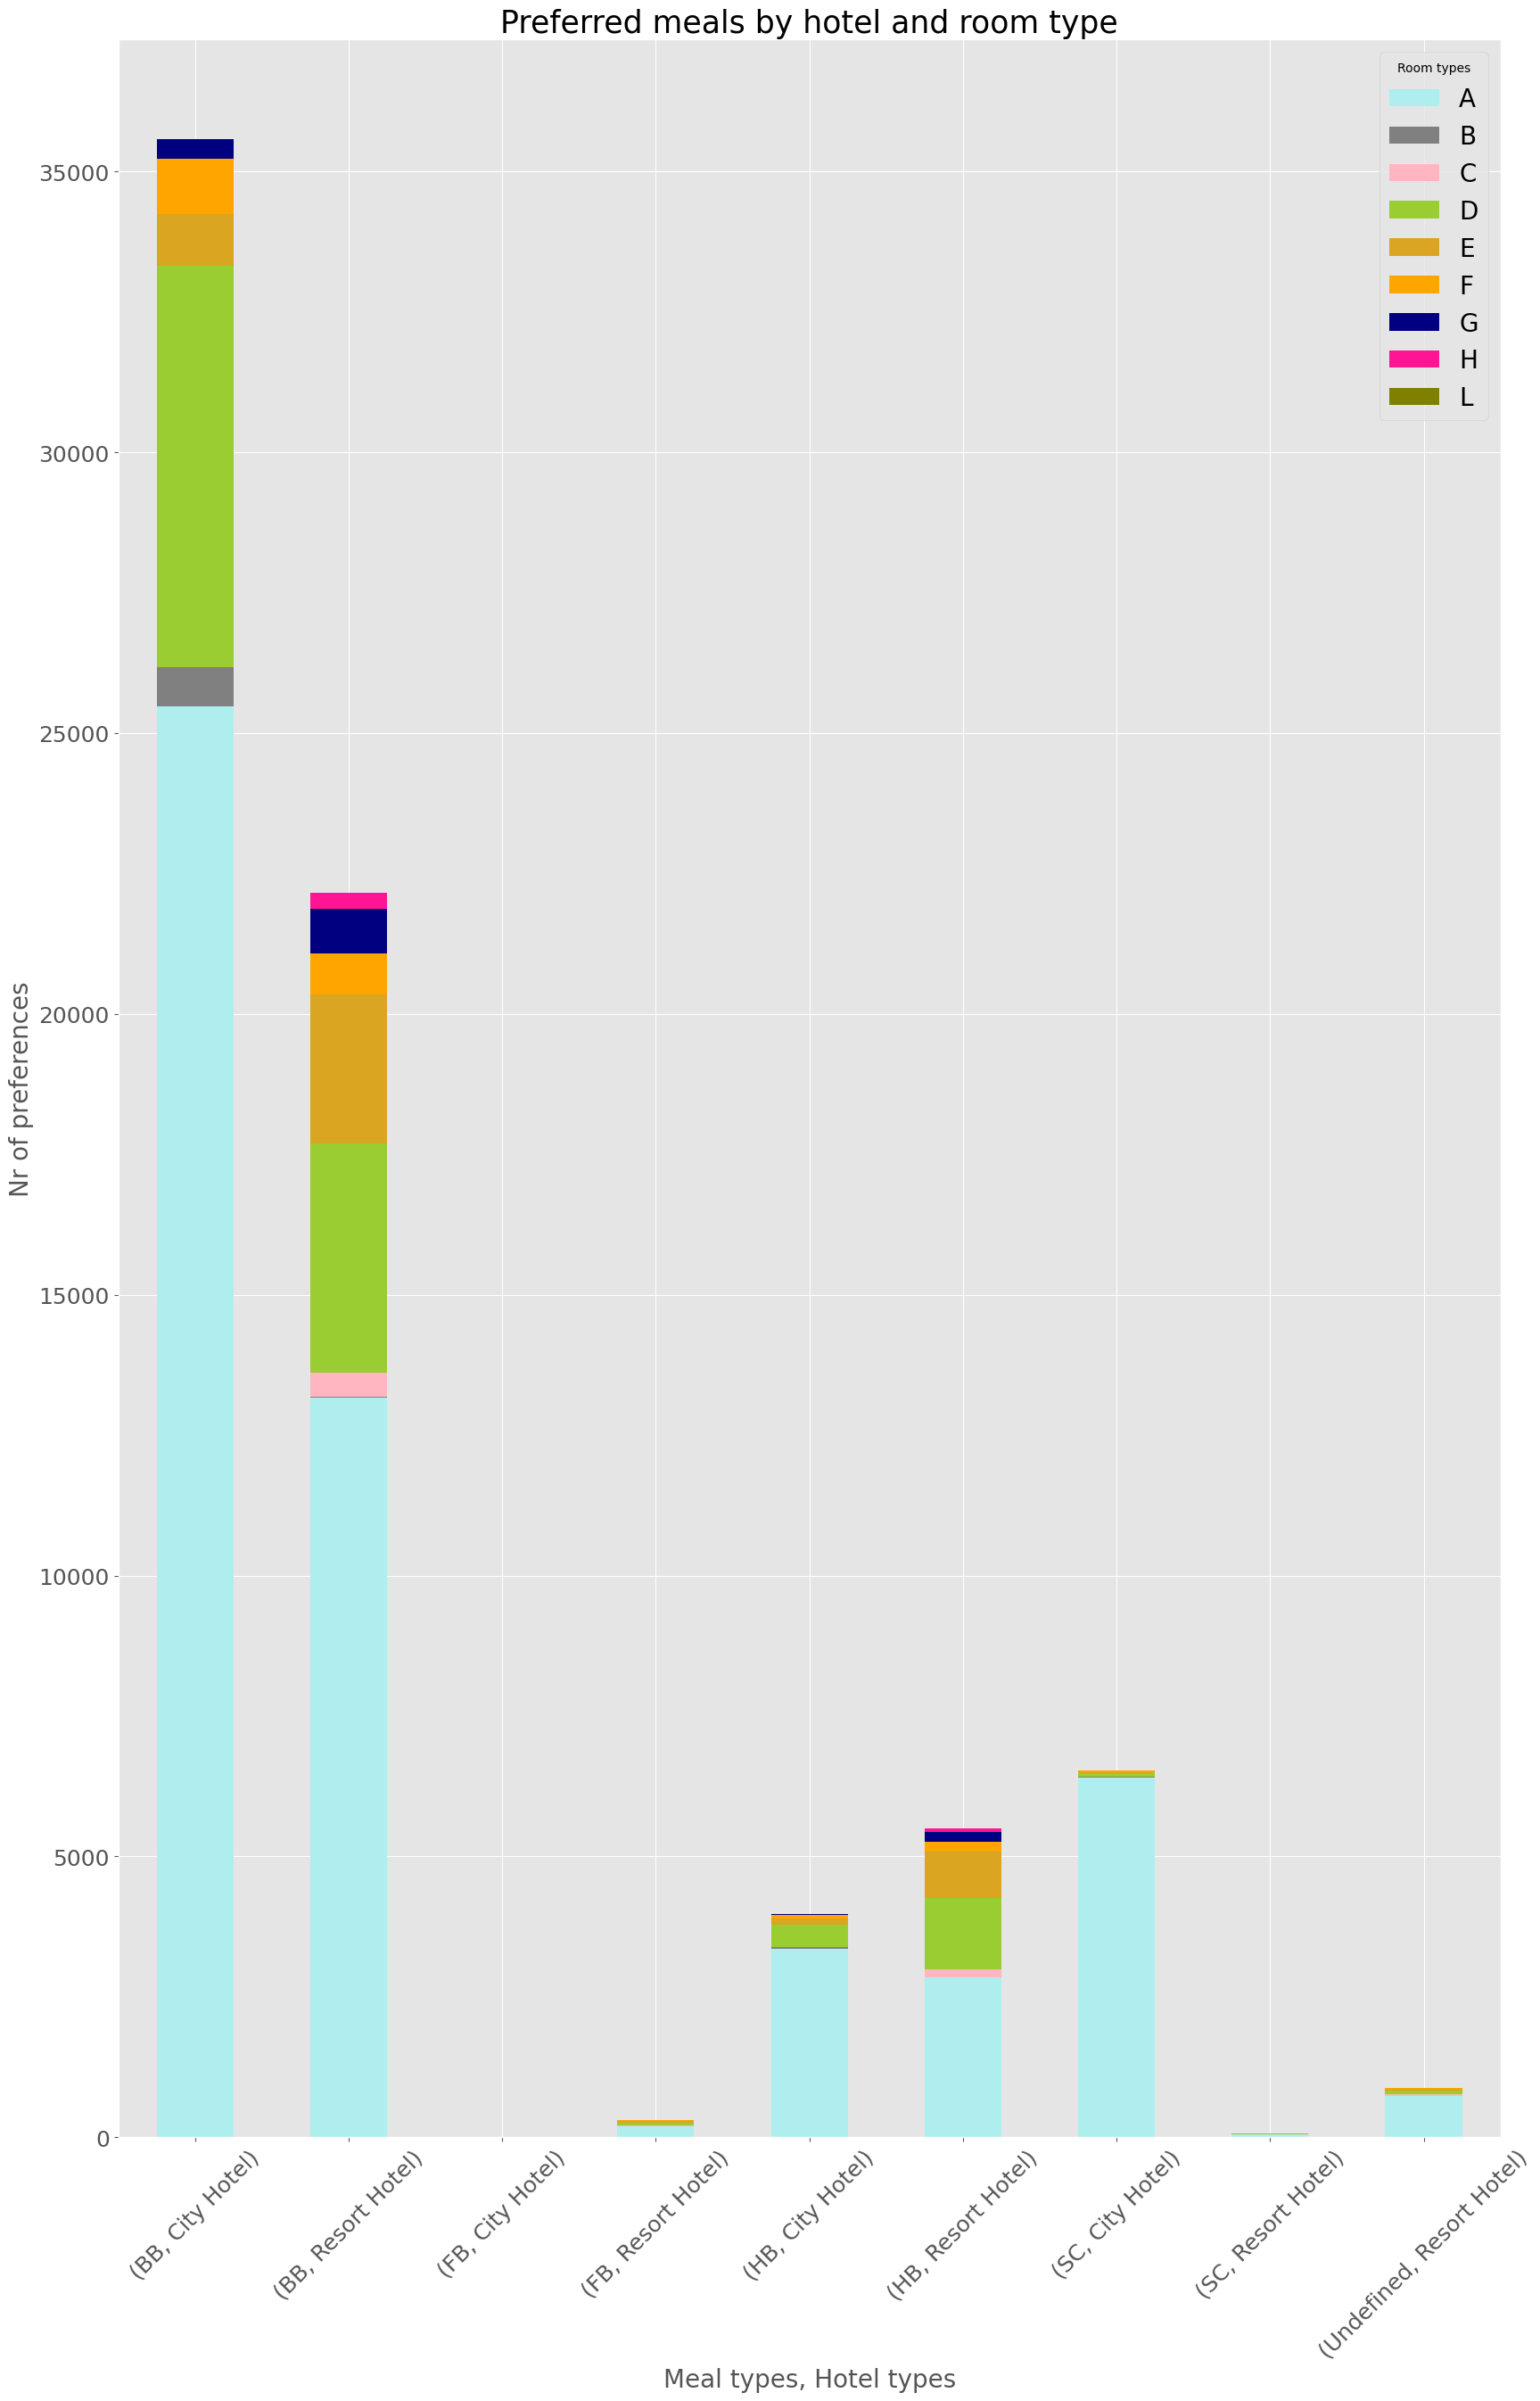

In [132]:
fig, ax = plt.subplots()
fig.set_size_inches(20,28)
plt.subplots_adjust(top=0.95)
plt.get_cmap("Set3")

colors = ["paleturquoise", "grey", "lightpink", "yellowgreen", "goldenrod", "orange", "navy", "deeppink", "olive"]

df_hotel_room_nc_meal.sort_index().unstack().plot(kind = 'bar',
                                                 stacked = True,
                                                 ax = ax,
                                                 color = colors)
ax.set_title("Preferred meals by hotel and room type", size = 25)
ax.set_xlabel("Meal types, Hotel types", size=20)
ax.set_ylabel("Nr of preferences", size=20)
ax.tick_params(axis='x', labelsize=18, rotation = 45)
ax.tick_params(axis='y', labelsize=18)
mpl.rcParams['legend.fontsize'] = 20
ax.legend(title = "Room types", labels =['A', 'B', 'C','D','E','F','G','H','L'])

fig.savefig("meals_by_hotel_room.jpg")
#plt.close()

### FOR DASHBOARD

In [133]:
df_meal_room = df_hotel_booking_nc.groupby('meal')['reserved_room_type'].value_counts().to_frame()
df_meal_room

reserved_room_type
meal      reserved_room_type                    
BB        A                                38645
          D                                11220
          E                                 3579
          F                                 1728
          G                                 1123
          B                                  710
          C                                  433
          H                                  288
          L                                    4
FB        A                                  195
          D                                   58
          E                                   30
          C                                   17
          F                                   12
          G                                    5
          H                                    3
HB        A                                 6211
          D                                 1662
          E                                  943
          F                                  234
          G                                  191
          C                                  149
          H                                   65
          B                                   20
SC        A                                 6455
          D                                   74
          F                                   28
          E                                   21
          B                                   18
          C                                    4
          G                                    3
Undefined A                                  742
          D                                   64
          E                                   38
          C                                   20
          F                                   12
          G                                    7

In [134]:
df_meal_room.columns = ['Nr of preferences']
df_meal_room.index.name = 'meal_type'
df_meal_room = df_meal_room.reset_index()
df_meal_room.columns = ['Meal', 'Room type', 'Nr of preferences']
df_meal_room

Meal Room type  Nr of preferences
0          BB         A              38645
1          BB         D              11220
2          BB         E               3579
3          BB         F               1728
4          BB         G               1123
5          BB         B                710
6          BB         C                433
7          BB         H                288
8          BB         L                  4
9          FB         A                195
10         FB         D                 58
11         FB         E                 30
12         FB         C                 17
13         FB         F                 12
14         FB         G                  5
15         FB         H                  3
16         HB         A               6211
17         HB         D               1662
18         HB         E                943
19         HB         F                234
20         HB         G                191
21         HB         C                149
22         HB         H                 65
23         HB         B                 20
24         SC         A               6455
25         SC         D                 74
26         SC         F                 28
27         SC         E                 21
28         SC         B                 18
29         SC         C                  4
30         SC         G                  3
31  Undefined         A                742
32  Undefined         D                 64
33  Undefined         E                 38
34  Undefined         C                 20
35  Undefined         F                 12
36  Undefined         G                  7

In [140]:
bar_meal_room = px.bar(df_meal_room,
                       x = 'Meal',
                       y = 'Nr of preferences',
                       color = 'Room type',
                       height = 400,
                       title = 'Preferred meal type per room type')
bar_meal_room.update_layout({'plot_bgcolor': '#01386a',
                                  'paper_bgcolor': '#01386a'},
                            font_color='snow', #"#b7c9e2",
                            title_font_size = 25)
bar_meal_room.show()

The preferred meal type is BB both in City and Resort hotels, and the most desired meal in the room type A and D.
This is followed by the meal type SC but only in the City hotel and again for the room type A. This meal type has very few preferences in the Resort hotel type.
This is followed by the meal type HB in City and Resort hotels, and mainly in room type A.
The meal type FB is absent in the City hotel, and is poorly requested in the Resort hotel.

<a id = 'yearly_price'><a/>
## 3.2 Price analysis
### How does price of hotel vary across the year?
[Top](#top)

The goal of this section is to analyse the fluctuation of price using:
- lineplot to show the mean monthly price across the year, for each year, for all the rooms
- boxplot to distinguish the price across the room type, including all years
- .groupby() function to calculate the mean of the price-per-night for each month

In [69]:
df_hotel_booking.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    0.0     0.0                    0     Transient   0.0   
1    0.0     0.0                    0     Transient   0.0   
2    0.0     0.0                    0     Transient  75.0   
3  304.0     0.0                    0     Transient  75.0   
4  240.0     0.0                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0                7/1/2015  
1                7/1/2015  
2                7/2/2015  
3                7/2/2015  
4                7/3/2015  

[5 rows x 32 columns]

Filter the dataset with all the bookings to those rows with only checked reservations.

In [70]:
df_hotel_booking_nc = df_hotel_booking[df_hotel_booking['is_canceled']==0]
df_hotel_booking_nc['is_canceled'].nunique() #only 0, aka only checked reservations

1

<a id = 'priceperroom'><a/>
### 3.2.1 Variation of price per room type
[Top](#top)

Text(0, 0.5, 'Price €')

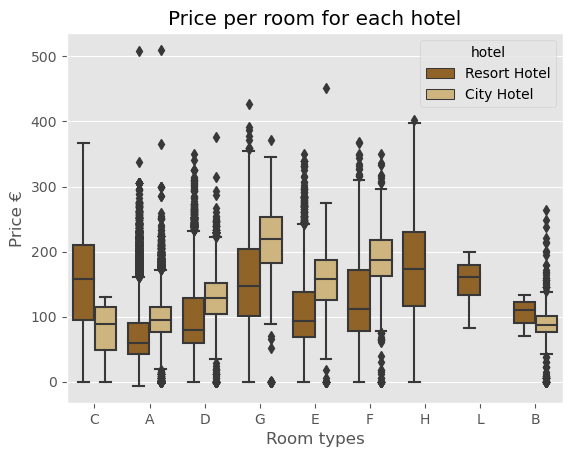

In [89]:
sns.set_palette("BrBG")
sns.boxplot(x="reserved_room_type",
            y="adr",
            data=df_hotel_booking_nc,
            hue="hotel")
plt.title("Price per room for each hotel")
plt.xlabel("Room types")
plt.ylabel("Price €")
#plt.close()

From the previous boxplot, it possible to notice how in both hotel types the cheapest room are room type A and B.
Concerning the hotel type Resort, the most expensive rooms are the types C, G and H, with rather similar prices.
Concerning the hotel type City, the most expensive rooms are the types G, followed by F and then E.
The room types H and L are not available in the City hotel type.

Create facet grid plots showing price fluctuations with boxplot of ecah room, for each year.

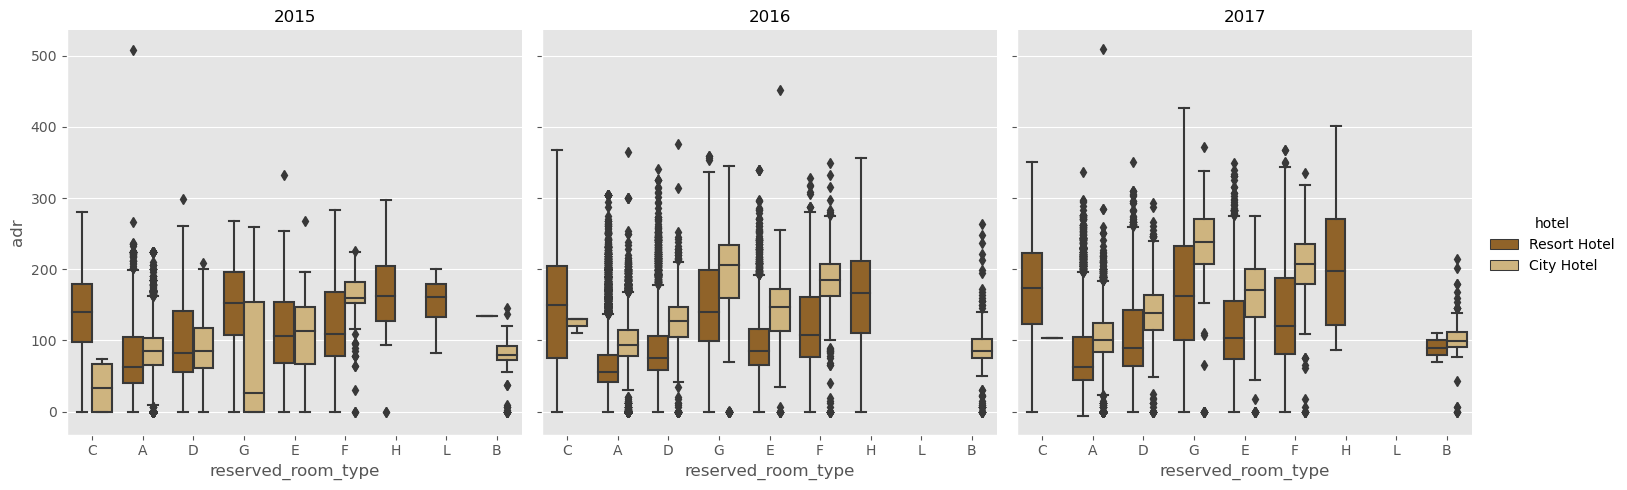

In [90]:
p = sns.catplot(data=df_hotel_booking_nc,
            x='reserved_room_type',
            y='adr',
            col='arrival_date_year',
            kind='box',
            col_wrap=3,
            hue='hotel'
)
p.set_titles("{col_name}")

Create facet grid plots showing price fluctuations with boxplot of ecah room, for each year and for each month.

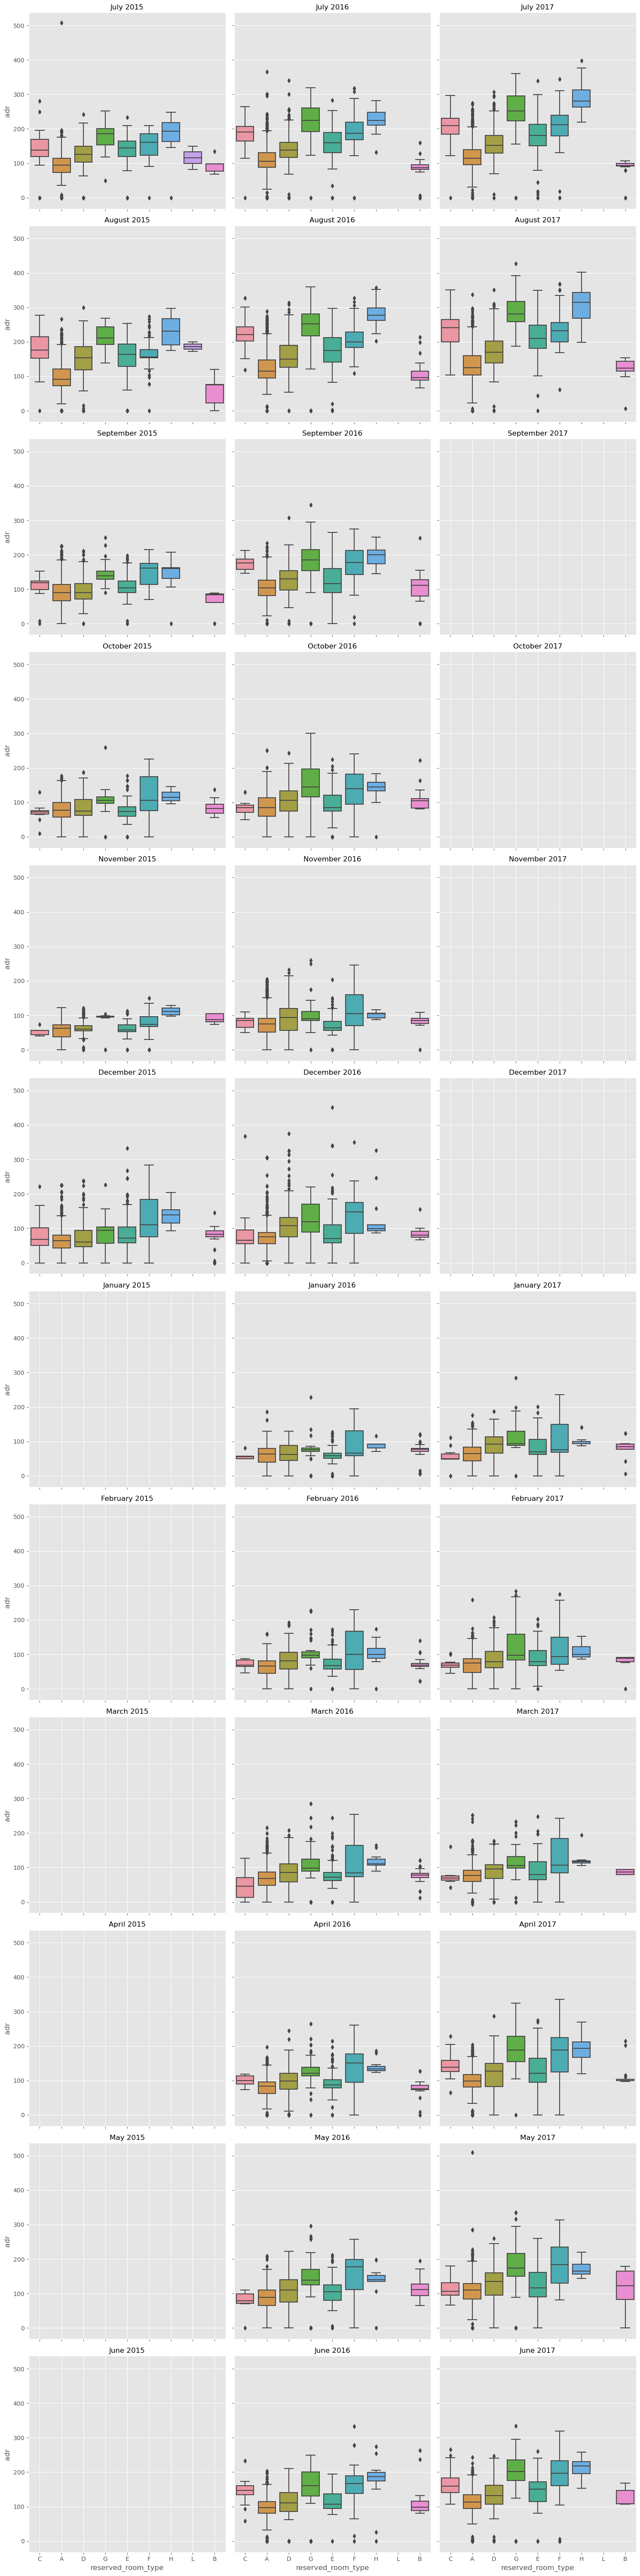

In [91]:
p2 = sns.catplot(data=df_hotel_booking_nc,
            x='reserved_room_type',
            y='adr',
            row='arrival_date_month',
            col='arrival_date_year',
            kind='box'
)
p2.set_titles("{row_name} {col_name}")

<a id = 'monthly_price_year'><a/>
### 3.2.2 Mean monthly price for each year
[Top](#top)

Check the unique values of the "arrival_date_year".

In [71]:
df_hotel_booking_nc['arrival_date_year'].value_counts().to_frame()

arrival_date_year
2016              36299
2017              24886
2015              13826

In [72]:
arrival_year = list(df_hotel_booking_nc['arrival_date_year'].unique())
arrival_year

[2015, 2016, 2017]

Create new df, with bookings only from one year (e.g. one dataframe for the bookings of 2015, one for 2016, one for 2017)

Create a function to filter the whole database, based on the arrival year.

In [73]:
"""
df_hotel_booking_nc_year: dataframe filtered based on the year, obtained with the function 'df_hotel_booking_year' (see above)
year: int desired year
"""

def df_hotel_booking_year(df_hotel_booking_nc, year):
    df_hotel_booking_nc_year = df_hotel_booking_nc[df_hotel_booking_nc['arrival_date_year']==year]
    return df_hotel_booking_nc_year

In [74]:
df_hotel_booking_nc_2015 = df_hotel_booking_year(df_hotel_booking_nc, arrival_year[0])
df_hotel_booking_nc_2015['arrival_date_year'].nunique()

1

In [75]:
df_hotel_booking_nc_2016 = df_hotel_booking_year(df_hotel_booking_nc, arrival_year[1])
df_hotel_booking_nc_2016['arrival_date_year'].nunique()

1

In [76]:
df_hotel_booking_nc_2017 = df_hotel_booking_year(df_hotel_booking_nc, arrival_year[2])
df_hotel_booking_nc_2017['arrival_date_year'].nunique()

1

Create lists of the unique months of arrival for each year.

In [77]:
arrival_months_2015 = list(df_hotel_booking_nc_2015['arrival_date_month'].unique())
arrival_months_2016 = list(df_hotel_booking_nc_2016['arrival_date_month'].unique())
arrival_months_2017 = list(df_hotel_booking_nc_2017['arrival_date_month'].unique())

In [78]:
#def arrival_months(df_hotel_booking_nc_2015):
#    arrival_months_2015 = list(df_hotel_booking_nc_2015['arrival_date_month'].unique())

Create a function to calculate the monthly price mean per year.

In [79]:
"""
arrival_months_year: list of unique months per each year, created from the df df_hotel_booking_nc_201x['arrival_date_month'].unique()
df_hotel_booking_nc_year: dataframe filtered based on the year, obtained with the function '' (see above)
year: int desired year
"""

def monthly_price_mean(arrival_months_year, df_hotel_booking_nc_year):
    monthly_price_mean = []
    for m in arrival_months_year:
        df_hotel_booking_nc_year_m = df_hotel_booking_nc_year[df_hotel_booking_nc_year['arrival_date_month']==m]
        monthly_price_mean.append(df_hotel_booking_nc_year_m['adr'].mean())
    return monthly_price_mean

In [80]:
monthly_price_mean_2015 = monthly_price_mean(arrival_months_year = arrival_months_2015,
                                             df_hotel_booking_nc_year = df_hotel_booking_nc_2015)
monthly_price_mean_2016 = monthly_price_mean(arrival_months_year = arrival_months_2016,
                                             df_hotel_booking_nc_year = df_hotel_booking_nc_2016)
monthly_price_mean_2017 = monthly_price_mean(arrival_months_year = arrival_months_2017,
                                             df_hotel_booking_nc_year = df_hotel_booking_nc_2017)

Create a function to create a new dataframe with uinque month for each arrival year, and the related mean monthly price for each year.

In [81]:
"""
arrival_months_year: list of unique months per each year, created from the df df_hotel_booking_nc_201x['arrival_date_month'].unique()
monthly_price_mean_year: list of values of monthly price mean, obtained with th function 'monthly_price_mean' (see above)
year: int desired year
"""

def df_mean_monthly_price_year(arrival_months_year, monthly_price_mean_year, year):
    df_monthly_price_mean_year = pd.DataFrame(list(zip(arrival_months_year,monthly_price_mean_year)),
                                              columns=[f"arrival_month_{year}","price_mean"])
    return df_monthly_price_mean_year

In [82]:
df_monthly_price_mean_2015 = df_mean_monthly_price_year(arrival_months_year=arrival_months_2015,
                                                        monthly_price_mean_year=monthly_price_mean_2015,
                                                        year=2015)

In [83]:
df_monthly_price_mean_2016 = df_mean_monthly_price_year(arrival_months_year=arrival_months_2016,
                                                        monthly_price_mean_year=monthly_price_mean_2016,
                                                        year=2016)

In [84]:
df_monthly_price_mean_2017 = df_mean_monthly_price_year(arrival_months_year=arrival_months_2017,
                                                        monthly_price_mean_year=monthly_price_mean_2017,
                                                        year=2017)

In [85]:
def plot_price_monthly_mean(df_monthly_price_mean_year, year):
    df_monthly_price_mean_year.plot(kind="line", x = f"arrival_month_{year}")
    plt.title(f"Monthly mean price - year {year}")
    plt.xlabel("Months")
    plt.ylabel("Price €")
    plt.close()

In [86]:
plot_price_monthly_mean(df_monthly_price_mean_year = df_monthly_price_mean_2015,
                        year = 2015)

In [87]:
plot_price_monthly_mean(df_monthly_price_mean_year = df_monthly_price_mean_2016,
                        year = 2016)

In [88]:
plot_price_monthly_mean(df_monthly_price_mean_year = df_monthly_price_mean_2017,
                        year = 2017)

In each year, the highest prices are in the month of August, increasing from the month of January, adn decreasing afterwards, with a small increase in teh month of December.

<a id = 'priceperroom2'><a/>
### 3.2.3 Mean monthly price for each year with group by function
[Top](#top)

Create two df one for each type of hotel, Resort or City hotels.

In [92]:
df_resort_nc = df_hotel_booking_nc[df_hotel_booking_nc['hotel']=='Resort Hotel']
#df_resort_nc.head()

In [93]:
df_city_nc = df_hotel_booking_nc[df_hotel_booking_nc['hotel']=='City Hotel']
#df_city_nc.head()

Calculate the mean of the price-per-night for each month, for the Resort hotel first and then for the City hotel.

In [94]:
df_resort_nc_mean_price = df_resort_nc.groupby('arrival_date_month')['adr'].mean().reset_index()
df_resort_nc_mean_price.columns = ['Month','MonthlyPriceResort']
#df_resort_nc_mean_price

In [95]:
df_city_nc_mean_price = df_city_nc.groupby('arrival_date_month')['adr'].mean().reset_index()
df_city_nc_mean_price.columns = ['Month','MonthlyPriceCity']
#df_city_nc_mean_price

In [96]:
df_hotel_booking_nc_mean_price = df_hotel_booking_nc.groupby('arrival_date_month')['adr'].mean().reset_index()
df_hotel_booking_nc_mean_price.columns = ['Month','MonthlyPriceHotel']
#df_hotel_booking_nc_mean_price

Since, they have a common column, I can merge the two df over it, in order to create a single plot with the two price fluctation over the year.

In [97]:
df_hotel_nc_mean_price = df_resort_nc_mean_price.merge(df_city_nc_mean_price, on ='Month')
df_hotel_nc_mean_price = df_hotel_nc_mean_price.merge(df_hotel_booking_nc_mean_price, on = 'Month')
#df_hotel_nc_mean_price

In [98]:
!pip install sorted-months-weekdays
!pip install sort-dataframeby-monthorweek

In [99]:
import sort_dataframeby_monthorweek as sd

In [100]:
df_hotel_nc_mean_price_o = sd.Sort_Dataframeby_Month(df_hotel_nc_mean_price, 'Month')
#df_hotel_nc_mean_price_o

Create the line plot.

In [101]:
list(df_hotel_nc_mean_price_o["Month"])

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

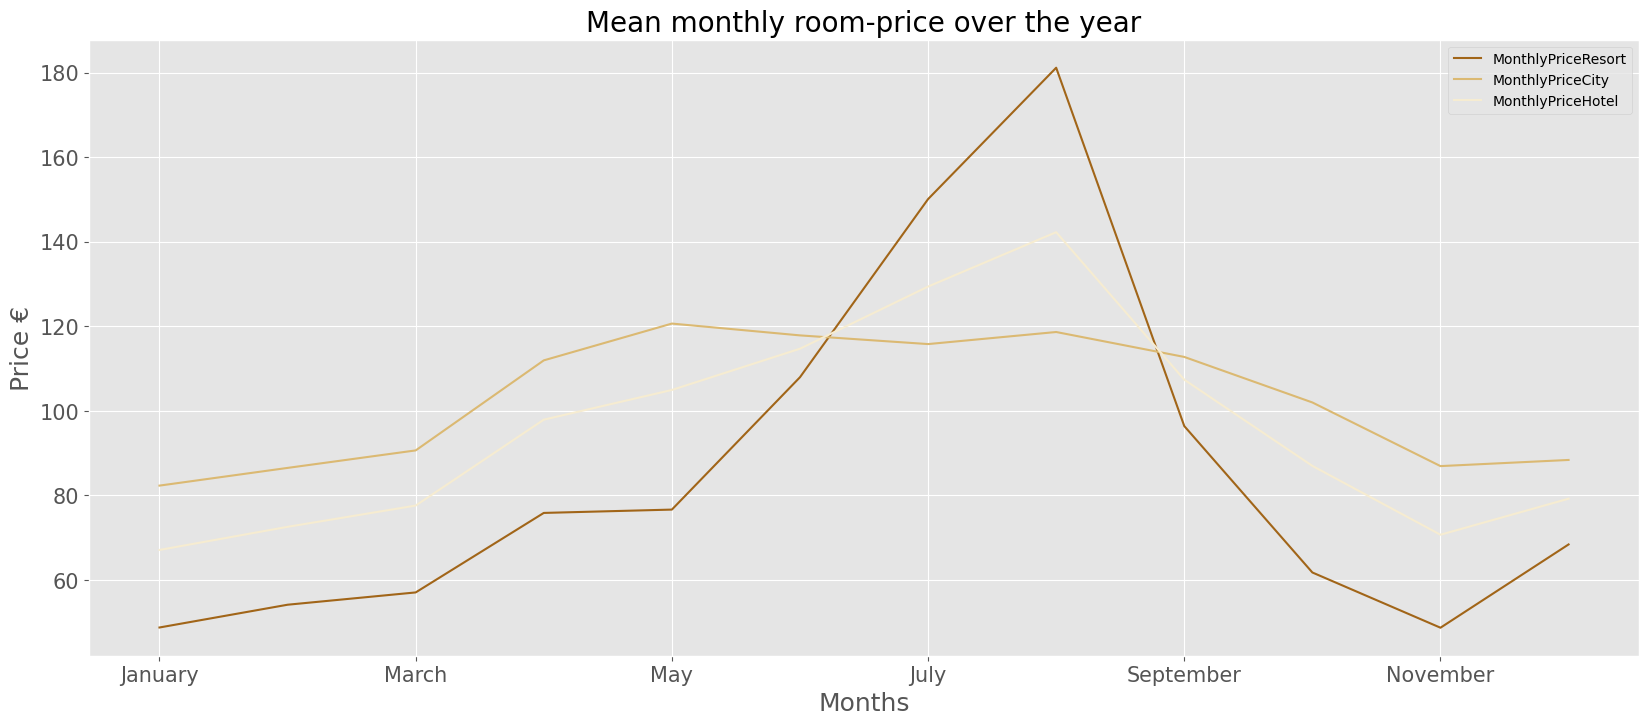

In [102]:
p3 =df_hotel_nc_mean_price_o.plot(kind="line",
                                   x="Month",
                                   figsize=(20,8))
plt.title("Mean monthly room-price over the year", size=20)
plt.xlabel("Months", size=18)
plt.ylabel("Price €", size=18)
plt.xticks(size=15)
plt.yticks(size=15)
#Month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#p3.set_xticklabels(Month)
plt.savefig("monthly_price_year.jpg")
#plt.close()

Create the same plot but using the method with subplots for a better practice.

Text(9, 170, 'Monthly Price City')

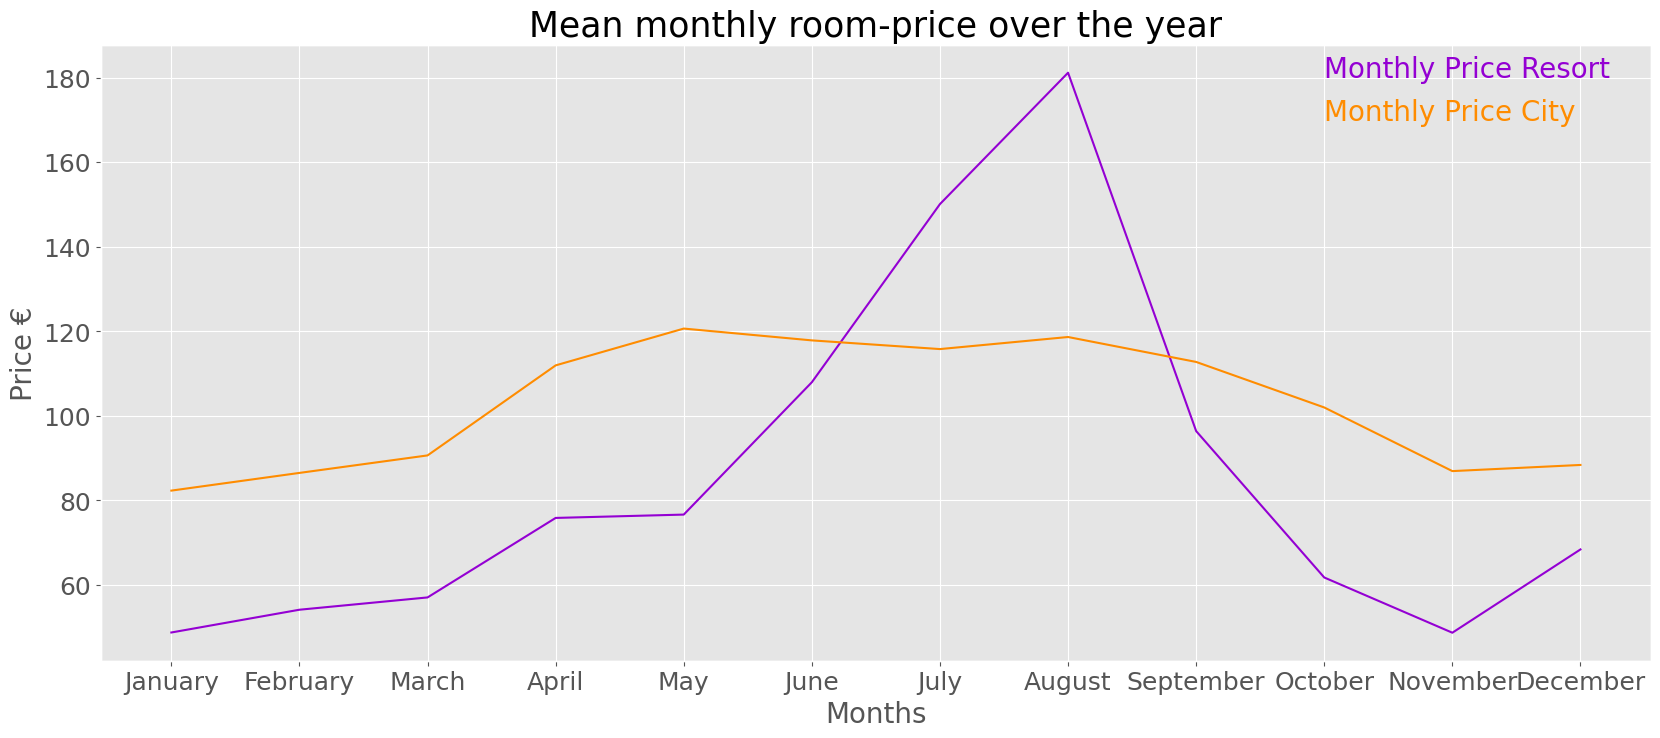

In [103]:
fig, ax = plt.subplots(1,1)

fig.set_size_inches(20,8)

ax.plot(df_hotel_nc_mean_price_o["Month"],
       df_hotel_nc_mean_price_o["MonthlyPriceResort"],
       color="darkviolet")
ax.set_title("Mean monthly room-price over the year", size=25)
ax.set_xlabel("Months", size=20)
ax.set_ylabel("Price €", size=20)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.text(x=9, y=180, s="Monthly Price Resort", color="darkviolet", fontsize=20)

ax2 = ax.twiny()
ax2.plot(df_hotel_nc_mean_price_o["Month"],
       df_hotel_nc_mean_price_o["MonthlyPriceCity"],
        color="darkorange")
ax2.set_xticks([])
ax2.text(x=9, y=170, s="Monthly Price City", color="darkorange", fontsize=20)

#fig.savefig("monthly_price_year.jpg")
#plt.close()

Create the same plot, but using the library express as px.

In [104]:
px.line(df_hotel_nc_mean_price_o,
        x='Month',
        y=['MonthlyPriceResort','MonthlyPriceCity', 'MonthlyPriceHotel'],
       title= "Monthly mean room-price over the year")
# This plot allows to hover over the plot and see the precise value

From the previous plot, it possible to observe how the room prices of City hotel slightly increase during the summer months to decrease back during the winter months. Furthermore, the room prices are generally higher during the winter months compared to the Resort hotel.
The room prices of the Resort hotel show an increase during the summer months as well, but with a significant peak in the month of August, leading to have higher prices than the City hotel in July and Augsut.

### FOR DASHBOARD

In [105]:
df_hotel_nc_mean_price = df_hotel_booking.groupby('arrival_date_month')['adr'].mean().reset_index()
df_hotel_nc_mean_price.columns = ['Month','Monthly Price']
df_hotel_nc_mean_price_ord = sd.Sort_Dataframeby_Month(df_hotel_nc_mean_price, 'Month')
df_hotel_nc_mean_price_ord

Month  Monthly Price
0     January      70.451631
1    February      73.717054
2       March      80.884282
3       April     100.468146
4         May     108.771400
5        June     116.761489
6        July     126.944704
7      August     140.255303
8   September     105.127290
9     October      88.011401
10   November      73.966448
11   December      81.321256

In [110]:
line_price = px.line(df_hotel_nc_mean_price_ord,
                     x='Month',
                     y='Monthly Price',
                     title= "Monthly mean room-price over the year")
line_price.update_layout({'plot_bgcolor': '#01386a',
                                  'paper_bgcolor': '#01386a'},
                            font_color="#b7c9e2",
                            title_font_size = 25)
line_price.update_traces(line_color='#a2cffe')
#line_price.update_traces(marker_color='#a2cffe')

line_price.show()

<a id= 'price_night'><a/>
### 3.2.4 Price per night and per person based on booking and room
[Top](#top)

Analyse the price based on market segment and room type.

In [209]:
df_hotel_booking.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'Tot_guests_per_booking', 'Total_nights'],
      dtype='object')

In [210]:
price_night_room = df_hotel_booking[df_hotel_booking['is_canceled']==0]

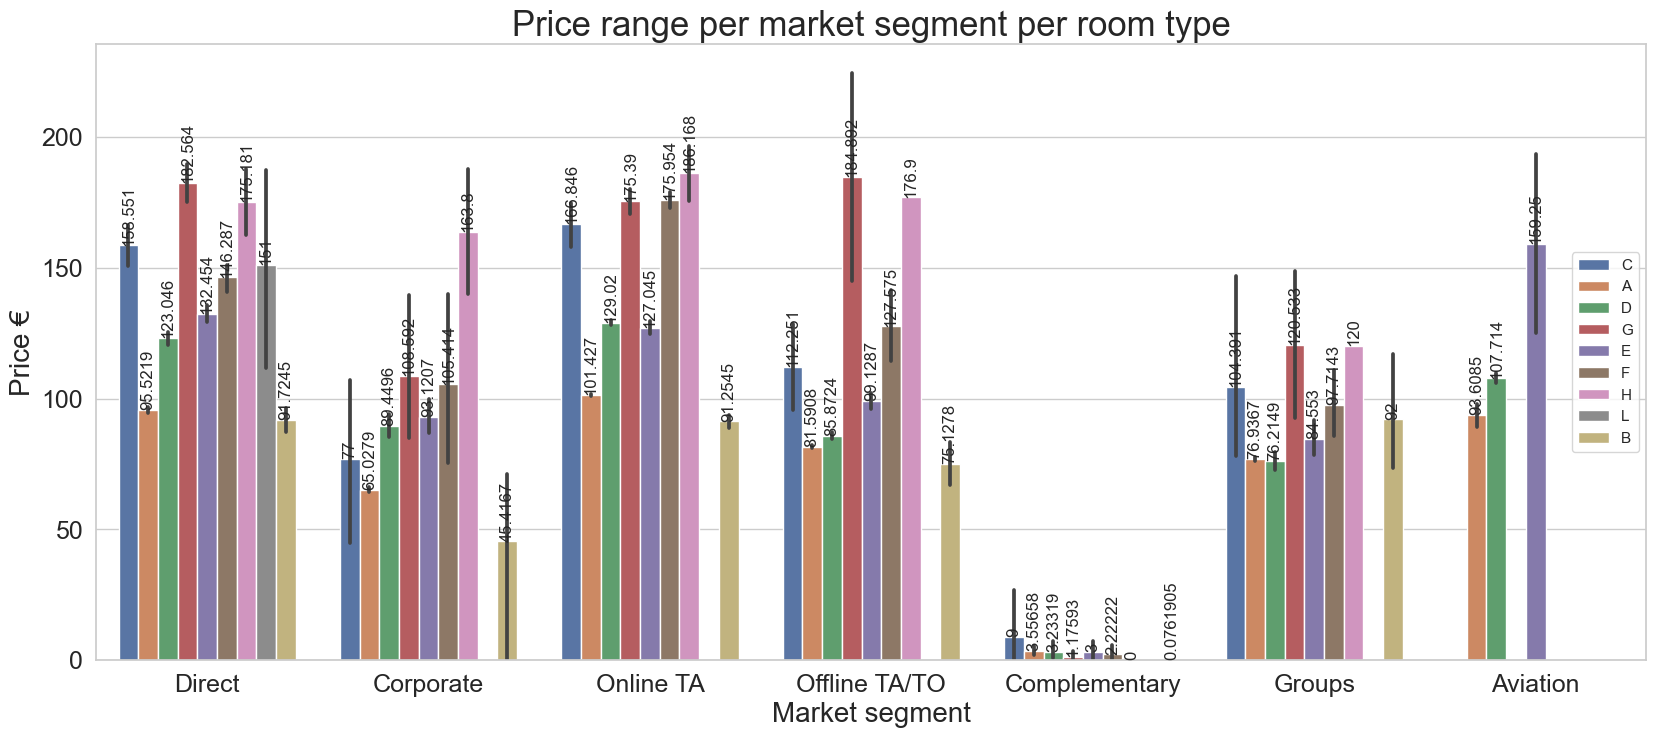

In [211]:
fig, ax1 = plt.subplots()
fig.set_size_inches(20,8)

sns.barplot(x='market_segment',
            y='adr',
            hue='reserved_room_type',
            data=price_night_room)
ax1.set_title("Price range per market segment per room type", size=25)
ax1.set_xlabel("Market segment", size=20)
ax1.set_ylabel("Price €", size=20)
ax1.tick_params(labelsize=18)
ax1.legend(loc="center right")
for i in ax1.containers:
    ax1.bar_label(i,rotation=90,)

fig.savefig("price_room_market_seg.jpg")
#plt.close()

Across the market segments the priceiest rooms are the types C, G and H.

The lowest prices are for the Copmlementary segment.

The Most expensive seems to be the Direct segment, followed by Online and Offline, and then Corporate and Groups.

<a id = 'busiest_month'><a/>
## 3.3 Busiest month
[Top](#top)

<a id = 'guests_month'><a/>
### 3.3.1 Number of guests per month
[Top](#top)

1. Use the two filtered df: df_resort_nc, df_city_nc
2. Create a new column with the sum of adult + children + babies ('adults', 'children', 'babies'), to obtain the total number of people staying per booking (aka row), in both df, total people staying
3. Group by month of arrival and use the sum aggregation function on the total people staying
4. Create Line Chart
5. Order the two df on total people staying, and get the highest number

In [156]:
df_resort_nc['Tot_guests_per_booking'] = df_resort_nc.apply(lambda row: row.adults +
                                                           row.children + row.babies, axis = 1)
df_resort_nc.head(3)

C:\Users\elisa\AppData\Local\Temp\ipykernel_18104\4039475300.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  agent  company  \
0                        0                     0       2  ...    0.0      0.0   
1                        0                     0       2  ...    0.0      0.0   
2                        0                     1       1  ...    0.0      0.0   

  days_in_waiting_list customer_type   adr required_car_parking_spaces  \
0                    0     Transient   0.0                           0   
1                    0     Transient   0.0                           0   
2                    0     Transient  75.0                           0   

   total_of_special_requests  reservation_status  reservation_status_date  \
0                          0           Check-Out                 7/1/2015   
1                          0           Check-Out                 7/1/2015   
2                          0           Check-Out                 7/2/2015   

  Tot_guests_per_booking  
0                    2.0  
1                    2.0  
2                    1.0  

[3 rows x 33 columns]

In [157]:
df_resort_nc_guests_month = df_resort_nc.groupby('arrival_date_month')['Tot_guests_per_booking'].sum().to_frame().reset_index()
df_resort_nc_guests_month.columns = ['Month', 'Total guests Resort']
#df_resort_nc_guests_month

In [158]:
df_city_nc['Tot_guests_per_booking'] = df_city_nc[['adults', 'children', 'babies']].sum(axis=1)
df_city_nc.head()

C:\Users\elisa\AppData\Local\Temp\ipykernel_18104\417419887.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



hotel  is_canceled  lead_time  arrival_date_year  \
40060  City Hotel            0          6               2015   
40066  City Hotel            0          3               2015   
40070  City Hotel            0         43               2015   
40071  City Hotel            0         43               2015   
40072  City Hotel            0         43               2015   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
40060               July                        27                          1   
40066               July                        27                          2   
40070               July                        27                          3   
40071               July                        27                          3   
40072               July                        27                          3   

       stays_in_weekend_nights  stays_in_week_nights  adults  ...  agent  \
40060                        0                     2       1  ...    6.0   
40066                        0                     3       1  ...    1.0   
40070                        0                     2       2  ...    1.0   
40071                        0                     2       2  ...    1.0   
40072                        0                     2       2  ...    1.0   

       company days_in_waiting_list    customer_type    adr  \
40060      0.0                    0        Transient   0.00   
40066      0.0                    0  Transient-Party  58.67   
40070      0.0                    0  Transient-Party  86.00   
40071      0.0                    0  Transient-Party  43.00   
40072      0.0                    0  Transient-Party  86.00   

      required_car_parking_spaces  total_of_special_requests  \
40060                           0                          0   
40066                           0                          0   
40070                           0                          0   
40071                           0                          0   
40072                           0                          0   

       reservation_status  reservation_status_date Tot_guests_per_booking  
40060           Check-Out                 7/3/2015                    1.0  
40066           Check-Out                 7/5/2015                    1.0  
40070           Check-Out                 7/5/2015                    2.0  
40071           Check-Out                 7/5/2015                    2.0  
40072           Check-Out                 7/5/2015                    2.0  

[5 rows x 33 columns]

In [159]:
df_city_nc_guests_month = df_city_nc.groupby('arrival_date_month')['Tot_guests_per_booking'].sum().to_frame().reset_index()
df_city_nc_guests_month.columns = ['Month', 'Total guests City']
#df_city_nc_guests_month

In [160]:
df_hotel_booking['Tot_guests_per_booking'] =  df_hotel_booking[['adults', 'children', 'babies']].sum(axis=1) # works
df_hotel_booking.head()

C:\Users\elisa\AppData\Local\Temp\ipykernel_18104\3601674027.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  agent  company  \
0                        0                     0       2  ...    0.0      0.0   
1                        0                     0       2  ...    0.0      0.0   
2                        0                     1       1  ...    0.0      0.0   
3                        0                     1       1  ...  304.0      0.0   
4                        0                     2       2  ...  240.0      0.0   

  days_in_waiting_list customer_type   adr required_car_parking_spaces  \
0                    0     Transient   0.0                           0   
1                    0     Transient   0.0                           0   
2                    0     Transient  75.0                           0   
3                    0     Transient  75.0                           0   
4                    0     Transient  98.0                           0   

   total_of_special_requests  reservation_status  reservation_status_date  \
0                          0           Check-Out                 7/1/2015   
1                          0           Check-Out                 7/1/2015   
2                          0           Check-Out                 7/2/2015   
3                          0           Check-Out                 7/2/2015   
4                          1           Check-Out                 7/3/2015   

  Tot_guests_per_booking  
0                    2.0  
1                    2.0  
2                    1.0  
3                    1.0  
4                    2.0  

[5 rows x 33 columns]

In [161]:
df_hotel_booking_nc_guests_month = df_hotel_booking[df_hotel_booking['is_canceled']==0].groupby('arrival_date_month')['Tot_guests_per_booking'].sum().to_frame().reset_index()
df_hotel_booking_nc_guests_month.columns = ['Month', 'Total guests']
df_hotel_booking_nc_guests_month

Month  Total guests
0       April       12833.0
1      August       19138.0
2    December        8492.0
3    February       10029.0
4     January        7186.0
5        July       17317.0
6        June       12520.0
7       March       12245.0
8         May       13442.0
9    November        8017.0
10    October       12720.0
11  September       12068.0

In [162]:
df_resort_city_nc_guests_month = df_resort_nc_guests_month.merge(df_city_nc_guests_month, on = "Month")
df_nc_guests_month = df_resort_city_nc_guests_month.merge(df_hotel_booking_nc_guests_month, on = "Month")
#df_nc_guests_month

In [163]:
df_nc_guests_month_ord = sd.Sort_Dataframeby_Month(df_nc_guests_month, 'Month')
df_nc_guests_month_ord

Month  Total guests Resort  Total guests City  Total guests
0     January               3184.0             4002.0        7186.0
1    February               4306.0             5723.0       10029.0
2       March               4611.0             7634.0       12245.0
3       April               4687.0             8146.0       12833.0
4         May               4863.0             8579.0       13442.0
5        June               4124.0             8396.0       12520.0
6        July               7051.0            10266.0       17317.0
7      August               7518.0            11620.0       19138.0
8   September               4173.0             7895.0       12068.0
9     October               4793.0             7927.0       12720.0
10   November               3456.0             4561.0        8017.0
11   December               3785.0             4707.0        8492.0

In [164]:
px.line(df_nc_guests_month_ord,
       x='Month',
       y=['Total guests Resort', 'Total guests City', 'Total guests'],
       title='Guests per month by hotel type and total')


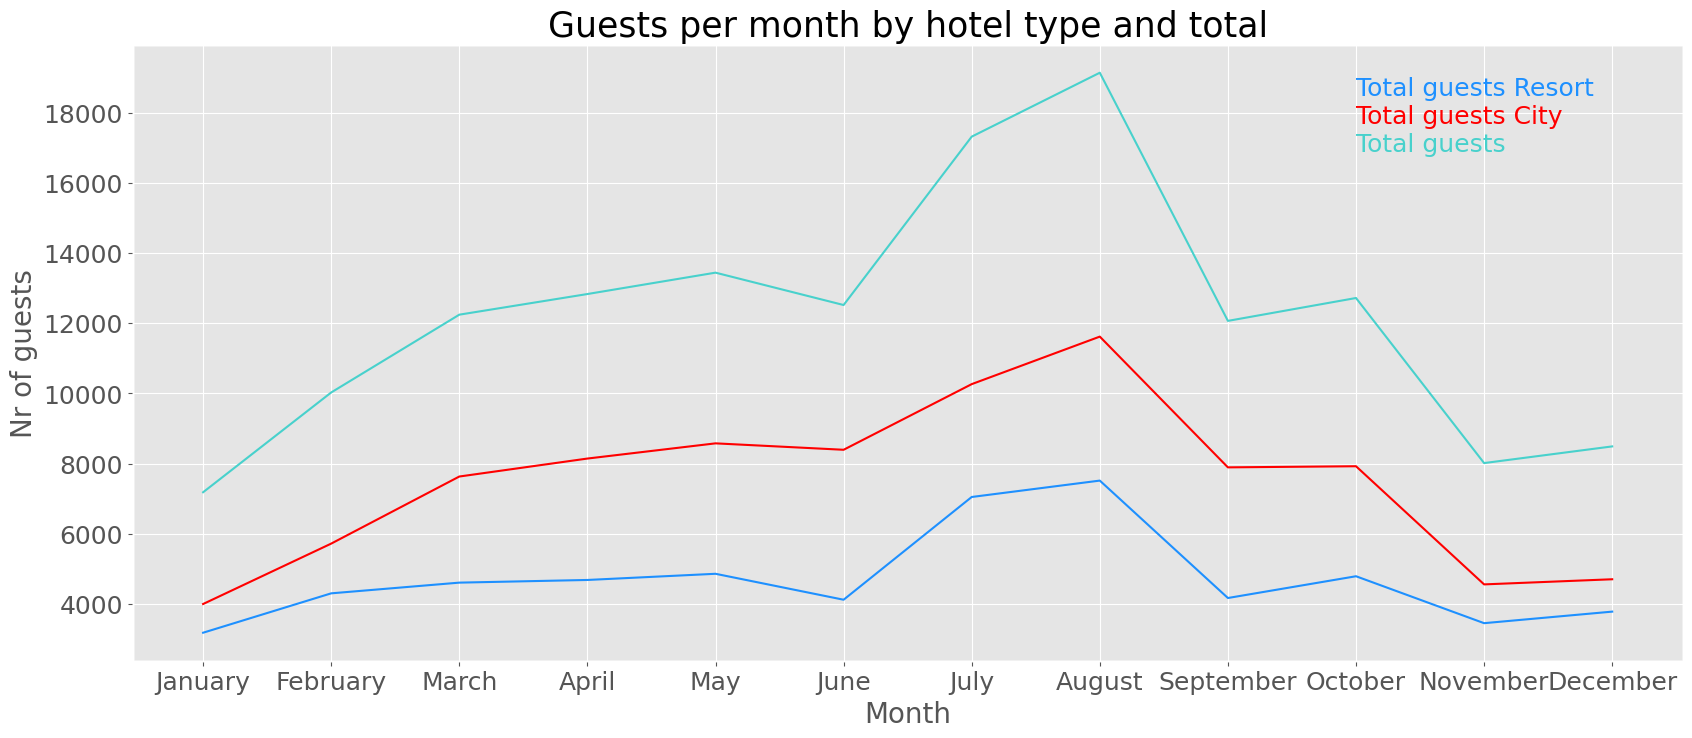

In [165]:
fig, ax = plt.subplots(1,1)

fig.set_size_inches(20,8)

ax.plot(df_nc_guests_month_ord['Month'],
       df_nc_guests_month_ord['Total guests Resort'],
       color = 'dodgerblue')
ax.set_title('Guests per month by hotel type and total', size=25)
ax.set_xlabel('Month', size=20)
ax.set_ylabel('Nr of guests', size = 20)
ax.tick_params(axis="x", labelsize = 18)
ax.tick_params(axis="y", labelsize = 18)
ax.text(x=9, y=18500, s='Total guests Resort', color='dodgerblue' , fontsize=18)

ax2 = ax.twiny()
ax2.plot(df_nc_guests_month_ord['Month'],
        df_nc_guests_month_ord['Total guests City'],
        color = 'red')
ax2.set_xticks([])
ax2.text(x=9, y=17700, s='Total guests City', color='red', fontsize=18)

ax3 = ax.twiny()
ax3.plot(df_nc_guests_month_ord['Month'],
        df_nc_guests_month_ord['Total guests'],
        color = 'mediumturquoise')
ax3.set_xticks([])
ax3.text(x=9, y=16900, s='Total guests', color='mediumturquoise', fontsize=18)

fig.savefig("monthly_guests.jpg")
#plt.close()

### FOR DASHBOARD

In [166]:
df_hotel_booking_nc['Tot_guests_per_booking'] =  df_hotel_booking_nc[['adults', 'children', 'babies']].sum(axis=1)
df_guests_month = df_hotel_booking_nc.groupby('arrival_date_month')['Tot_guests_per_booking'].sum().to_frame().reset_index()
df_guests_month.columns = ['Month', 'Total guests']
df_guests_month = sd.Sort_Dataframeby_Month(df_guests_month, 'Month')
df_guests_month

C:\Users\elisa\AppData\Local\Temp\ipykernel_18104\3037031258.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Month  Total guests
0     January        7186.0
1    February       10029.0
2       March       12245.0
3       April       12833.0
4         May       13442.0
5        June       12520.0
6        July       17317.0
7      August       19138.0
8   September       12068.0
9     October       12720.0
10   November        8017.0
11   December        8492.0

In [180]:
line_guests_month = px.line(df_guests_month,
                            x='Month',
                            y= 'Total guests',
                            title='Nr of guests per month')
line_guests_month.update_layout({'plot_bgcolor': '#01386a',
                                'paper_bgcolor': '#01386a'},
                                 font_color="snow",
                                 title_font_size = 25,
                                 xaxis=dict(showgrid=False),
                                 yaxis=dict(showgrid=False))
line_guests_month.update_traces(line_color='#a2cffe')
#line_guests_month.update_yaxes(showgrid=True, gridwidth=0.01) #  gridcolor='LightPink'
line_guests_month

<a id = 'bookings_month_hotel'><a/>
### 3.3.2 Bookings per month by hotel types and total
[Top](#top)

1. Use value counts on arrival month
2. Reorder the months cronologically
3. Plot bookings per month

In [181]:
months_counts = df_hotel_booking['arrival_date_month'].value_counts().to_frame().reset_index()
months_counts

index  arrival_date_month
0      August               13861
1        July               12644
2         May               11780
3     October               11147
4       April               11078
5        June               10929
6   September               10500
7       March                9768
8    February                8052
9    November                6771
10   December                6759
11    January                5921

In [182]:
months_counts.columns = ['Month','Total Bookings count']
months_counts

Month  Total Bookings count
0      August                 13861
1        July                 12644
2         May                 11780
3     October                 11147
4       April                 11078
5        June                 10929
6   September                 10500
7       March                  9768
8    February                  8052
9    November                  6771
10   December                  6759
11    January                  5921

In [183]:
months_counts_resort = df_resort_nc['arrival_date_month'].value_counts().to_frame().reset_index()
months_counts_resort.columns = ['Month','Resort Bookings count']

In [184]:
months_counts_city = df_city_nc['arrival_date_month'].value_counts().to_frame().reset_index()
months_counts_city.columns = ['Month','City Bookings count']

In [185]:
months_counts_city_resort = months_counts_resort.merge(months_counts_city, on = "Month")
months_counts_city_resort

Month  Resort Bookings count  City Bookings count
0      August                   3257                 5367
1        July                   3137                 4770
2     October                   2575                 4326
3       March                   2571                 4049
4       April                   2550                 4010
5         May                   2535                 4568
6    February                   2308                 3051
7   September                   2102                 4283
8        June                   2037                 4358
9    December                   2014                 2377
10   November                   1975                 2676
11    January                   1866                 2249

In [186]:
months_counts_tot = months_counts_city_resort.merge(months_counts, on = "Month")
months_counts_tot

Month  Resort Bookings count  City Bookings count  \
0      August                   3257                 5367   
1        July                   3137                 4770   
2     October                   2575                 4326   
3       March                   2571                 4049   
4       April                   2550                 4010   
5         May                   2535                 4568   
6    February                   2308                 3051   
7   September                   2102                 4283   
8        June                   2037                 4358   
9    December                   2014                 2377   
10   November                   1975                 2676   
11    January                   1866                 2249   

    Total Bookings count  
0                  13861  
1                  12644  
2                  11147  
3                   9768  
4                  11078  
5                  11780  
6                   8052  
7                  10500  
8                  10929  
9                   6759  
10                  6771  
11                  5921

In [187]:
months_counts_tot_ord_by_booking = months_counts_tot.sort_values('Total Bookings count')
months_counts_tot_ord_by_booking
#months_counts_tot_ord_by_booking['Total Bookings count'].head(1)

Month  Resort Bookings count  City Bookings count  \
11    January                   1866                 2249   
9    December                   2014                 2377   
10   November                   1975                 2676   
6    February                   2308                 3051   
3       March                   2571                 4049   
7   September                   2102                 4283   
8        June                   2037                 4358   
4       April                   2550                 4010   
2     October                   2575                 4326   
5         May                   2535                 4568   
1        July                   3137                 4770   
0      August                   3257                 5367   

    Total Bookings count  
11                  5921  
9                   6759  
10                  6771  
6                   8052  
3                   9768  
7                  10500  
8                  10929  
4                  11078  
2                  11147  
5                  11780  
1                  12644  
0                  13861

In [188]:
months_counts_tot_ord = sd.Sort_Dataframeby_Month(months_counts_tot, 'Month')
months_counts_tot_ord

Month  Resort Bookings count  City Bookings count  \
0     January                   1866                 2249   
1    February                   2308                 3051   
2       March                   2571                 4049   
3       April                   2550                 4010   
4         May                   2535                 4568   
5        June                   2037                 4358   
6        July                   3137                 4770   
7      August                   3257                 5367   
8   September                   2102                 4283   
9     October                   2575                 4326   
10   November                   1975                 2676   
11   December                   2014                 2377   

    Total Bookings count  
0                   5921  
1                   8052  
2                   9768  
3                  11078  
4                  11780  
5                  10929  
6                  12644  
7                  13861  
8                  10500  
9                  11147  
10                  6771  
11                  6759

In [189]:
px.line(months_counts_tot_ord,
        x='Month',
        y=['Resort Bookings count','City Bookings count', 'Total Bookings count'],
       title= "Counts of bookings per month by hotel type")
# This plot allows to hover over the plot and see the precise value

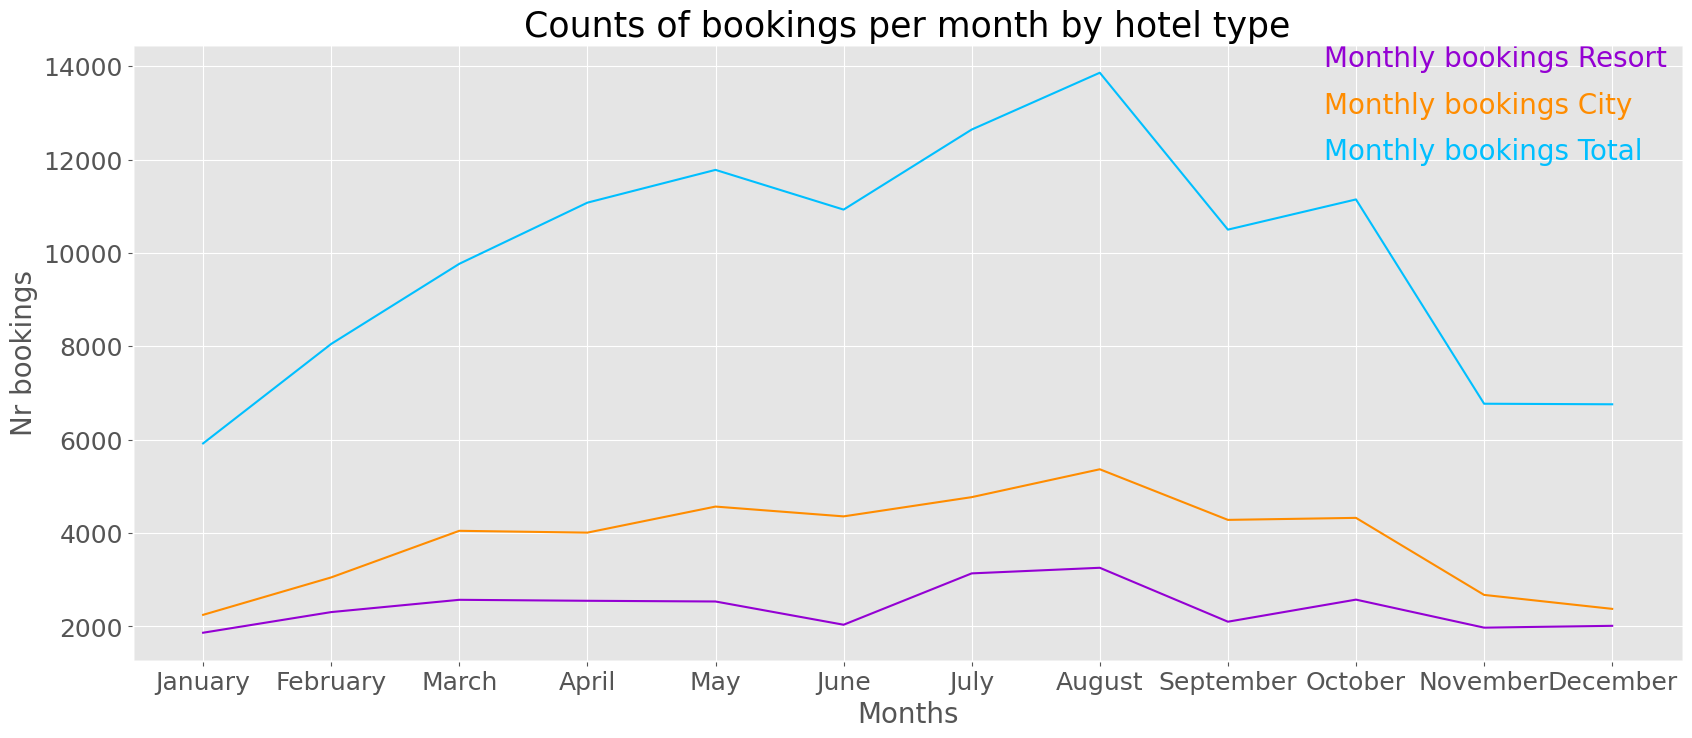

In [190]:
fig, ax = plt.subplots(1,1)

fig.set_size_inches(20,8)

ax.plot(months_counts_tot_ord["Month"],
       months_counts_tot_ord["Resort Bookings count"],
       color="darkviolet")
ax.set_title("Counts of bookings per month by hotel type", size=25)
ax.set_xlabel("Months", size=20)
ax.set_ylabel("Nr bookings", size=20)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.text(x=8.75, y=14000, s="Monthly bookings Resort", color="darkviolet", fontsize=20)

ax2 = ax.twiny()
ax2.plot(months_counts_tot_ord["Month"],
       months_counts_tot_ord["City Bookings count"],
        color="darkorange")
ax2.set_xticks([])
ax2.text(x=8.75, y=13000, s="Monthly bookings City", color="darkorange", fontsize=20)

ax3 = ax.twiny()
ax3.plot(months_counts_tot_ord["Month"],
       months_counts_tot_ord["Total Bookings count"],
        color="deepskyblue")
ax3.set_xticks([])
ax3.text(x=8.75, y=12000, s="Monthly bookings Total", color="deepskyblue", fontsize=20)

fig.savefig("monthly_bookings.jpg")
#plt.close()

The highest number of bookings occurs during the month of August in both Resort (3257) and City (5367) hotel types, with a total of 13862 bookings.
Through the whole year, the highest bookings occur in the City hotel type, and the maximum number is 3257.

### FOR DASHBOARD

In [191]:
df_monthly_bookings = df_hotel_booking['arrival_date_month'].value_counts().to_frame().reset_index()
df_monthly_bookings.columns = ['Month','Nr of Bookings']
df_monthly_bookings_ord = sd.Sort_Dataframeby_Month(df_monthly_bookings, 'Month')
df_monthly_bookings_ord

Month  Nr of Bookings
0     January            5921
1    February            8052
2       March            9768
3       April           11078
4         May           11780
5        June           10929
6        July           12644
7      August           13861
8   September           10500
9     October           11147
10   November            6771
11   December            6759

In [193]:
line_booking = px.line(df_monthly_bookings_ord,
                       x='Month',
                       y='Nr of Bookings',
                       title= "Nr of bookings per month by hotel type")
line_booking.update_layout({'plot_bgcolor': '#01386a',
                                    'paper_bgcolor': '#01386a'},
                                    font_color="snow",
                                    title_font_size = 25,
                                    xaxis=dict(showgrid=False),
                                    yaxis=dict(showgrid=False))
line_booking.update_traces(line_color='#a2cffe')
line_booking

<a id= 'nr_cancellation'><a/>
## 3.4 Number of cancellations
[Top](#top)

The goal of this section is to analyse the cancellations numbers considering the hotel and room types and the total reservations.

<a id= 'nr_cancellation_reservation_hotel'><a/>
### 3.4.1 Number of cancellations compared to reservations per hotel types.
[Top](#top)

In [212]:
#cancelled_bookings = df_hotel_booking[df_hotel_booking['is_canceled']==1]
cancelled_bookings = df_hotel_booking.groupby(['hotel','is_canceled']).agg('count').reset_index()
cancelled_bookings = cancelled_bookings.iloc[:,0:3]
cancelled_bookings.columns = ['Hotel type', 'Reservation Cancellation', 'Count']
cancelled_bookings

Hotel type  Reservation Cancellation  Count
0    City Hotel                         0  46084
1    City Hotel                         1  33079
2  Resort Hotel                         0  28927
3  Resort Hotel                         1  11120

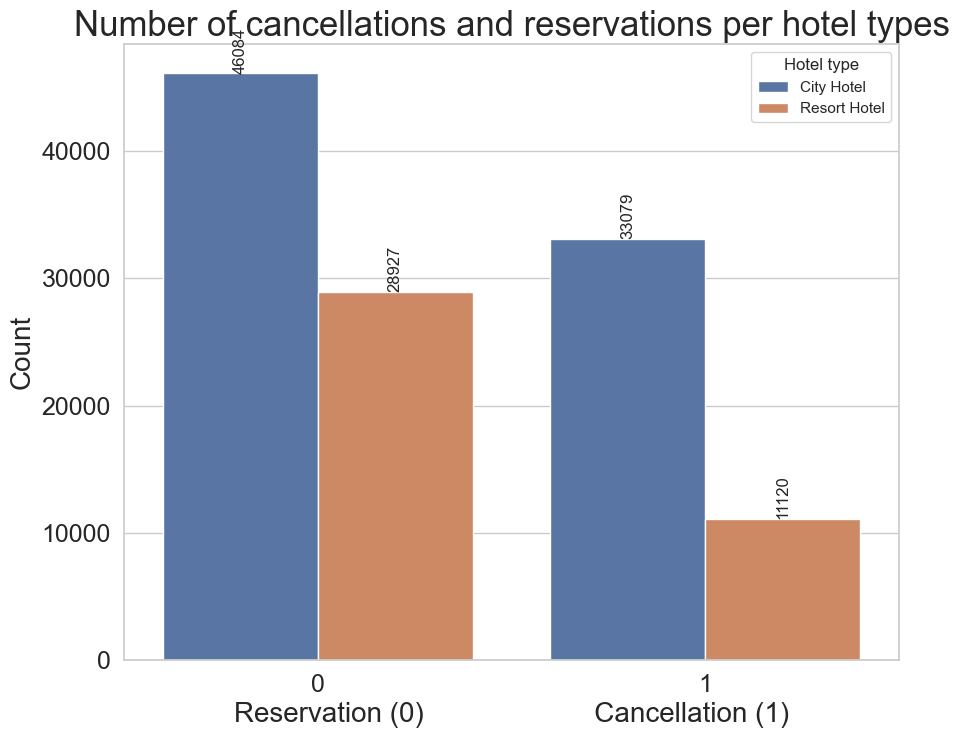

In [213]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10,8)

sns.barplot(x='Reservation Cancellation',
            y='Count',
            hue='Hotel type',
            data=cancelled_bookings,
            ax=ax1)
ax1.set_title("Number of cancellations and reservations per hotel types", size=25)
ax1.set_xlabel("Reservation (0)                      Cancellation (1)", size=20)
ax1.set_ylabel("Count", size=20)
ax1.tick_params(labelsize=18)
for i in ax1.containers:
    ax1.bar_label(i,rotation=90,)
    
fig.savefig("Canc_res_hotel.jpg")
#plt.close()

In [214]:
fig2 = px.bar(cancelled_bookings,
              x='Reservation Cancellation',
              y='Count',
              color='Hotel type',
              barmode='group',
              height=400)
fig2.show()

In [215]:
canc_tot = cancelled_bookings[cancelled_bookings['Reservation Cancellation']==1]['Count'].sum()

filter_city = (cancelled_bookings['Reservation Cancellation']==1) & (cancelled_bookings['Hotel type']=='City Hotel')
canc_city = cancelled_bookings[filter_city]
canc_city_value = canc_city['Count']

filter_resort = (cancelled_bookings['Reservation Cancellation']==1) & (cancelled_bookings['Hotel type']=='Resort Hotel')
canc_resort = cancelled_bookings[filter_resort]
canc_resort_value = canc_resort['Count']

perc_canc_city = int((canc_city_value/canc_tot) * 100)
perc_canc_city
perc_canc_resort = int((canc_resort_value/canc_tot) * 100)
perc_canc_resort

25

In [216]:
canc = cancelled_bookings[cancelled_bookings['Reservation Cancellation']==1]
canc['Percentage'] = [perc_canc_city, perc_canc_resort]
canc

C:\Users\elisa\AppData\Local\Temp\ipykernel_18104\685495490.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Hotel type  Reservation Cancellation  Count  Percentage
1    City Hotel                         1  33079          74
3  Resort Hotel                         1  11120          25

The majority of cancellations was made at City hotels (74%).

### FOR DASHBOARD

In [217]:
# Nr reservations / cancellations per hotel type
df_canc_res = df_hotel_booking.groupby('is_canceled').agg('count').reset_index()
df_canc_res = df_canc_res.iloc[:,0:2]
df_canc_res.columns = ['Reservation Cancellation', 'Count']
df_canc_res

Reservation Cancellation  Count
0                         0  75011
1                         1  44199

In [218]:
bar_canc_res = px.bar(df_canc_res,
                      x='Reservation Cancellation',
                      y='Count',
                      barmode='group',
                      height=400,
                      title='Nr of cancellations (1) and reservations (0)')
bar_canc_res.update_layout({'plot_bgcolor': '#01386a',
                                    'paper_bgcolor': '#01386a'},
                                    font_color="snow",
                                    title_font_size = 25,
                                    xaxis=dict(showgrid=False),
                                    yaxis=dict(showgrid=False))
bar_canc_res.update_traces(marker_color='#a2cffe')

bar_canc_res

<a id= 'nr_cancellation_reservation_hotel_room'><a/>
### 3.4.2 Number of cancellations compared to reservations per hotel type and per room type
[Top](#top)

In [219]:
cancelled_bookings_hotel_room = df_hotel_booking.groupby(['hotel','is_canceled', 'reserved_room_type']).agg('count').reset_index()
cancelled_bookings_hotel_room = cancelled_bookings_hotel_room.iloc[:,0:4]
cancelled_bookings_hotel_room.columns = ['Hotel type', 'Reservation Cancellation', 'Room type', 'Count']
cancelled_bookings_hotel_room

Hotel type  Reservation Cancellation Room type  Count
0     City Hotel                         0         A  35241
1     City Hotel                         0         B    745
2     City Hotel                         0         C      8
3     City Hotel                         0         D   7601
4     City Hotel                         0         E   1038
5     City Hotel                         0         F   1088
6     City Hotel                         0         G    363
7     City Hotel                         1         A  27243
8     City Hotel                         1         B    367
9     City Hotel                         1         C      5
10    City Hotel                         1         D   4146
11    City Hotel                         1         E    499
12    City Hotel                         1         F    700
13    City Hotel                         1         G    119
14  Resort Hotel                         0         A  17007
15  Resort Hotel                         0         B      3
16  Resort Hotel                         0         C    615
17  Resort Hotel                         0         D   5477
18  Resort Hotel                         0         E   3573
19  Resort Hotel                         0         F    926
20  Resort Hotel                         0         G    966
21  Resort Hotel                         0         H    356
22  Resort Hotel                         0         L      4
23  Resort Hotel                         1         A   6382
24  Resort Hotel                         1         C    303
25  Resort Hotel                         1         D   1955
26  Resort Hotel                         1         E   1409
27  Resort Hotel                         1         F    180
28  Resort Hotel                         1         G    644
29  Resort Hotel                         1         H    245
30  Resort Hotel                         1         L      2

In [220]:
cancelled_bookings_city_room = cancelled_bookings_hotel_room[cancelled_bookings_hotel_room['Hotel type']=='City Hotel']
cancelled_bookings_resort_room = cancelled_bookings_hotel_room[cancelled_bookings_hotel_room['Hotel type']=='Resort Hotel']

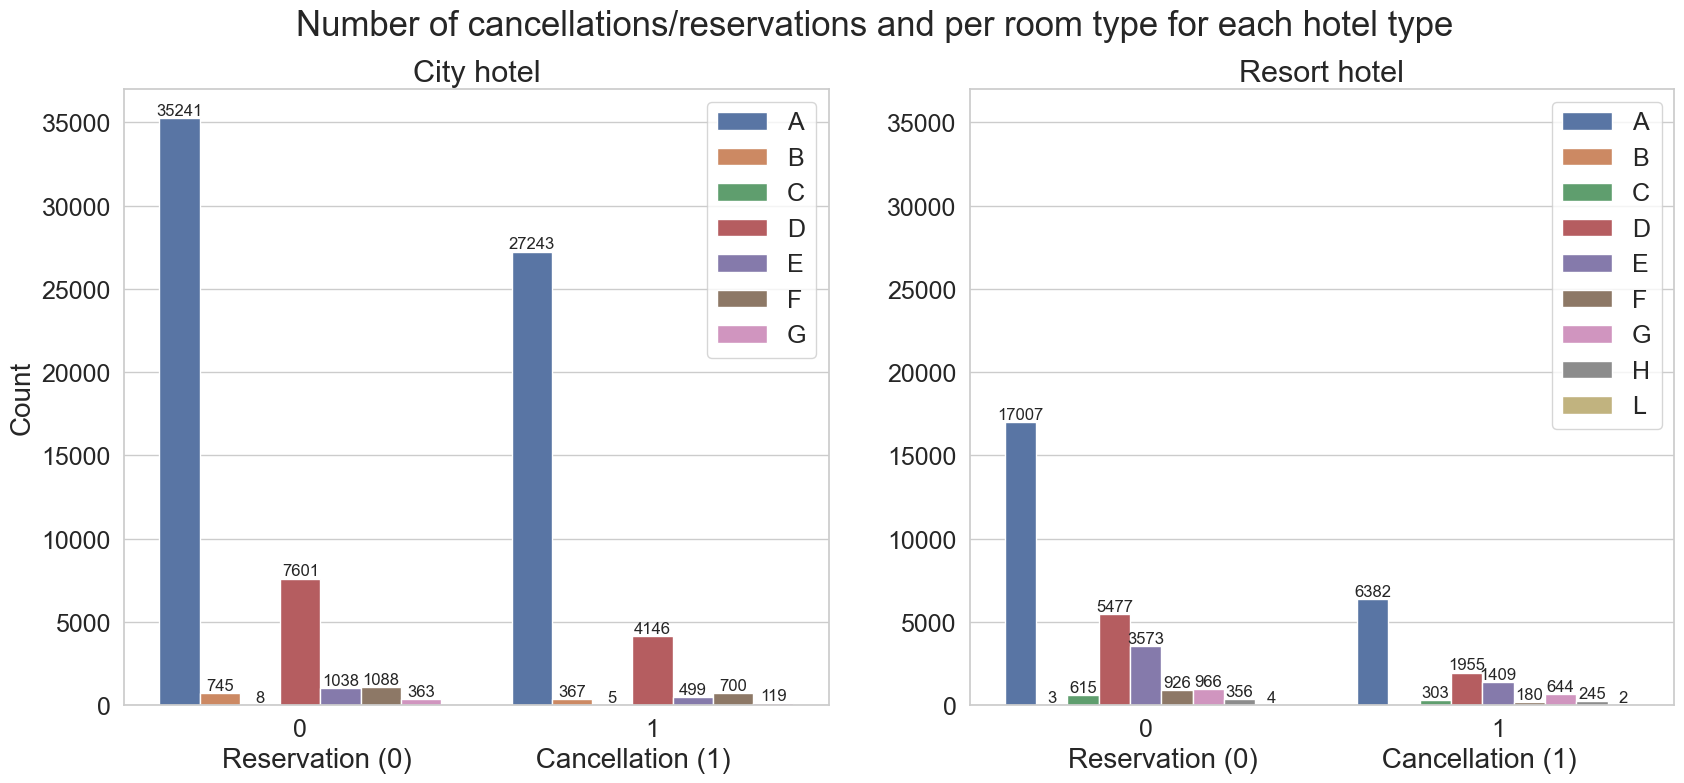

In [221]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(20,8)
fig.suptitle("Number of cancellations/reservations and per room type for each hotel type", size=25)

sns.barplot(x='Reservation Cancellation',
           y='Count',
           hue='Room type',
           data=cancelled_bookings_city_room,
           ax = ax1)
ax1.set_title("City hotel", size=22)
ax1.set_xlabel("Reservation (0)                Cancellation (1)", size=20)
ax1.set_ylabel("Count", size=20)
ax1.tick_params(labelsize=18)
ax1.legend(prop={'size':18})
ax1.set_ylim([0, 37000])
for i in ax1.containers:
    ax1.bar_label(i,)

sns.barplot(x='Reservation Cancellation',
           y='Count',
           hue='Room type',
           data=cancelled_bookings_resort_room,
           ax = ax2)
ax2.set_title("Resort hotel", size=22)
ax2.set_xlabel("Reservation (0)                Cancellation (1)", size=20)
ax2.set_ylabel("")
ax2.tick_params(labelsize=18)
ax2.legend(prop={'size':18})
ax2.set_ylim([0, 37000])
for i in ax2.containers:
    ax2.bar_label(i,)
    
fig.savefig("Canc_res_hotel_room.jpg")

In [222]:
# CITY TOTAL
cancelled_bookings_city_room = cancelled_bookings_hotel_room[cancelled_bookings_hotel_room['Hotel type']== 'City Hotel']

cancelled_bookings_city_room_tot_res = cancelled_bookings_city_room[cancelled_bookings_city_room['Reservation Cancellation']==0]
cancelled_bookings_city_room_tot_canc = cancelled_bookings_city_room[cancelled_bookings_city_room['Reservation Cancellation']==1]
city_tot_res = int(cancelled_bookings_city_room_tot_res['Count'].sum())
city_tot_canc = int(cancelled_bookings_city_room_tot_canc['Count'].sum())
city_tot_res

46084

In [223]:
cancelled_bookings_city_room_tot_res

Hotel type  Reservation Cancellation Room type  Count
0  City Hotel                         0         A  35241
1  City Hotel                         0         B    745
2  City Hotel                         0         C      8
3  City Hotel                         0         D   7601
4  City Hotel                         0         E   1038
5  City Hotel                         0         F   1088
6  City Hotel                         0         G    363

In [224]:
perc_city_res = []
for i in range(len(cancelled_bookings_city_room_tot_res['Count'])):
    perc_city_res.append((int(cancelled_bookings_city_room_tot_res['Count'][i]) / city_tot_res) * 100)
perc_city_res

[76.4712264560368,
 1.6166131412203804,
 0.017359604201024215,
 16.493793941498133,
 2.252408645082892,
 2.3609061713392934,
 0.7876920406214738]

In [225]:
cancelled_bookings_city_room_tot_res["Percentage"] = perc_city_res
cancelled_bookings_city_room_tot_res

C:\Users\elisa\AppData\Local\Temp\ipykernel_18104\116011184.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Hotel type  Reservation Cancellation Room type  Count  Percentage
0  City Hotel                         0         A  35241   76.471226
1  City Hotel                         0         B    745    1.616613
2  City Hotel                         0         C      8    0.017360
3  City Hotel                         0         D   7601   16.493794
4  City Hotel                         0         E   1038    2.252409
5  City Hotel                         0         F   1088    2.360906
6  City Hotel                         0         G    363    0.787692

In [226]:
cancelled_bookings_city_room_tot_canc

Hotel type  Reservation Cancellation Room type  Count
7   City Hotel                         1         A  27243
8   City Hotel                         1         B    367
9   City Hotel                         1         C      5
10  City Hotel                         1         D   4146
11  City Hotel                         1         E    499
12  City Hotel                         1         F    700
13  City Hotel                         1         G    119

In [227]:
city_tot_canc

33079

In [228]:
"""perc_city_canc = []
for i in range(len(cancelled_bookings_city_room_tot_canc['Count'])):
    perc_city_canc.append((int(cancelled_bookings_city_room_tot_canc['Count'][i]) / city_tot_canc) * 100)
perc_city_canc
"""

"perc_city_canc = []\nfor i in range(len(cancelled_bookings_city_room_tot_canc['Count'])):\n    perc_city_canc.append((int(cancelled_bookings_city_room_tot_canc['Count'][i]) / city_tot_canc) * 100)\nperc_city_canc\n"

In [229]:
# RESORT TOTAL
cancelled_bookings_resort_room = cancelled_bookings_hotel_room[cancelled_bookings_hotel_room['Hotel type']=='Resort Hotel']

cancelled_bookings_resort_room_tot_res = cancelled_bookings_resort_room[cancelled_bookings_resort_room['Reservation Cancellation']==0]
cancelled_bookings_resort_room_tot_canc = cancelled_bookings_resort_room[cancelled_bookings_resort_room['Reservation Cancellation']==1]
resort_tot_res = int(cancelled_bookings_resort_room_tot_res['Count'].sum())
resort_tot_canc = int(cancelled_bookings_resort_room_tot_canc['Count'].sum())

In [230]:
cancelled_bookings_resort_room_tot_res.reset_index()

index    Hotel type  Reservation Cancellation Room type  Count
0     14  Resort Hotel                         0         A  17007
1     15  Resort Hotel                         0         B      3
2     16  Resort Hotel                         0         C    615
3     17  Resort Hotel                         0         D   5477
4     18  Resort Hotel                         0         E   3573
5     19  Resort Hotel                         0         F    926
6     20  Resort Hotel                         0         G    966
7     21  Resort Hotel                         0         H    356
8     22  Resort Hotel                         0         L      4

In [231]:
cancelled_bookings_resort_room_tot_canc.reset_index()

index    Hotel type  Reservation Cancellation Room type  Count
0     23  Resort Hotel                         1         A   6382
1     24  Resort Hotel                         1         C    303
2     25  Resort Hotel                         1         D   1955
3     26  Resort Hotel                         1         E   1409
4     27  Resort Hotel                         1         F    180
5     28  Resort Hotel                         1         G    644
6     29  Resort Hotel                         1         H    245
7     30  Resort Hotel                         1         L      2

In [232]:
"""perc_resort_res = []
for i in range(len(cancelled_bookings_resort_room_tot_res['Count'])):
    perc_resort_res.append((int(cancelled_bookings_resort_room_tot_res['Count'][i]) / resort_tot_res) * 100)
perc_resort_res"""

"perc_resort_res = []\nfor i in range(len(cancelled_bookings_resort_room_tot_res['Count'])):\n    perc_resort_res.append((int(cancelled_bookings_resort_room_tot_res['Count'][i]) / resort_tot_res) * 100)\nperc_resort_res"

<a id= 'nr_cancellation_month'><a/>
### 3.4.3 Number of cancellations per month
[Top](#top)

In [233]:
cancelled_bookings_hotel_month = df_hotel_booking.groupby(['hotel','is_canceled', 'arrival_date_month']).agg('count').reset_index()
cancelled_bookings_hotel_month = cancelled_bookings_hotel_month.iloc[:,0:4]
cancelled_bookings_hotel_month.columns = ['Hotel type', 'Reservation Cancellation', 'Month', 'Count']
cancelled_bookings_hotel_month

Hotel type  Reservation Cancellation      Month  Count
0     City Hotel                         0      April   4010
1     City Hotel                         0     August   5367
2     City Hotel                         0   December   2377
3     City Hotel                         0   February   3051
4     City Hotel                         0    January   2249
5     City Hotel                         0       July   4770
6     City Hotel                         0       June   4358
7     City Hotel                         0      March   4049
8     City Hotel                         0        May   4568
9     City Hotel                         0   November   2676
10    City Hotel                         0    October   4326
11    City Hotel                         0  September   4283
12    City Hotel                         1      April   3459
13    City Hotel                         1     August   3600
14    City Hotel                         1   December   1737
15    City Hotel                         1   February   1899
16    City Hotel                         1    January   1481
17    City Hotel                         1       July   3301
18    City Hotel                         1       June   3527
19    City Hotel                         1      March   2385
20    City Hotel                         1        May   3653
21    City Hotel                         1   November   1660
22    City Hotel                         1    October   3268
23    City Hotel                         1  September   3109
24  Resort Hotel                         0      April   2550
25  Resort Hotel                         0     August   3257
26  Resort Hotel                         0   December   2014
27  Resort Hotel                         0   February   2308
28  Resort Hotel                         0    January   1866
29  Resort Hotel                         0       July   3137
30  Resort Hotel                         0       June   2037
31  Resort Hotel                         0      March   2571
32  Resort Hotel                         0        May   2535
33  Resort Hotel                         0   November   1975
34  Resort Hotel                         0    October   2575
35  Resort Hotel                         0  September   2102
36  Resort Hotel                         1      April   1059
37  Resort Hotel                         1     August   1637
38  Resort Hotel                         1   December    631
39  Resort Hotel                         1   February    794
40  Resort Hotel                         1    January    325
41  Resort Hotel                         1       July   1436
42  Resort Hotel                         1       June   1007
43  Resort Hotel                         1      March    763
44  Resort Hotel                         1        May   1024
45  Resort Hotel                         1   November    460
46  Resort Hotel                         1    October    978
47  Resort Hotel                         1  September   1006

In [234]:
cancelled_bookings_hotel_month_ord = sd.Sort_Dataframeby_Month(cancelled_bookings_hotel_month, 'Month')
cancelled_bookings_hotel_month_ord

Hotel type  Reservation Cancellation      Month  Count
0     City Hotel                         0    January   2249
1     City Hotel                         1    January   1481
2   Resort Hotel                         0    January   1866
3   Resort Hotel                         1    January    325
4     City Hotel                         0   February   3051
5     City Hotel                         1   February   1899
6   Resort Hotel                         0   February   2308
7   Resort Hotel                         1   February    794
8     City Hotel                         0      March   4049
9     City Hotel                         1      March   2385
10  Resort Hotel                         0      March   2571
11  Resort Hotel                         1      March    763
12    City Hotel                         0      April   4010
13    City Hotel                         1      April   3459
14  Resort Hotel                         0      April   2550
15  Resort Hotel                         1      April   1059
16    City Hotel                         0        May   4568
17    City Hotel                         1        May   3653
18  Resort Hotel                         0        May   2535
19  Resort Hotel                         1        May   1024
20    City Hotel                         0       June   4358
21    City Hotel                         1       June   3527
22  Resort Hotel                         0       June   2037
23  Resort Hotel                         1       June   1007
24    City Hotel                         0       July   4770
25    City Hotel                         1       July   3301
26  Resort Hotel                         0       July   3137
27  Resort Hotel                         1       July   1436
28    City Hotel                         0     August   5367
29    City Hotel                         1     August   3600
30  Resort Hotel                         0     August   3257
31  Resort Hotel                         1     August   1637
32    City Hotel                         0  September   4283
33    City Hotel                         1  September   3109
34  Resort Hotel                         0  September   2102
35  Resort Hotel                         1  September   1006
36    City Hotel                         0    October   4326
37    City Hotel                         1    October   3268
38  Resort Hotel                         0    October   2575
39  Resort Hotel                         1    October    978
40    City Hotel                         0   November   2676
41    City Hotel                         1   November   1660
42  Resort Hotel                         0   November   1975
43  Resort Hotel                         1   November    460
44    City Hotel                         0   December   2377
45    City Hotel                         1   December   1737
46  Resort Hotel                         0   December   2014
47  Resort Hotel                         1   December    631

In [235]:
cancelled_bookings_city_month = cancelled_bookings_hotel_month[cancelled_bookings_hotel_month['Hotel type']=='City Hotel']
cancelled_bookings_resort_month = cancelled_bookings_hotel_month[cancelled_bookings_hotel_month['Hotel type']=='Resort Hotel']

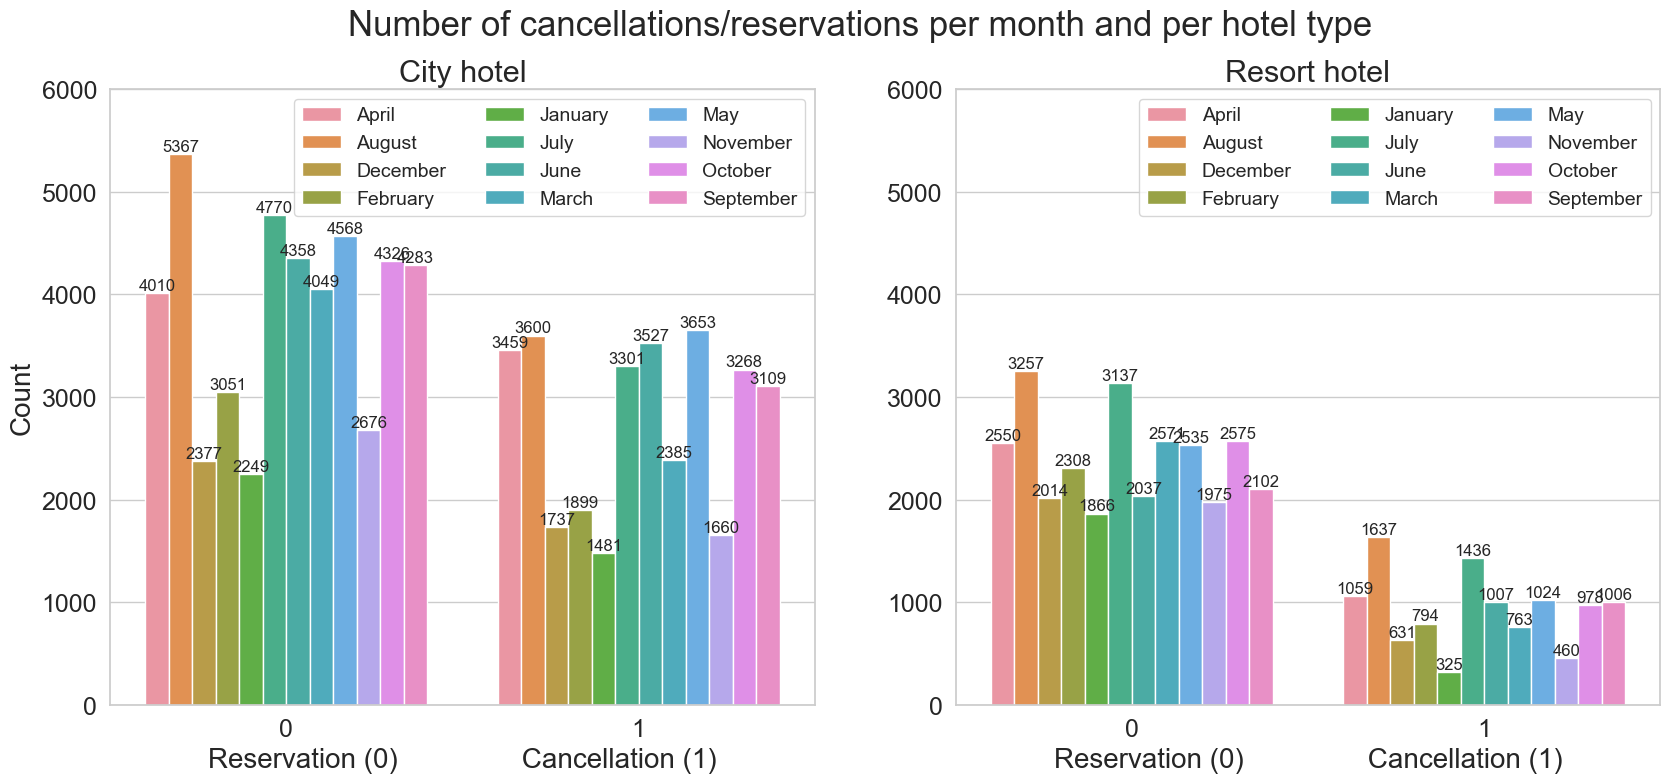

In [236]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(20,8)
fig.suptitle("Number of cancellations/reservations per month and per hotel type", size=25)

sns.barplot(x='Reservation Cancellation',
           y='Count',
           hue='Month',
           data=cancelled_bookings_city_month,
           ax = ax1)
ax1.set_title("City hotel", size=22)
ax1.set_xlabel("Reservation (0)                Cancellation (1)", size=20)
ax1.set_ylabel("Count", size=20)
ax1.tick_params(labelsize=18)
ax1.legend(prop={'size':14}, ncol=3)
ax1.set_ylim([0, 6000])
for i in ax1.containers:
    ax1.bar_label(i,)

sns.barplot(x='Reservation Cancellation',
           y='Count',
           hue='Month',
           data=cancelled_bookings_resort_month,
           ax = ax2)
ax2.set_title("Resort hotel", size=22)
ax2.set_xlabel("Reservation (0)                Cancellation (1)", size=20)
ax2.set_ylabel("")
ax2.tick_params(labelsize=18)
ax2.legend(prop={'size':14}, ncol=3)
ax2.set_ylim([0, 6000])
for i in ax2.containers:
    ax2.bar_label(i,)
    
fig.savefig("Canc_res_hotel_month.jpg")